# Non-negative Matrix Factorization


## Load data and Noise

### Load Dataset

#### Load ORL Dataset and Extended YaleB Dataset.
- ORL dataset contains ten different images of each of 40 distinct subjects. For some subjects, the images were taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement). The size of each image is 92x112 pixels, with 256 grey levels per pixel. To further reduce the computation complexity, you can resize all images to 30x37 pixels.

- Extended YaleB dataset contains 2414 images of 38 human subjects under 9 poses and 64 illumination conditions. All images are manually aligned, cropped, and then resized to 168x192 pixels. To further reduce the computation complexity, you can resize all images to 42x48 pixels.

In [1]:
# Import required packages
import os
import numpy as np
from PIL import Image
#from numpy import sqrt
from utils import *
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [2]:
def load_data(root='data/CroppedYaleB', reduce=4):
    """ 
    Load ORL (or Extended YaleB) dataset to numpy array.
    
    Args:
        root: path to dataset.
        reduce: scale factor for zooming out images.
        
    """ 
    # Redirect the root directory
    root = os.path.join("..",root)

    images, labels = [], []

    for i, person in enumerate(sorted(os.listdir(root))):
        
        if not os.path.isdir(os.path.join(root, person)):
            continue
        
        for fname in os.listdir(os.path.join(root, person)):    
            
            # Remove background images in Extended YaleB dataset.
            if fname.endswith('Ambient.pgm'):
                continue
            
            if not fname.endswith('.pgm'):
                continue
                
            # load image.
            img = Image.open(os.path.join(root, person, fname))
            img = img.convert('L') # grey image.

            # reduce computation complexity.
            img = img.resize([s//reduce for s in img.size])

            # Save the image shape for subsequent use
            img_shape= np.asarray(img).shape 
            
            # convert image to numpy array.
            img = np.asarray(img).reshape((-1,1))

            # TODO: preprocessing.
            # Perform min-max normalisation
            img = img  / 255.0

            # collect data and label.
            images.append(img)
            labels.append(i)

    # concate all images and labels.
    images = np.concatenate(images, axis=1)
    labels = np.array(labels)

    return images, labels, img_shape

In [3]:
def load_data_AR(root='data/CroppedAR', reduce=3):
    """ 
    Load AR dataset to numpy array.
    
    Args:
        root: path to AR dataset.
        reduce: scale factor for zooming out images.
        
    """ 
    root = os.path.join("..",root)
    
    images, labels = [], []
    
    for fname in os.listdir(root):
        
        if not fname.endswith('.bmp'):
            continue
        
        # get label.
        label = int(fname[2:5])
        if fname[0] == 'W': # start from 50
            label += 50
        
        # load image.
        img = Image.open(os.path.join(root, fname))
        img = img.convert('L') # grey
        
        # reduce computation complexity.
        img = img.resize([s//reduce for s in img.size])

        # Save the image shape for subsequent use
        img_shape= np.asarray(img).shape 
        
        # convert image to numpy array.
        img = np.asarray(img).reshape((-1,1))
        
        # TODO: preprocessing.
        # Perform min-max normalisation
        img = img  / 255.0
        
        # collect data and label.
        images.append(img)
        labels.append(label)
        
    # concate all images and labels.
    images = np.concatenate(images, axis=1)
    labels = np.array(labels)
    
    return images, labels, img_shape

## Noises Demonstration

==> Load ORL dataset ...
X_hat.shape=(1110, 400), Y_hat.shape=(400,), Image shape = (37, 30)


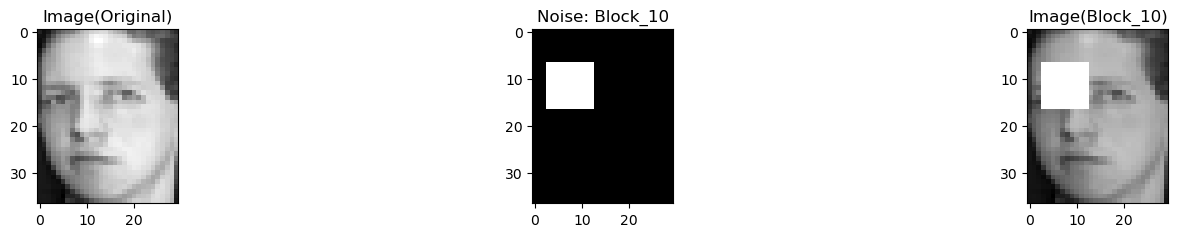

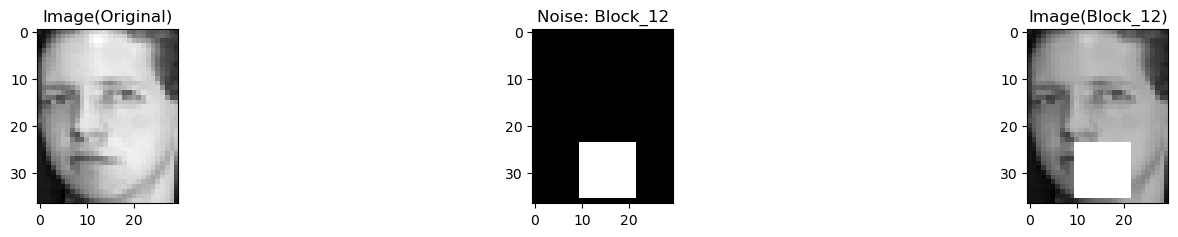

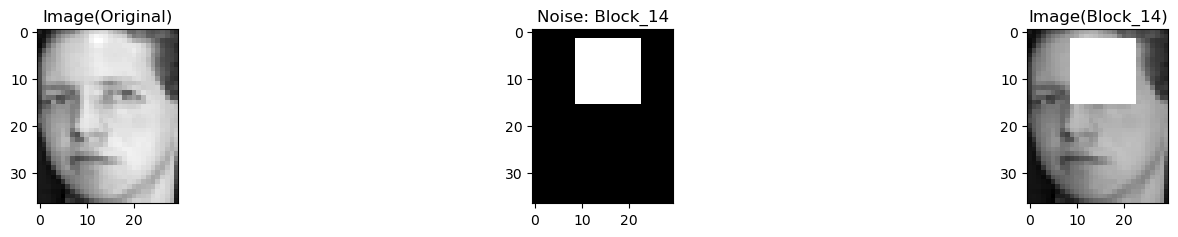

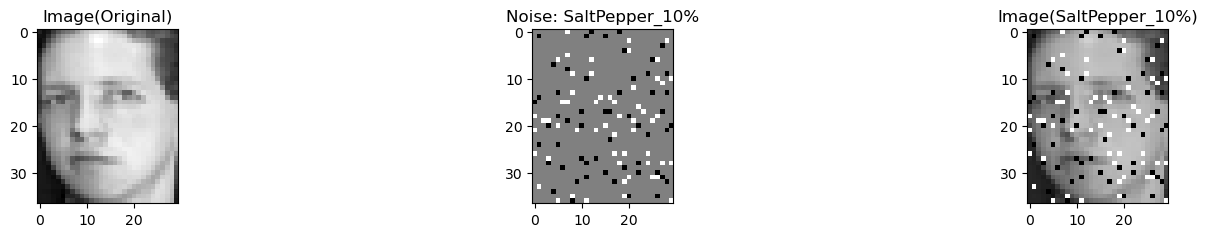

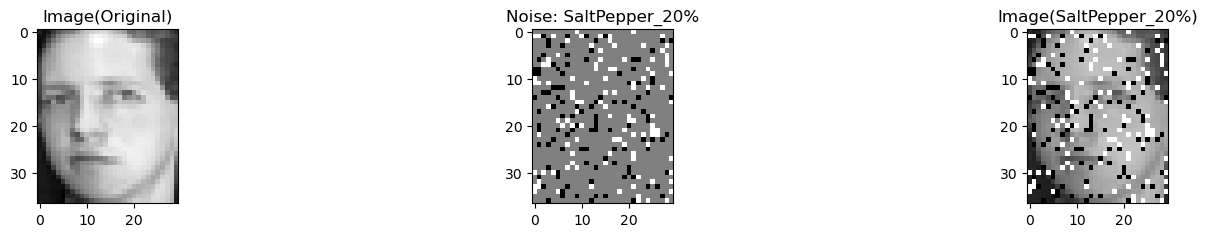

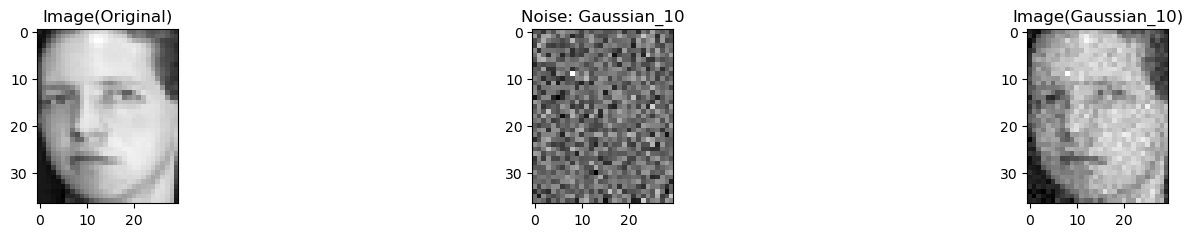

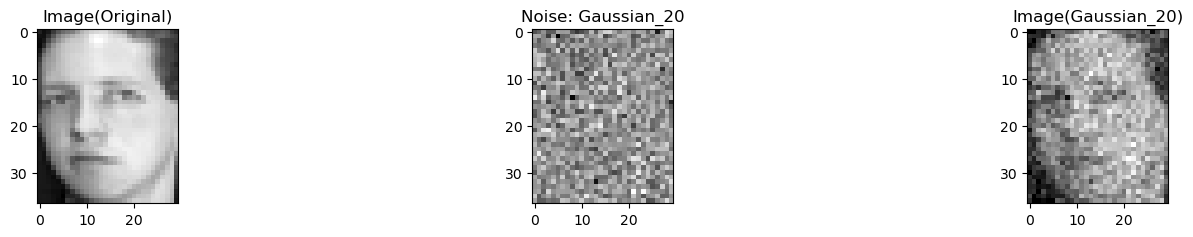

In [3]:
# Load dataset for noise demonstration
print('==> Load ORL dataset ...')
X_hat, Y_hat, img_shape = load_data('data/ORL', reduce=3)
print('X_hat.shape={}, Y_hat.shape={}, Image shape = {}'.format(X_hat.shape, Y_hat.shape, img_shape))

# List the noise 
noise_list = [
    {"img": X_hat, "img_shape": img_shape, "noise_type": "block", "b": 10},
    {"img": X_hat, "img_shape": img_shape, "noise_type": "block", "b": 12},
    {"img": X_hat, "img_shape": img_shape, "noise_type": "block", "b": 14},
    {"img": X_hat, "img_shape": img_shape, "noise_type": "saltpepper", "level": 0.1, "ratio": 0.5},
    {"img": X_hat, "img_shape": img_shape, "noise_type": "saltpepper", "level": 0.2, "ratio": 0.5},
    {"img": X_hat, "img_shape": img_shape, "noise_type": "gaussian", "mean": 0, "std": 0.05},
    {"img": X_hat, "img_shape": img_shape, "noise_type": "gaussian", "mean": 0, "std": 0.1}
    ]

# The name of the noise 
noise_name = ["Block_10", "Block_12", "Block_14", "SaltPepper_10%", "SaltPepper_20%", "Gaussian_10", "Gaussian_20"]

noise_demo(X_hat, noise_list, noise_name)


## Experiment setup

### Testing the robustness of NMF algorithms on Extended YaleB dataset

In [4]:
# Load dataset.
print('==> Load CroppedYaleB dataset ...')
X_hat, Y_hat, img_shape = load_data('data/CroppedYaleB', reduce=4)
print('X_hat.shape={}, Y_hat.shape={}, Image shape = {}'.format(X_hat.shape, Y_hat.shape, img_shape))

# TODO: you should implement NMF algorithms by yourself.
print('==> Apply NMF ...')

==> Load CroppedYaleB dataset ...
X_hat.shape=(2016, 2414), Y_hat.shape=(2414,), Image shape = (48, 42)
==> Apply NMF ...


In [5]:
# Sample 90% of data 3 times for rigorous performance evaluation
X_hat_list, Y_hat_list = get_training_list(X_hat, Y_hat, cv = 3)
# Add noise to images
X_hat_noisy_maplist = generate_test_image(X_hat_list, img_shape)

In [6]:
# Configuration of experiment
n_component = 100
max_iteration = 100
tolerance = 1e-5

#### Testing the L1-norm based NMF on the Extended YaleB dataset

======================================== No noise ========================================


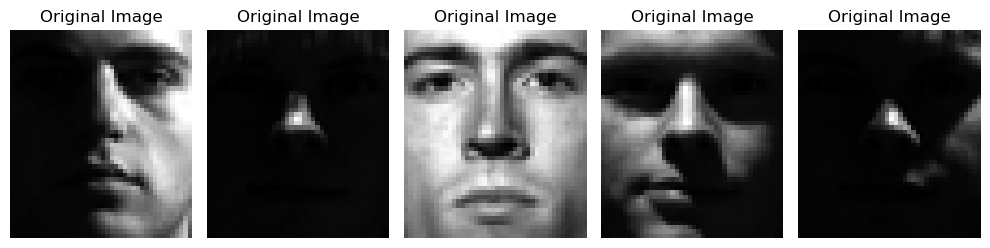

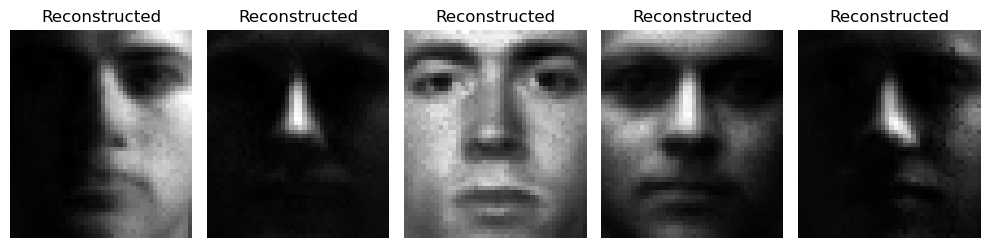

======================================== Noise: block_04 ========================================


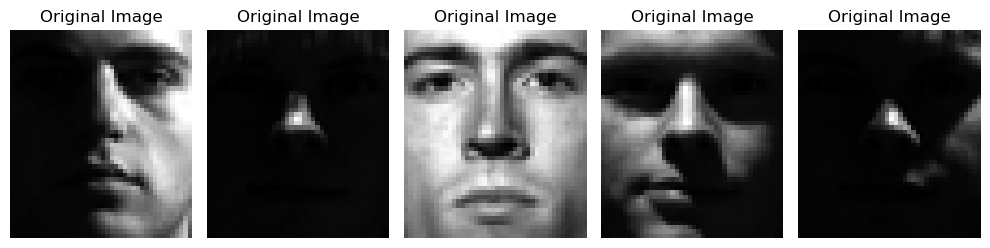

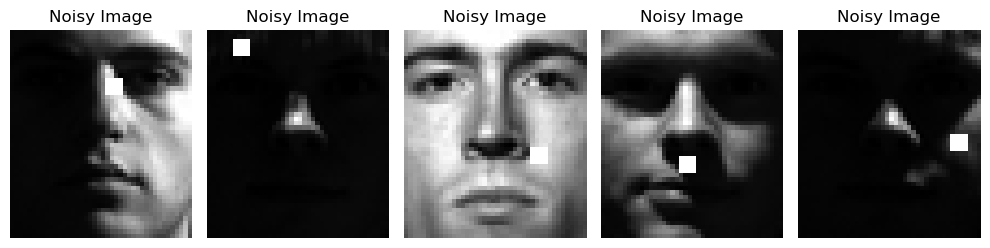

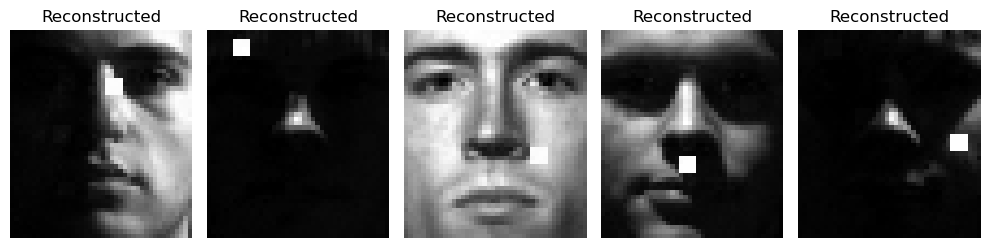

======================================== Noise: block_08 ========================================


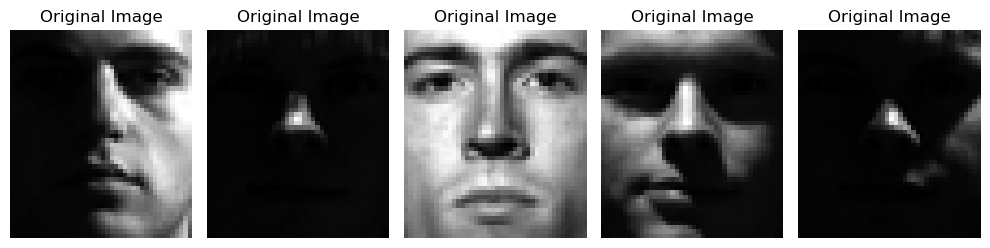

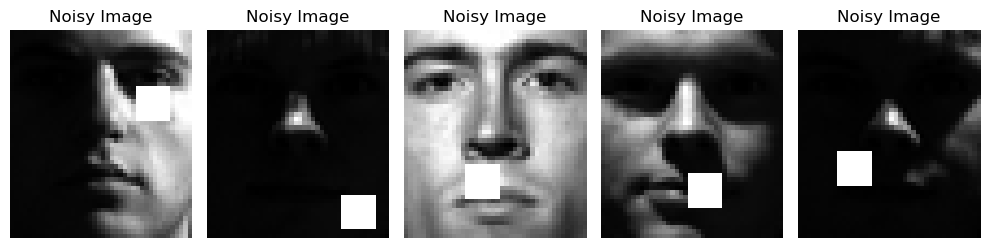

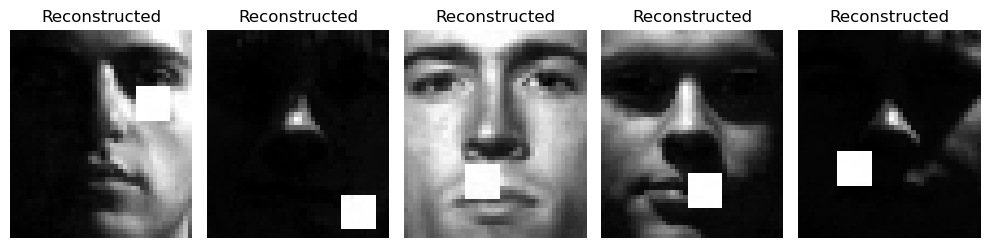

======================================== Noise: block_12 ========================================


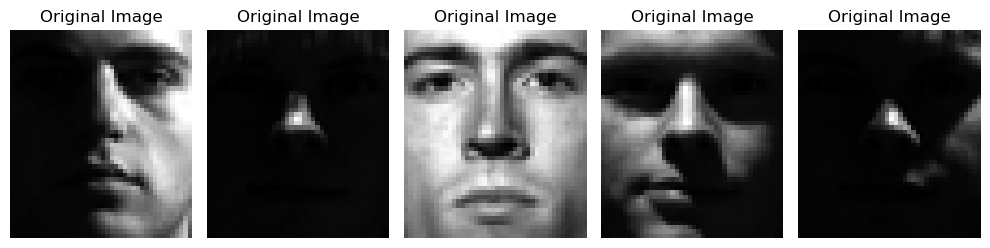

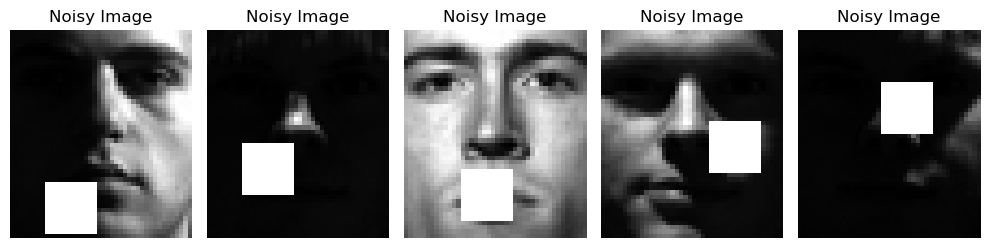

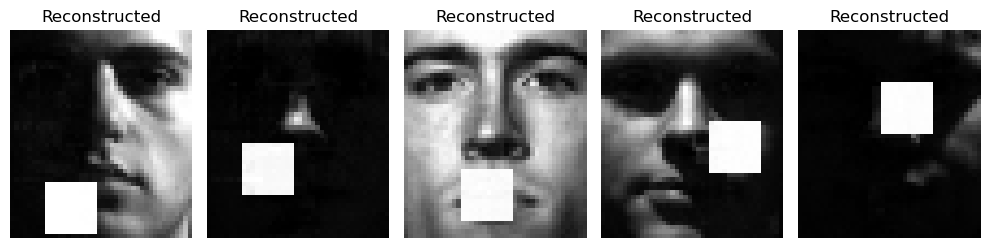

======================================== Noise: saltpepper_5 ========================================


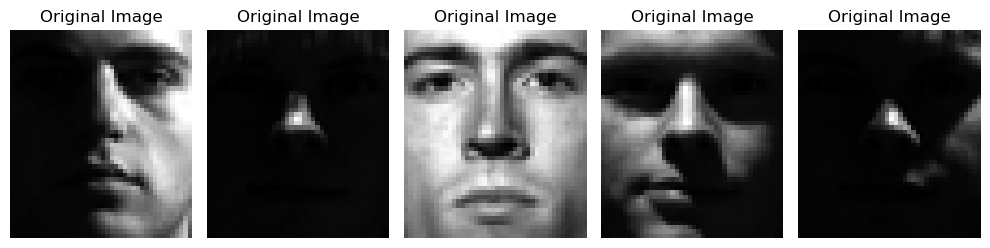

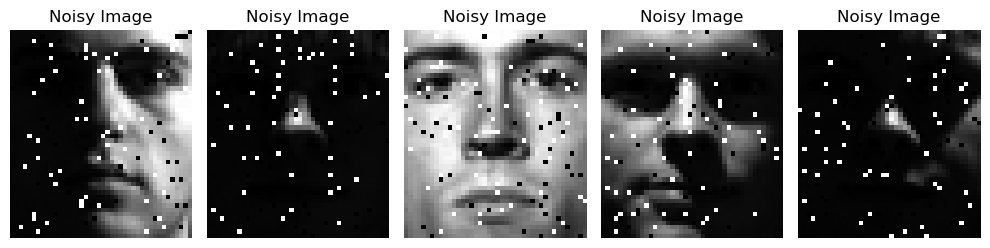

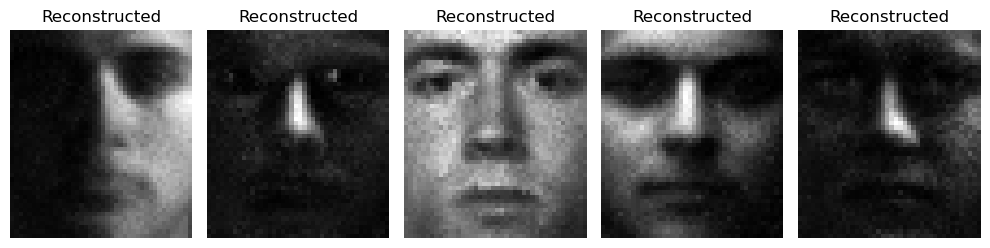

======================================== Noise: saltpepper_10 ========================================


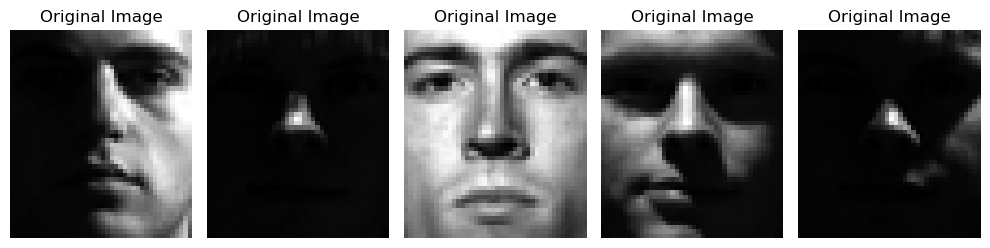

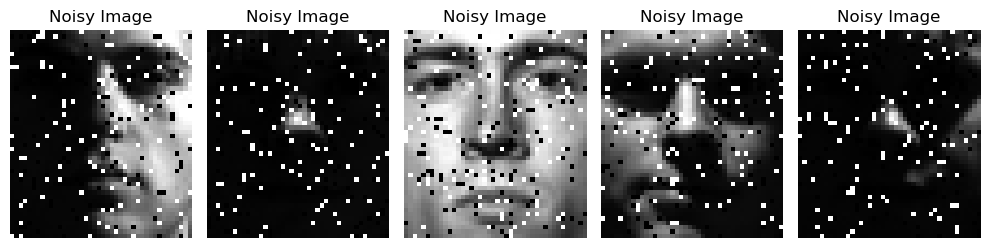

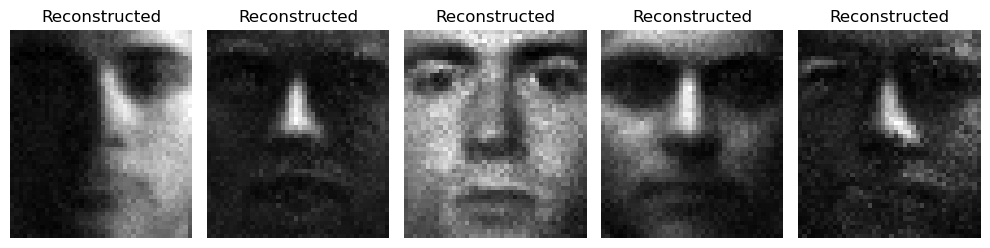

======================================== Noise: saltpepper_20 ========================================


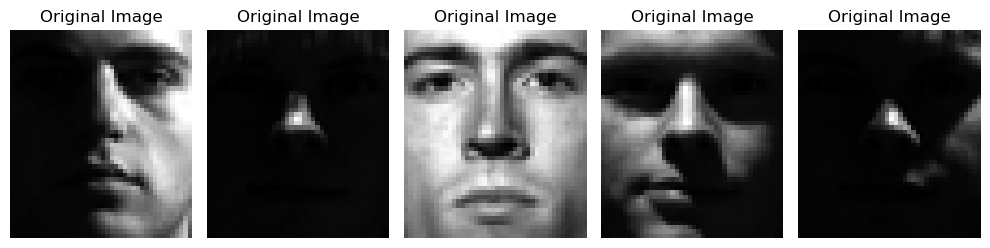

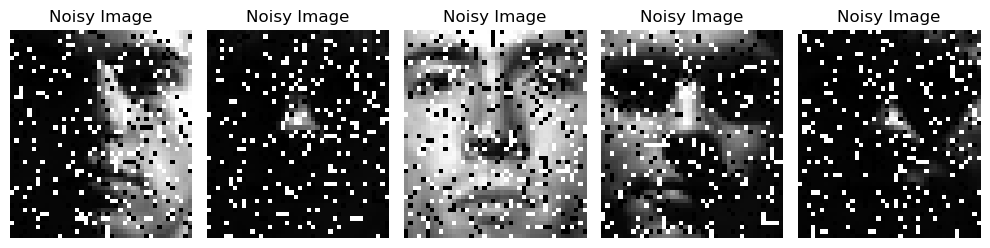

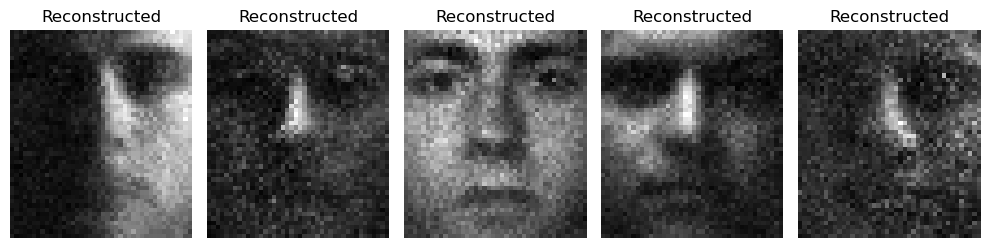

======================================== Noise: gaussian_01 ========================================


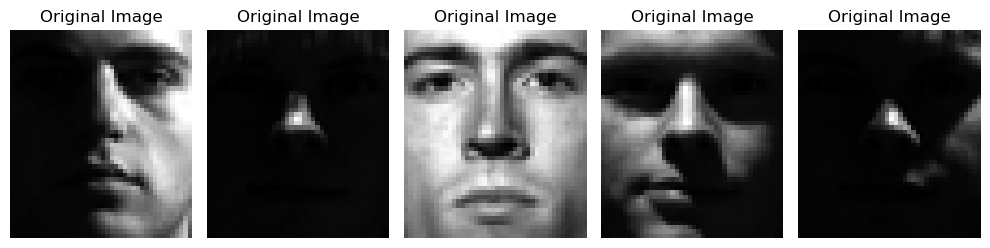

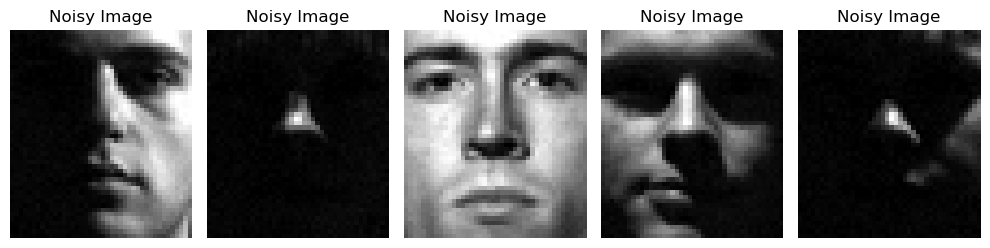

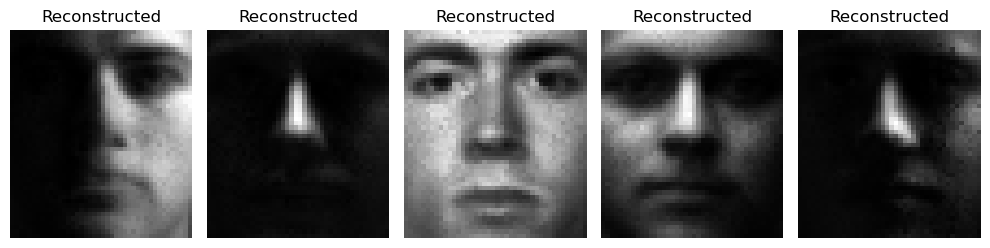

======================================== Noise: gaussian_05 ========================================


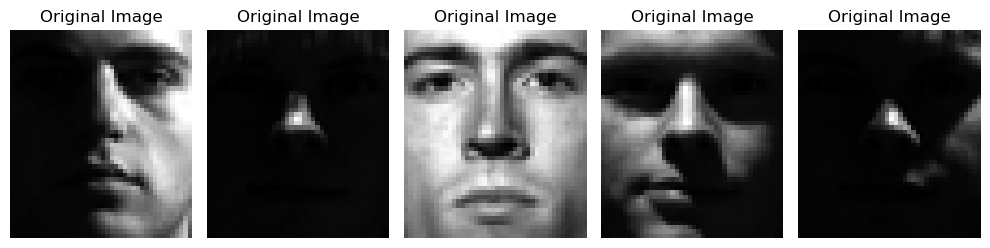

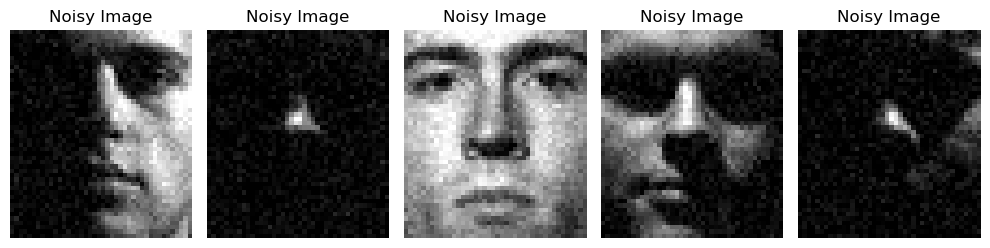

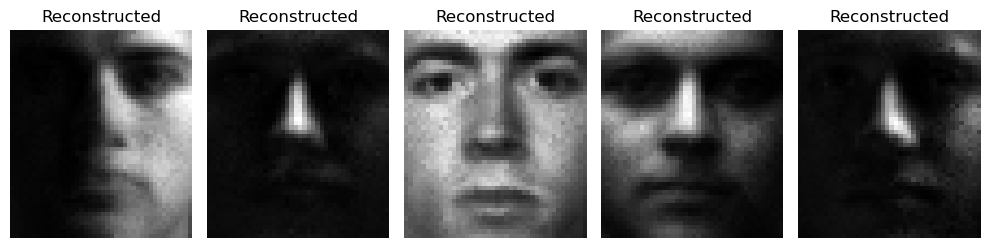

======================================== Noise: gaussian_10 ========================================


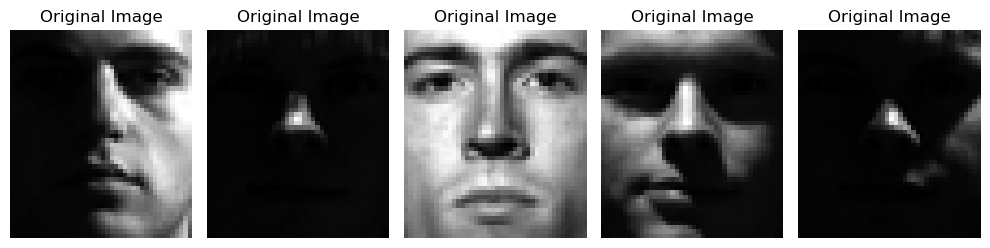

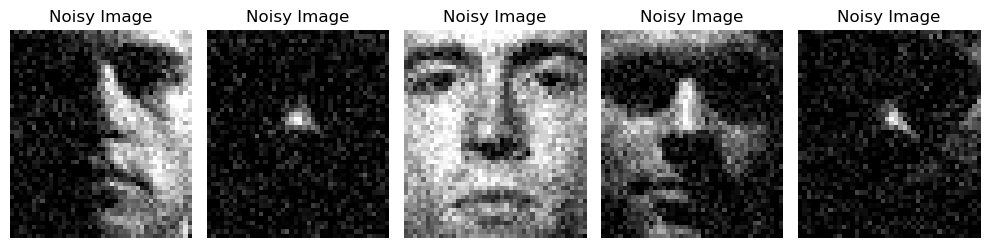

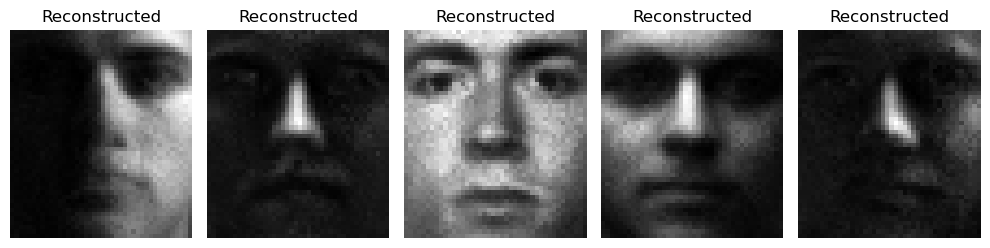

In [7]:
# Create an empty dictionary to store result
EY_L1_result_dict = dict()

for i in range(3):
    # Only display the reconstruction images for the 3rd training smaple to reduce cltter
    display = True if i == 2 else False
    
    EY_L1_result_dict['Result_l1_no_noise_{}'.format(i)] = NMF_and_result(nmf="l1", img_shape = img_shape, noise=None, 
                                                                          noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                          max_iter=max_iteration, tol=tolerance, display = display)

    # block noise
    EY_L1_result_dict['Result_l1_block_04_{}'.format(i)] = NMF_and_result(nmf="l1", img_shape = img_shape, noise="block_04", 
                                                                          noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                          max_iter=max_iteration, tol=tolerance,display = display)
    EY_L1_result_dict['Result_l1_block_08_{}'.format(i)] = NMF_and_result(nmf="l1", img_shape = img_shape, noise="block_08", 
                                                                          noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                          max_iter=max_iteration, tol=tolerance, display = display)
    EY_L1_result_dict['Result_l1_block_12_{}'.format(i)] = NMF_and_result(nmf="l1", img_shape = img_shape, noise="block_12", 
                                                                          noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                          max_iter=max_iteration, tol=tolerance, display = display)

    # saltpepper noise
    EY_L1_result_dict['Result_l1_saltpepper_5_{}'.format(i)] = NMF_and_result(nmf="l1", img_shape = img_shape, noise="saltpepper_5", 
                                                                              noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                              max_iter=max_iteration, tol=tolerance, display = display)
    EY_L1_result_dict['Result_l1_saltpepper_10_{}'.format(i)] = NMF_and_result(nmf="l1", img_shape = img_shape, noise="saltpepper_10", 
                                                                               noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                               max_iter=max_iteration, tol=tolerance, display = display)
    EY_L1_result_dict['Result_l1_saltpepper_20_{}'.format(i)] = NMF_and_result(nmf="l1", img_shape = img_shape, noise="saltpepper_20", 
                                                                               noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                               max_iter=max_iteration, tol=tolerance, display = display)

    # gaussian noise
    EY_L1_result_dict['Result_l1_gaussian_01_{}'.format(i)] = NMF_and_result(nmf="l1", img_shape = img_shape, noise="gaussian_01", 
                                                                             noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                             max_iter=max_iteration, tol=tolerance, display = display)
    EY_L1_result_dict['Result_l1_gaussian_05_{}'.format(i)] = NMF_and_result(nmf="l1", img_shape = img_shape, noise="gaussian_05", 
                                                                             noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                             max_iter=max_iteration, tol=tolerance, display = display)
    EY_L1_result_dict['Result_l1_gaussian_10_{}'.format(i)] = NMF_and_result(nmf="l1", img_shape = img_shape, noise="gaussian_10", 
                                                                             noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                             max_iter=max_iteration, tol=tolerance, display = display)
    

#### Testing the L2-norm based NMF on the Extended YaleB dataset

======================================== No noise ========================================


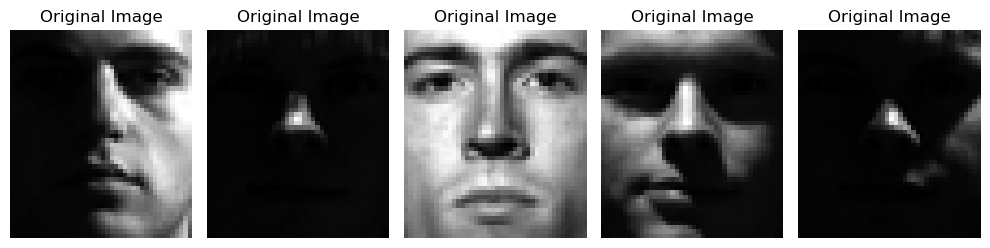

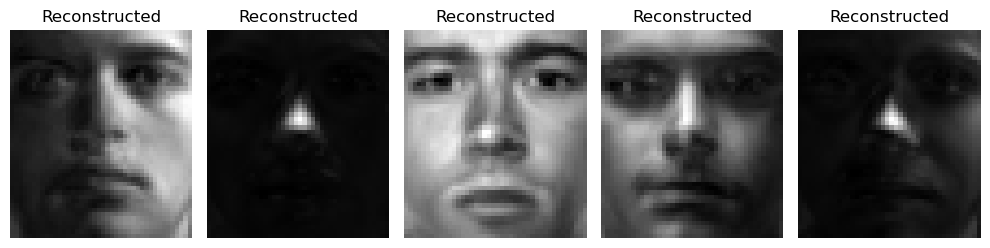

======================================== Noise: block_04 ========================================


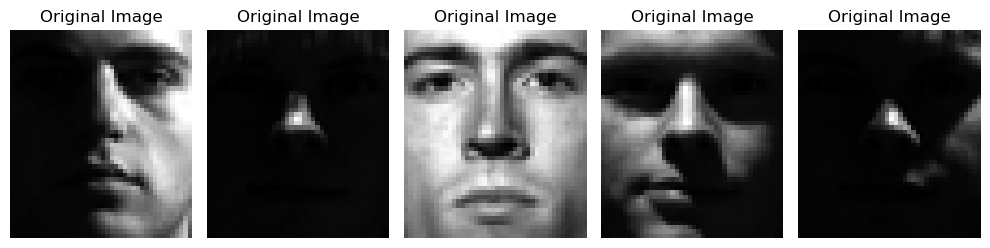

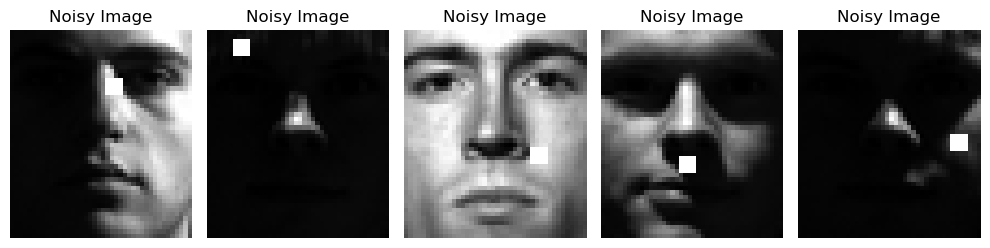

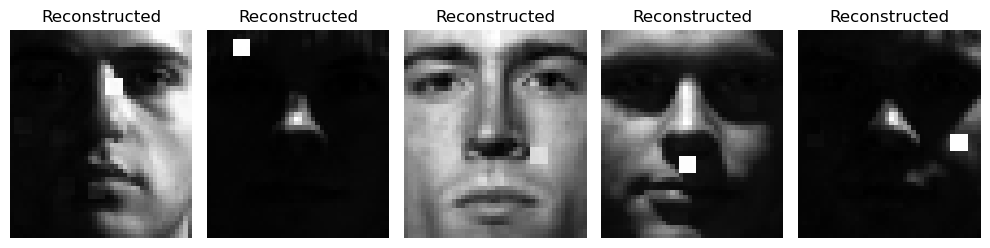

======================================== Noise: block_08 ========================================


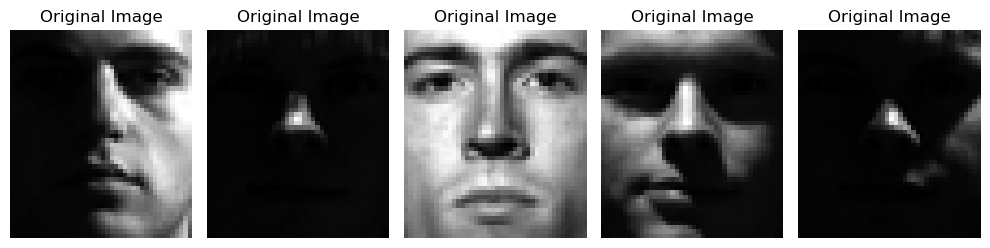

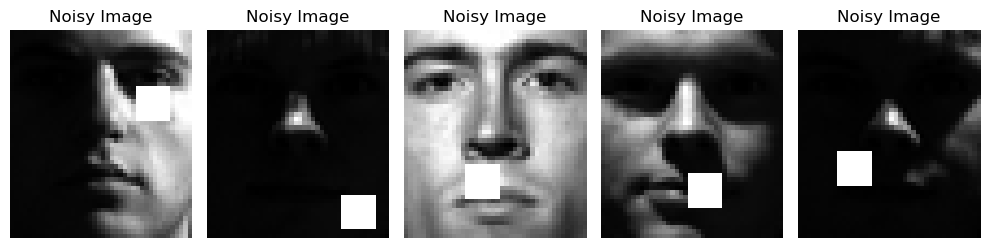

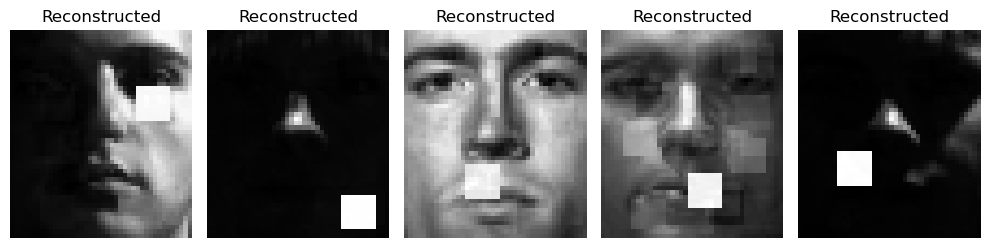

======================================== Noise: block_12 ========================================


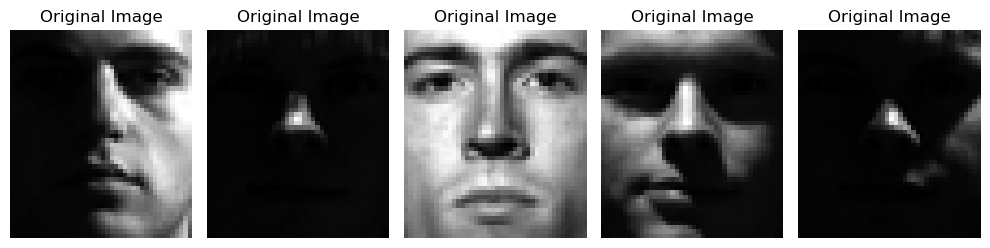

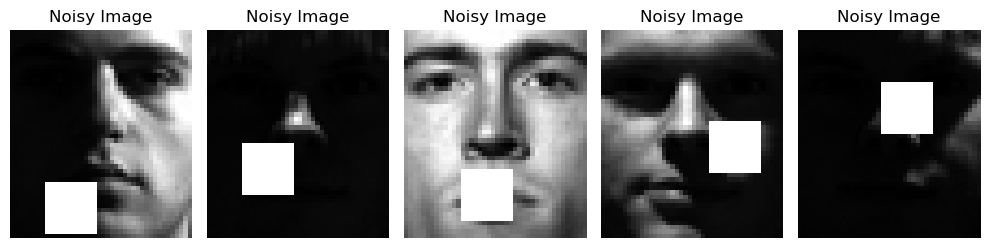

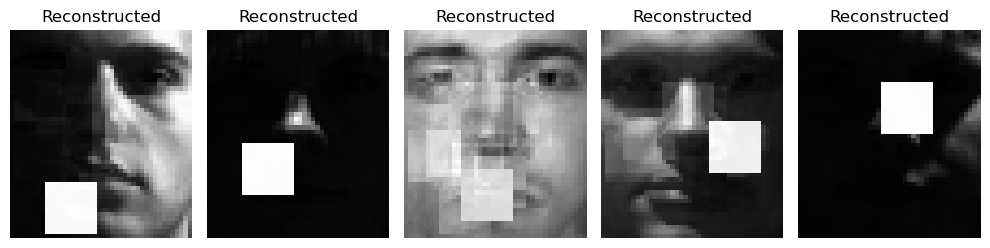

======================================== Noise: saltpepper_5 ========================================


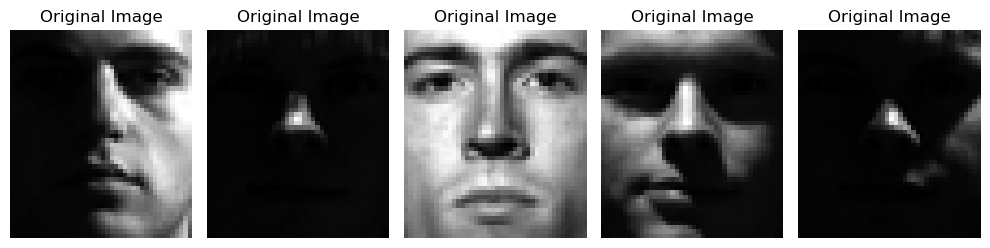

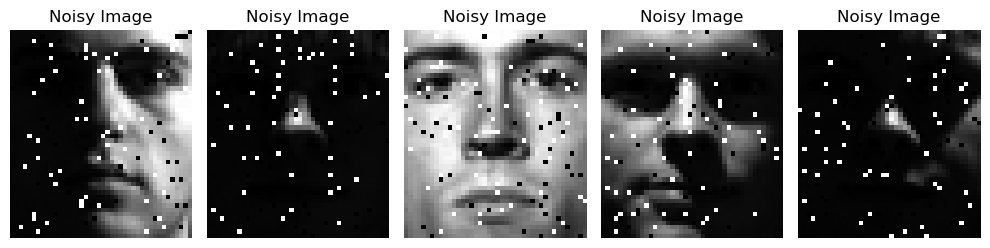

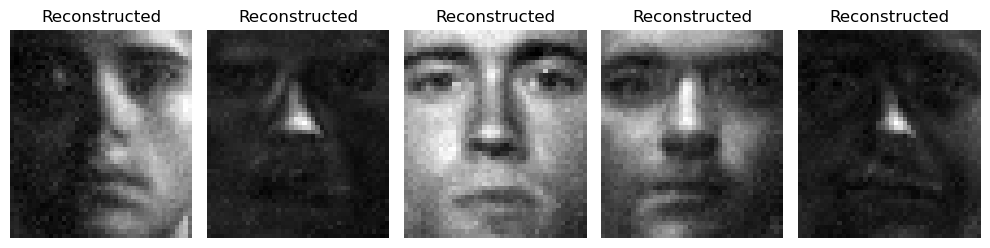

======================================== Noise: saltpepper_10 ========================================


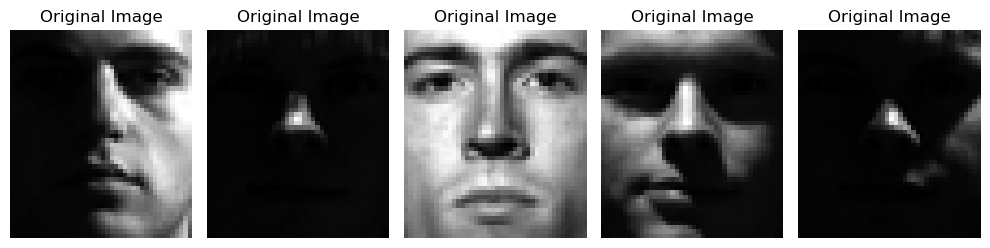

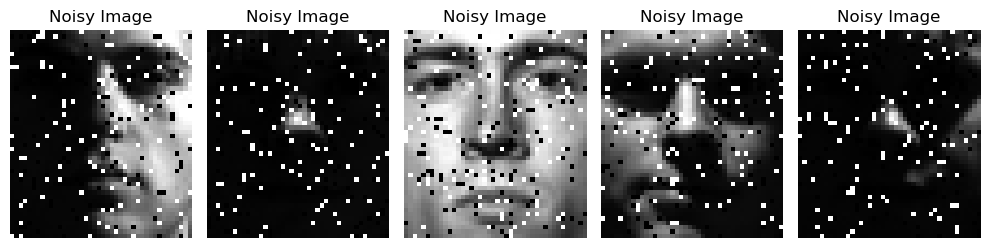

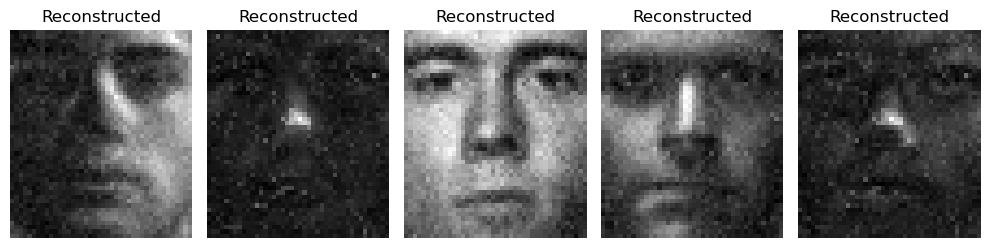

======================================== Noise: saltpepper_20 ========================================


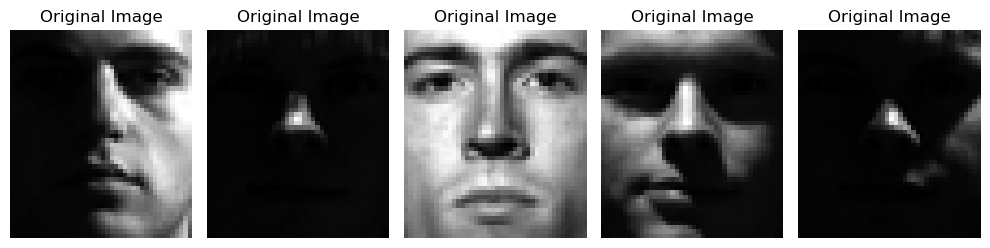

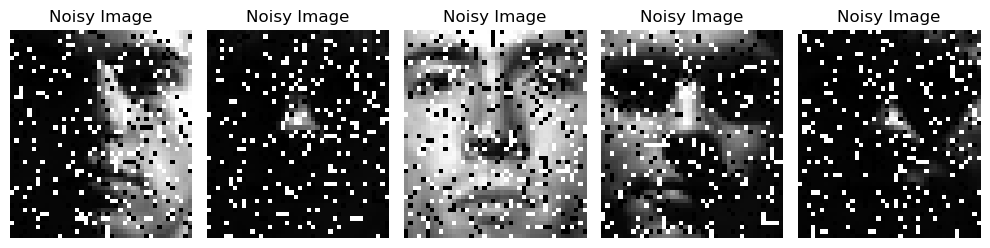

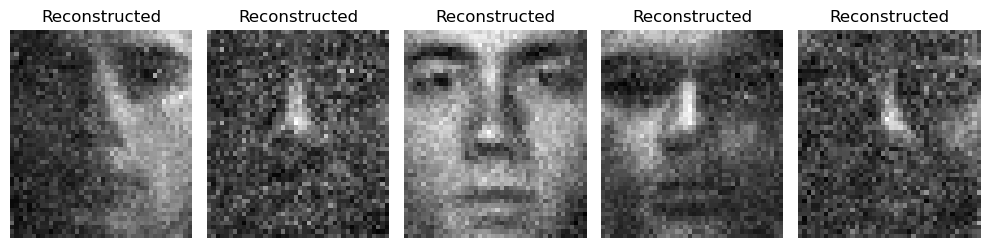

======================================== Noise: gaussian_01 ========================================


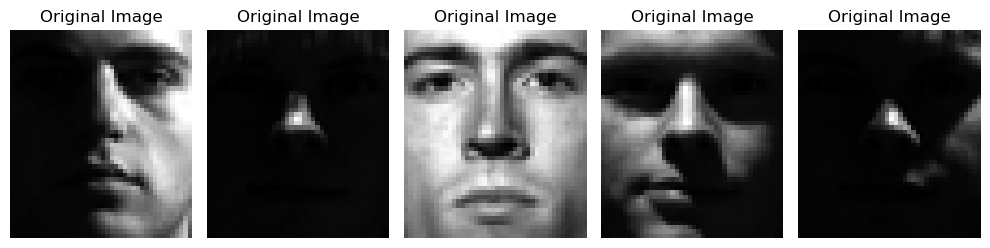

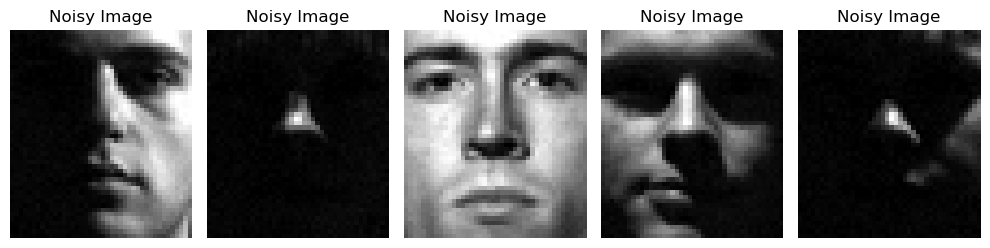

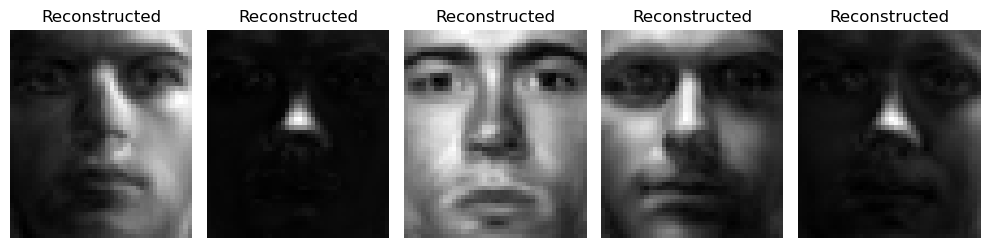

======================================== Noise: gaussian_05 ========================================


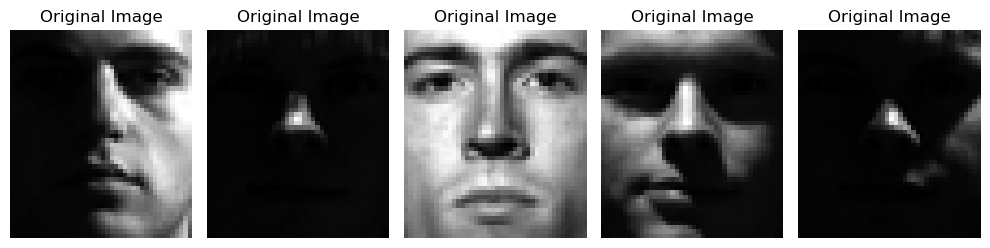

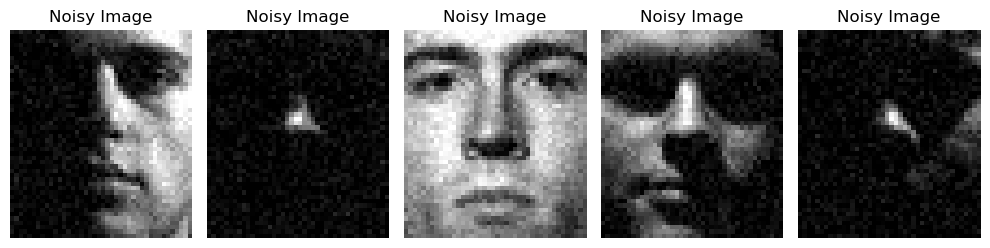

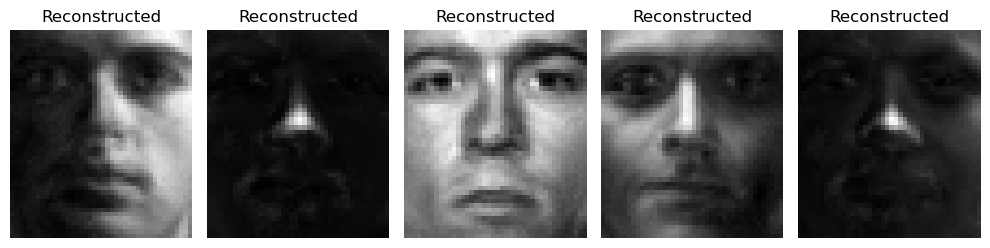

======================================== Noise: gaussian_10 ========================================


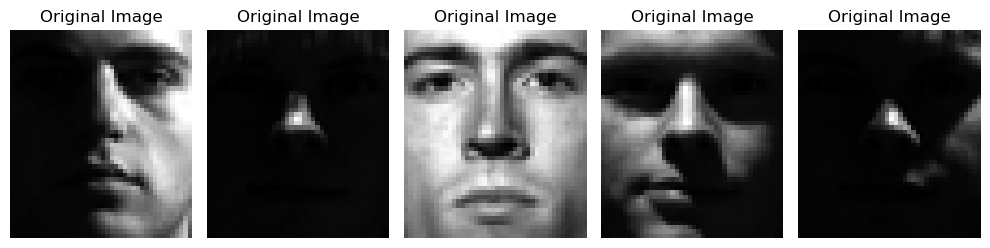

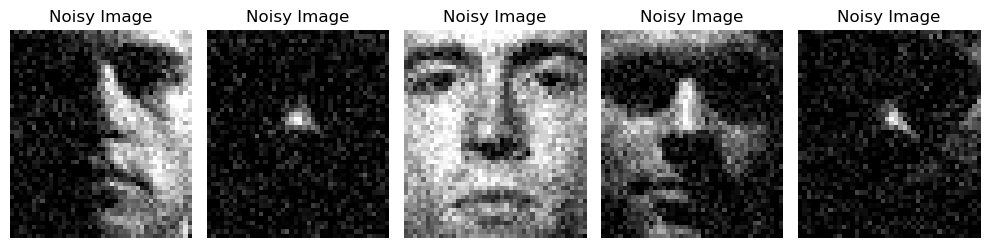

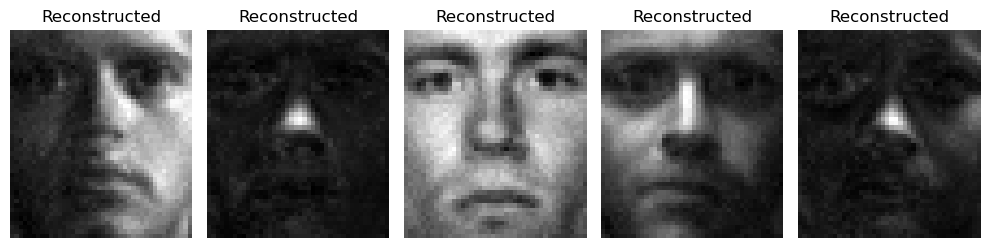

In [8]:
# Create an empty dictionary to store result
EY_L2_result_dict = dict()
for i in range(3):
    # Only display the reconstruction images for the 3rd training smaple to reduce cltter
    display = True if i == 2 else False

    EY_L2_result_dict['Result_l2_no_noise_{}'.format(i)] = NMF_and_result(nmf="l2", img_shape = img_shape, noise=None, 
                                                                          noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                          max_iter=max_iteration, tol=tolerance, display = display)

    # block noise
    EY_L2_result_dict['Result_l2_block_04_{}'.format(i)] = NMF_and_result(nmf="l2", img_shape = img_shape, noise="block_04", 
                                                                          noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                          max_iter=max_iteration, tol=tolerance, display = display)
    EY_L2_result_dict['Result_l2_block_08_{}'.format(i)] = NMF_and_result(nmf="l2", img_shape = img_shape, noise="block_08", 
                                                                          noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                          max_iter=max_iteration, tol=tolerance, display = display)
    EY_L2_result_dict['Result_l2_block_12_{}'.format(i)] = NMF_and_result(nmf="l2", img_shape = img_shape, noise="block_12", 
                                                                          noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                          max_iter=max_iteration, tol=tolerance, display = display)

    # saltpepper noise
    EY_L2_result_dict['Result_l2_saltpepper_5_{}'.format(i)] = NMF_and_result(nmf="l2", img_shape = img_shape, noise="saltpepper_5", 
                                                                              noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                              max_iter=max_iteration, tol=tolerance, display = display)
    EY_L2_result_dict['Result_l2_saltpepper_10_{}'.format(i)] = NMF_and_result(nmf="l2", img_shape = img_shape, noise="saltpepper_10", 
                                                                               noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                               max_iter=max_iteration, tol=tolerance, display = display)
    EY_L2_result_dict['Result_l2_saltpepper_20_{}'.format(i)] = NMF_and_result(nmf="l2", img_shape = img_shape, noise="saltpepper_20", 
                                                                               noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                               max_iter=max_iteration, tol=tolerance, display = display)

    # gaussian noise
    EY_L2_result_dict['Result_l2_gaussian_01_{}'.format(i)] = NMF_and_result(nmf="l2", img_shape = img_shape, noise="gaussian_01", 
                                                                             noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                             max_iter=max_iteration, tol=tolerance, display = display)
    EY_L2_result_dict['Result_l2_gaussian_05_{}'.format(i)] = NMF_and_result(nmf="l2", img_shape = img_shape, noise="gaussian_05", 
                                                                             noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                             max_iter=max_iteration, tol=tolerance, display = display)
    EY_L2_result_dict['Result_l2_gaussian_10_{}'.format(i)] = NMF_and_result(nmf="l2", img_shape = img_shape, noise="gaussian_10", 
                                                                             noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                             max_iter=max_iteration, tol=tolerance, display = display)

### Testing the CIM-NMF on the Extended YaleB dataset

======================================== No noise ========================================


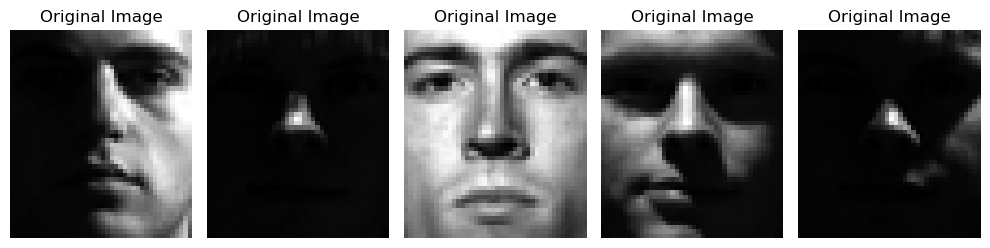

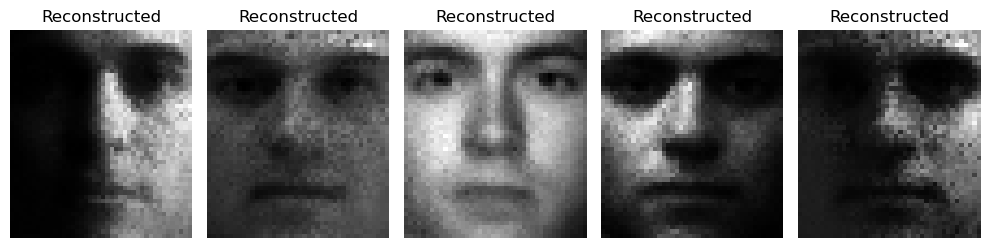

======================================== Noise: block_04 ========================================


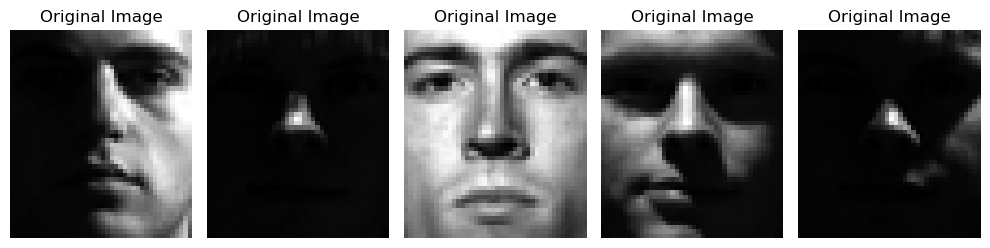

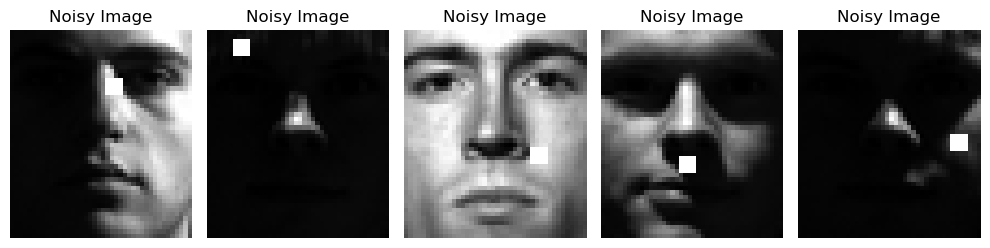

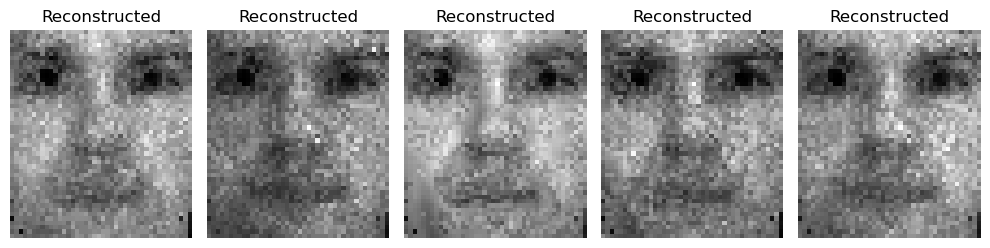

======================================== Noise: block_08 ========================================


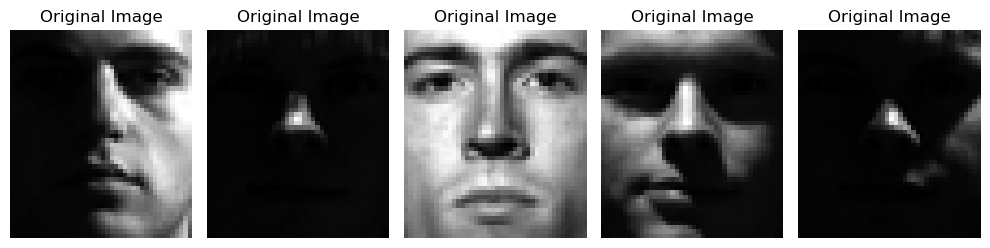

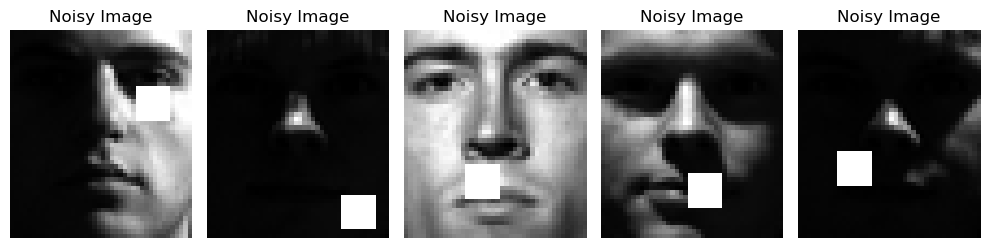

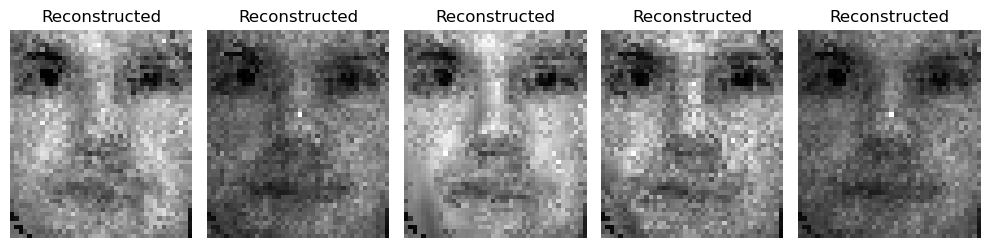

======================================== Noise: block_12 ========================================


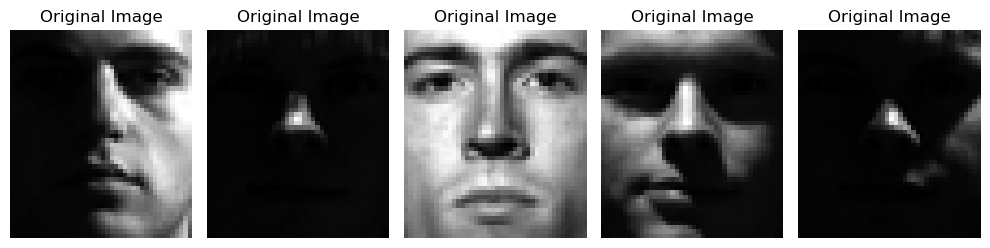

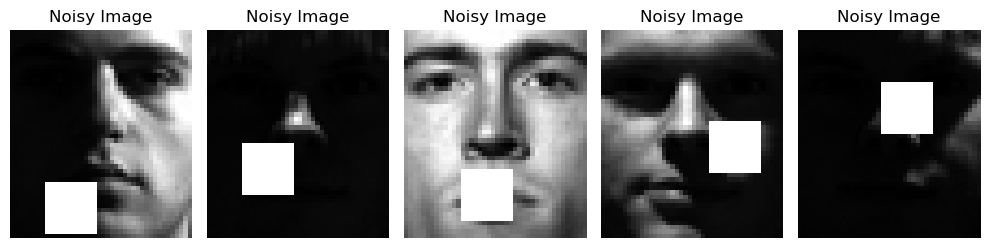

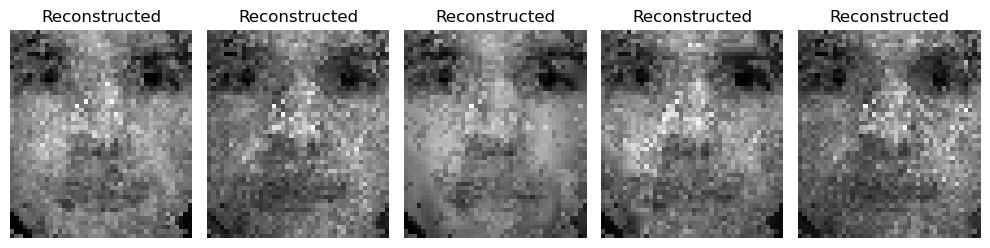

======================================== Noise: saltpepper_5 ========================================


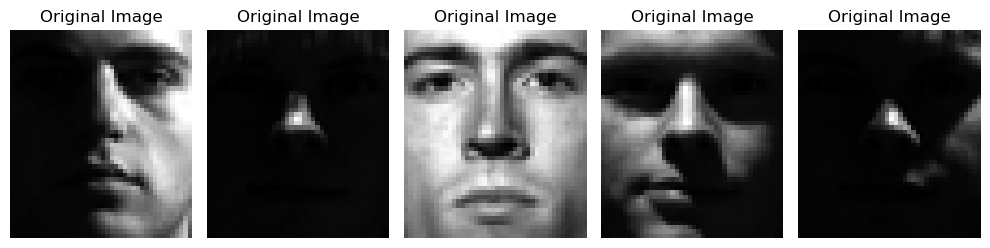

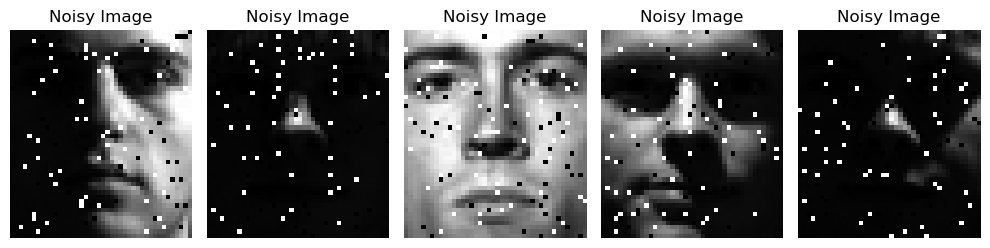

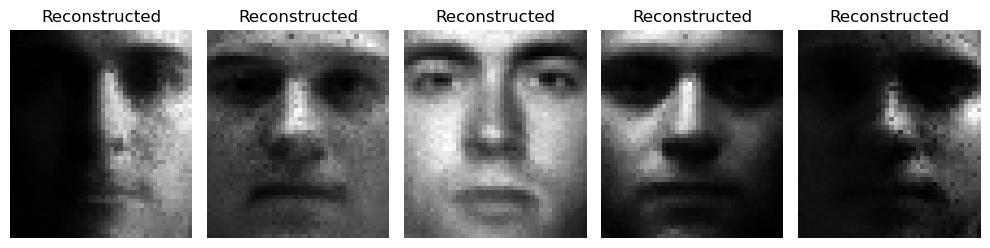

======================================== Noise: saltpepper_10 ========================================


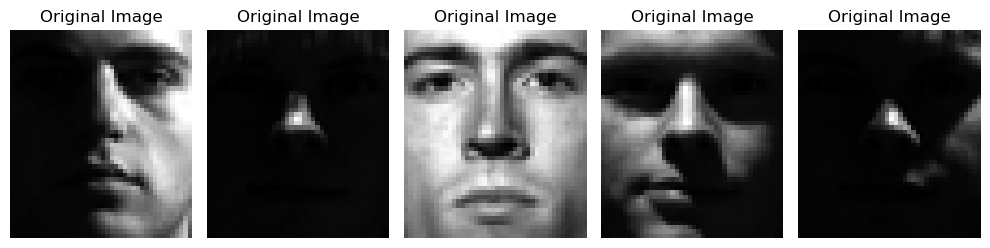

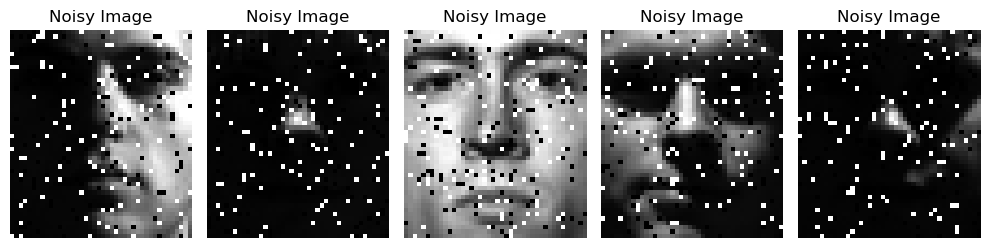

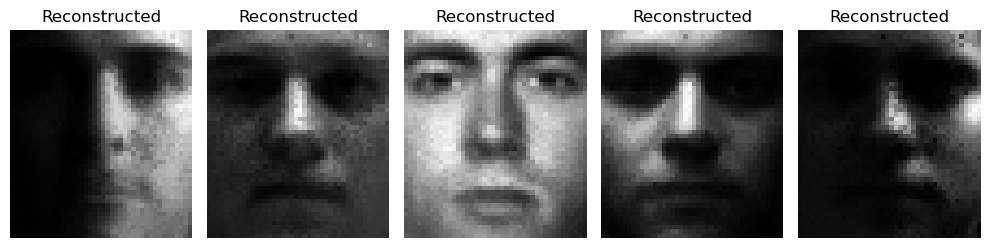

======================================== Noise: saltpepper_20 ========================================


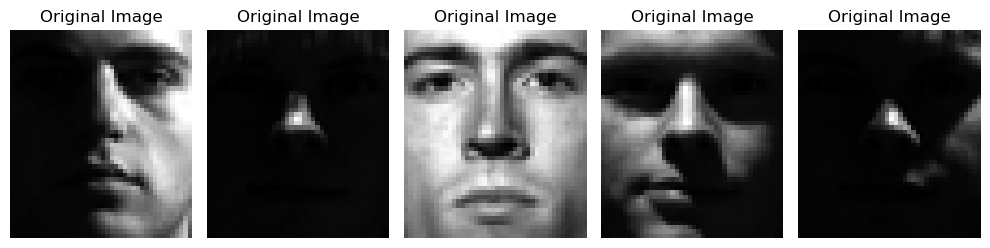

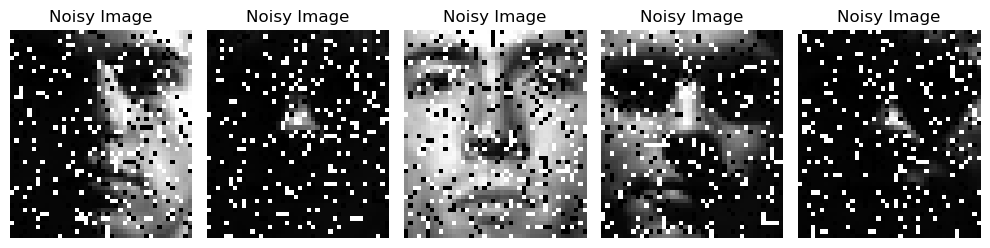

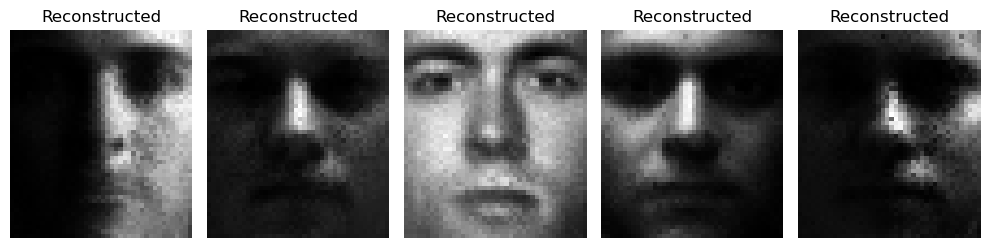

======================================== Noise: gaussian_01 ========================================


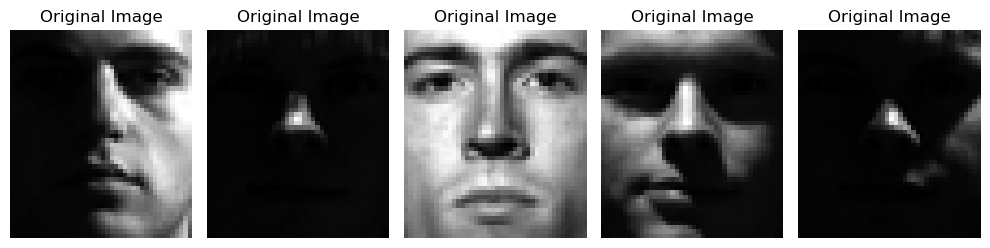

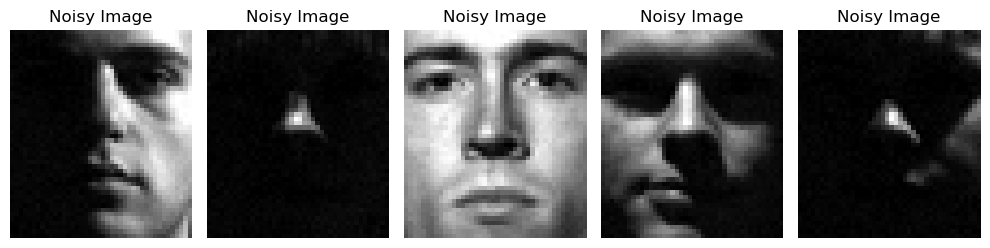

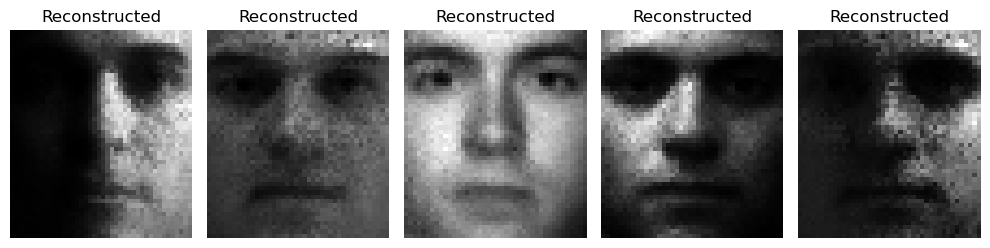

======================================== Noise: gaussian_05 ========================================


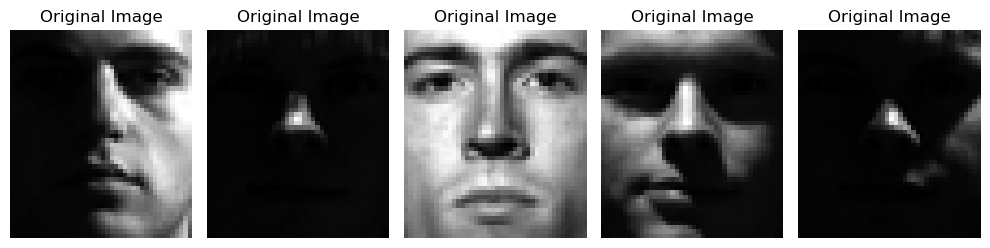

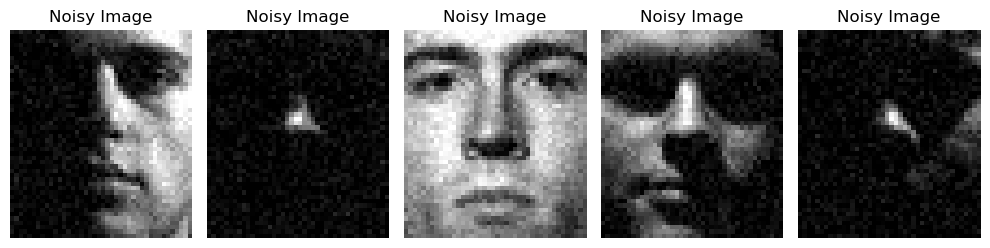

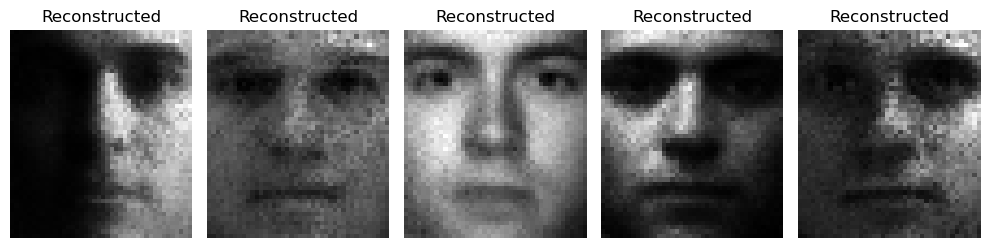

======================================== Noise: gaussian_10 ========================================


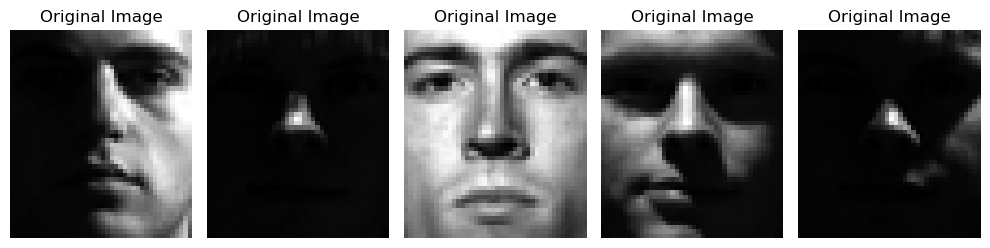

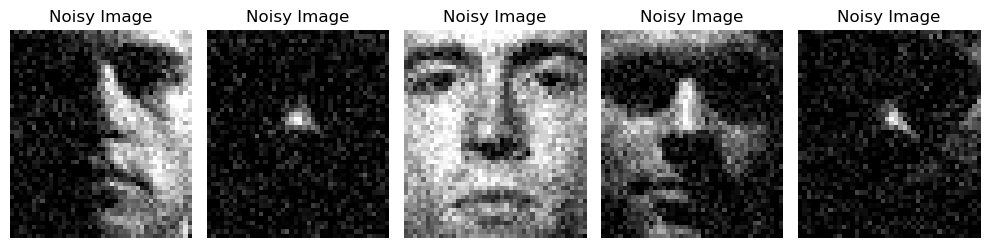

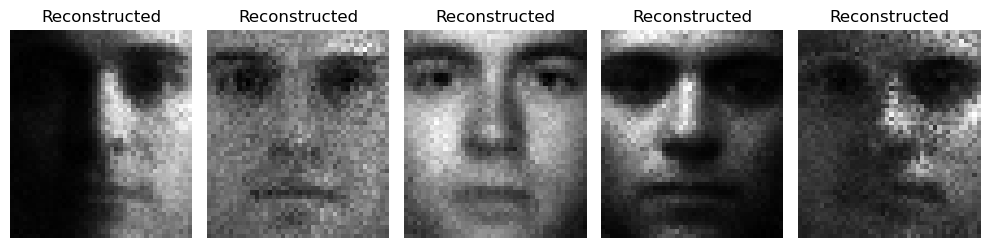

In [9]:
# Create an empty dictionary to store result
EY_CIM_result_dict = dict()
for i in range(3):
    # Only display the reconstruction images for the 3rd training smaple to reduce cltter
    display = True if i == 2 else False
    
    EY_CIM_result_dict['Result_CIM_no_noise_{}'.format(i)] = NMF_and_result(nmf="CIM", img_shape = img_shape, noise=None, 
                                                                            noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                            max_iter=max_iteration, tol=tolerance, display = display)

    # block noise
    EY_CIM_result_dict['Result_CIM_block_04_{}'.format(i)] = NMF_and_result(nmf="CIM", img_shape = img_shape, noise="block_04", 
                                                                            noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                            max_iter=max_iteration, tol=tolerance, display = display)
    EY_CIM_result_dict['Result_CIM_block_08_{}'.format(i)] = NMF_and_result(nmf="CIM", img_shape = img_shape, noise="block_08", 
                                                                            noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                            max_iter=max_iteration, tol=tolerance, display = display)
    EY_CIM_result_dict['Result_CIM_block_12_{}'.format(i)] = NMF_and_result(nmf="CIM", img_shape = img_shape, noise="block_12", 
                                                                            noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                            max_iter=max_iteration, tol=tolerance, display = display)

    # saltpepper noise
    EY_CIM_result_dict['Result_CIM_saltpepper_5_{}'.format(i)] = NMF_and_result(nmf="CIM", img_shape = img_shape, noise="saltpepper_5", 
                                                                                noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                                max_iter=max_iteration, tol=tolerance, display = display)
    EY_CIM_result_dict['Result_CIM_saltpepper_10_{}'.format(i)] = NMF_and_result(nmf="CIM", img_shape = img_shape, noise="saltpepper_10", 
                                                                                 noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                                 max_iter=max_iteration, tol=tolerance, display = display)
    EY_CIM_result_dict['Result_CIM_saltpepper_20_{}'.format(i)] = NMF_and_result(nmf="CIM", img_shape = img_shape, noise="saltpepper_20", 
                                                                                 noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                                 max_iter=max_iteration, tol=tolerance, display = display)

    # gaussian noise
    EY_CIM_result_dict['Result_CIM_gaussian_01_{}'.format(i)] = NMF_and_result(nmf="CIM", img_shape = img_shape, noise="gaussian_01", 
                                                                               noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                               max_iter=max_iteration, tol=tolerance, display = display)
    EY_CIM_result_dict['Result_CIM_gaussian_05_{}'.format(i)] = NMF_and_result(nmf="CIM", img_shape = img_shape, noise="gaussian_05", 
                                                                               noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                               max_iter=max_iteration, tol=tolerance, display = display)
    EY_CIM_result_dict['Result_CIM_gaussian_10_{}'.format(i)] = NMF_and_result(nmf="CIM", img_shape = img_shape, noise="gaussian_10", 
                                                                               noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                               max_iter=max_iteration, tol=tolerance, display = display)


#### Testing the Huber-NMF on the Extended YaleB dataset

======================================== No noise ========================================


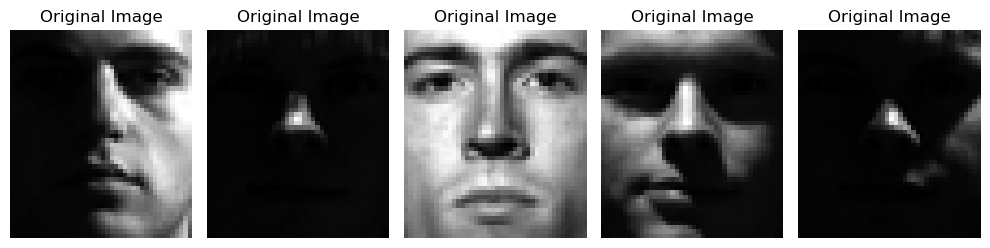

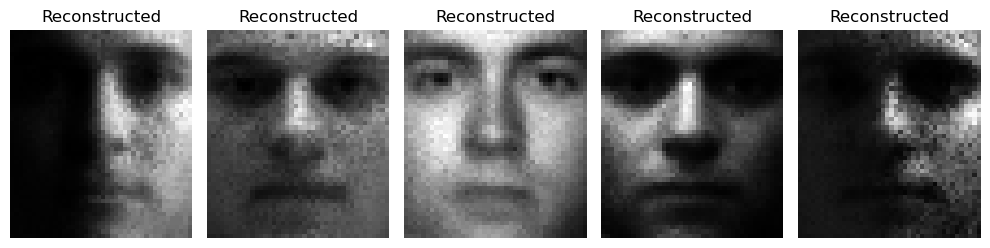

======================================== Noise: block_04 ========================================


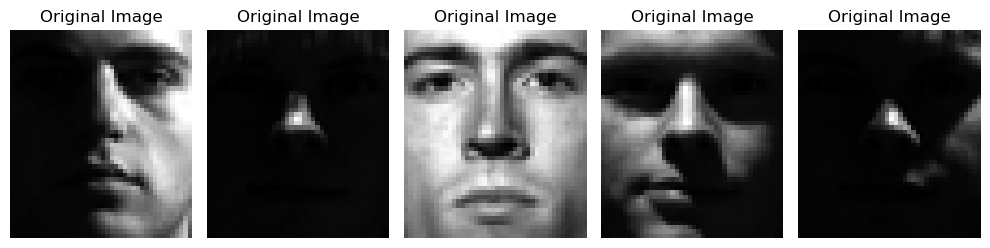

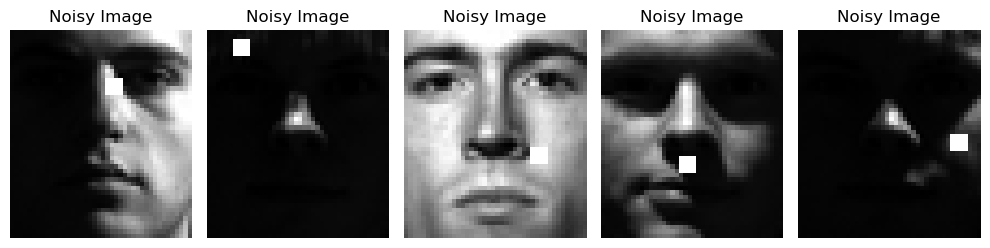

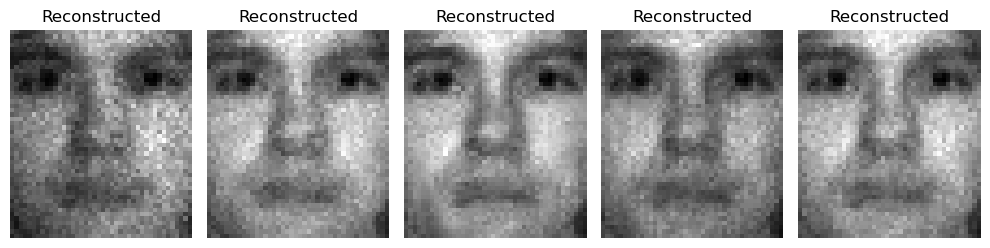

======================================== Noise: block_08 ========================================


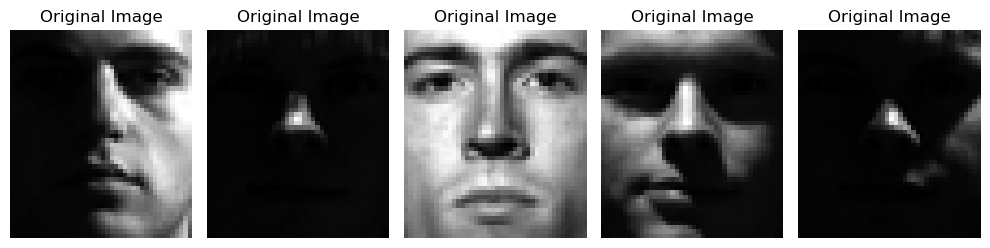

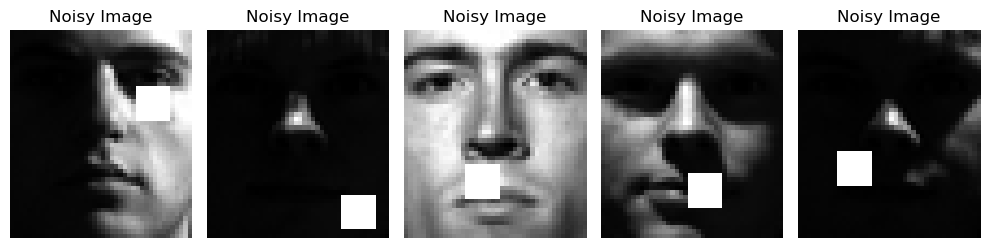

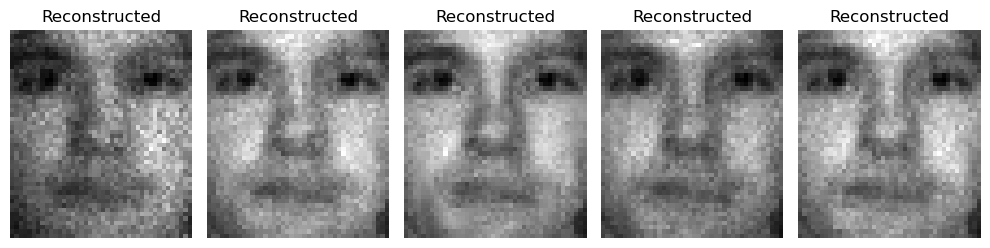

======================================== Noise: block_12 ========================================


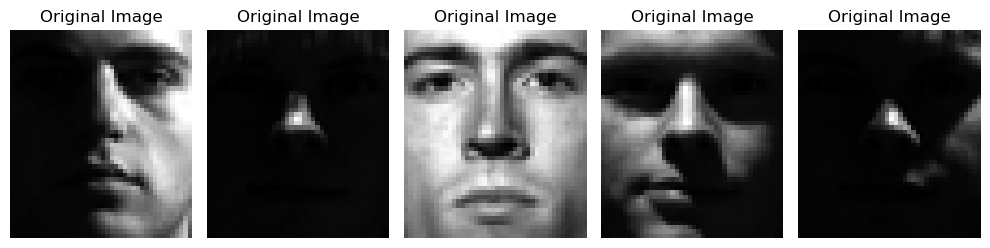

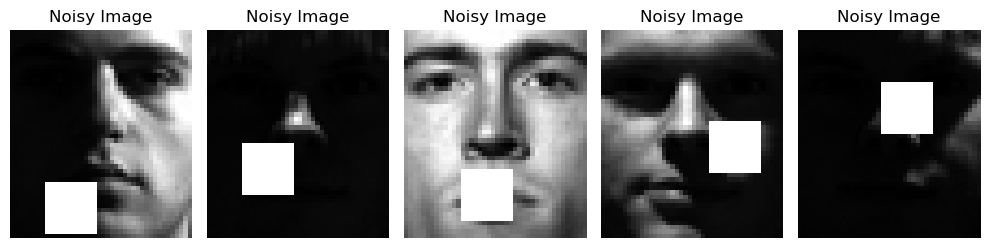

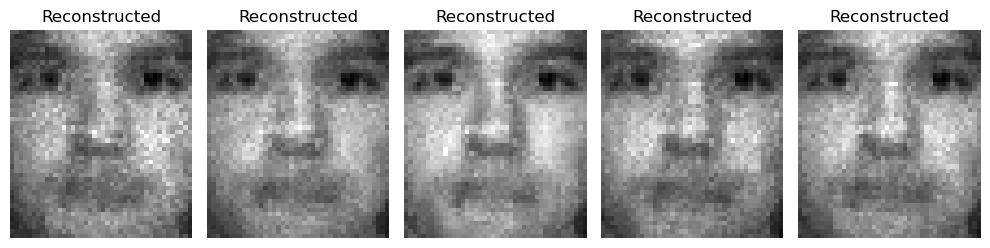

======================================== Noise: saltpepper_5 ========================================


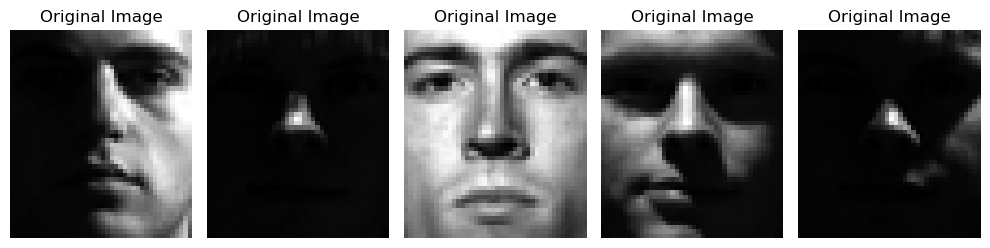

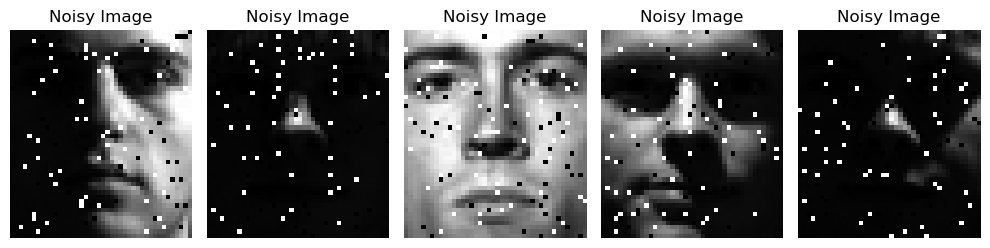

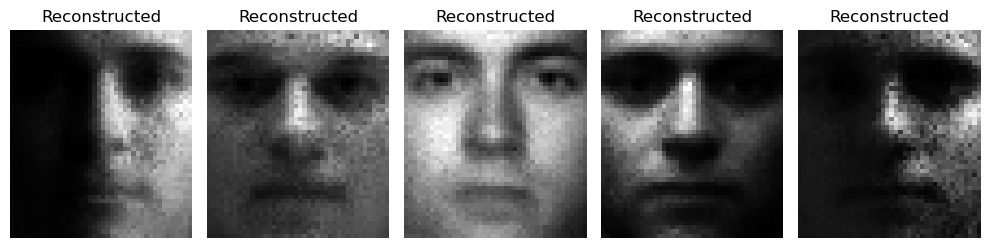

======================================== Noise: saltpepper_10 ========================================


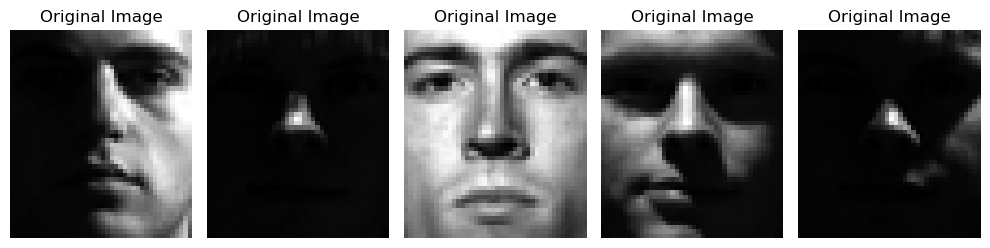

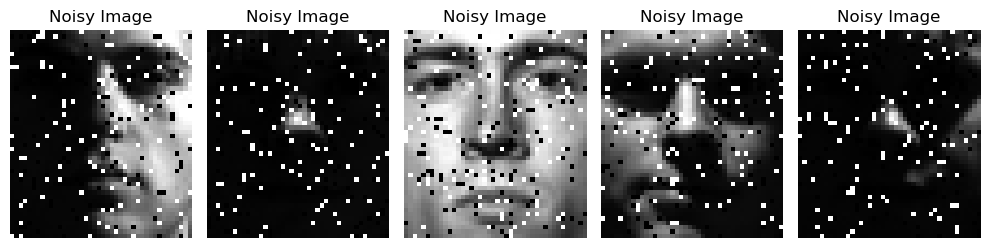

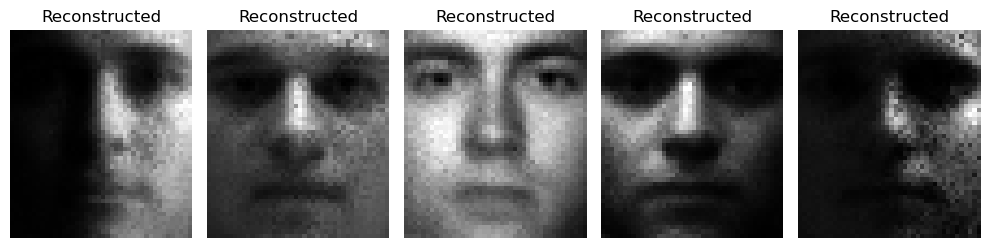

======================================== Noise: saltpepper_20 ========================================


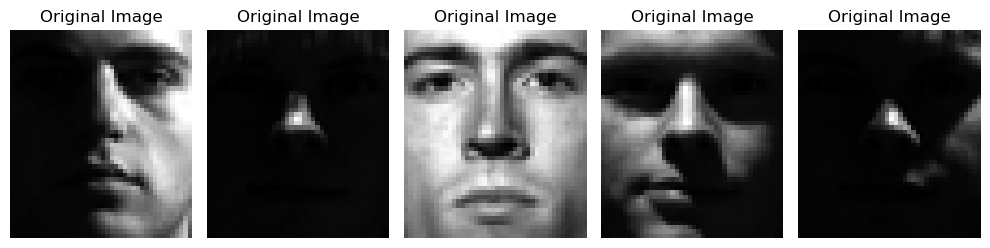

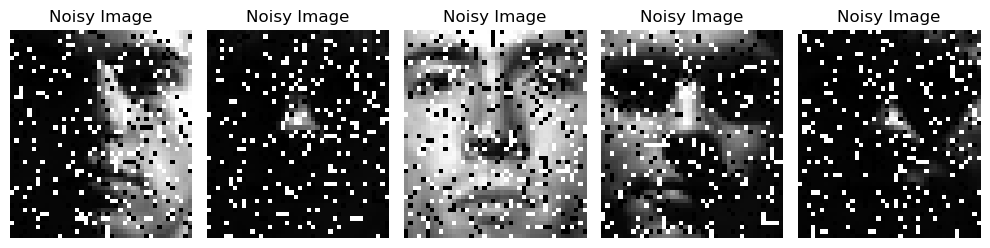

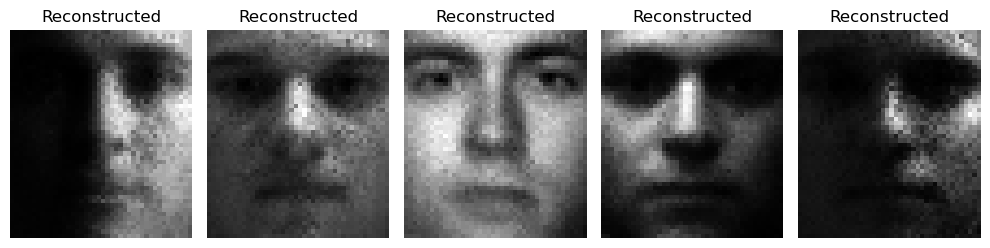

======================================== Noise: gaussian_01 ========================================


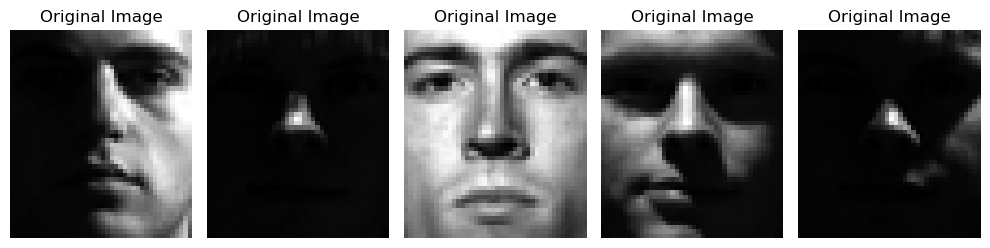

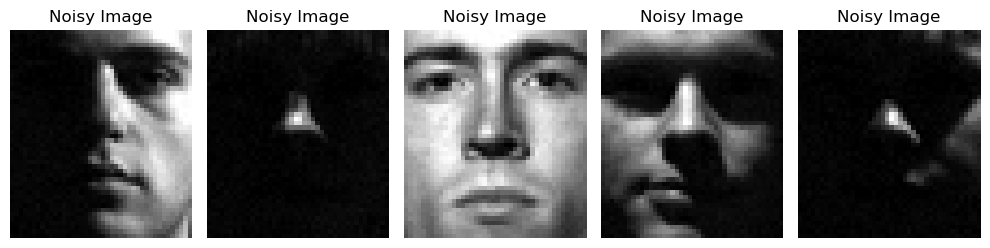

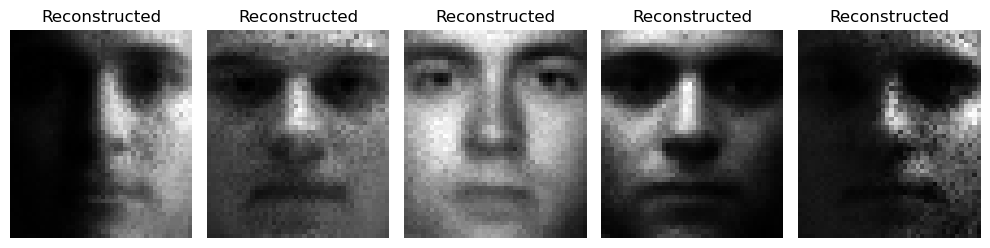

======================================== Noise: gaussian_05 ========================================


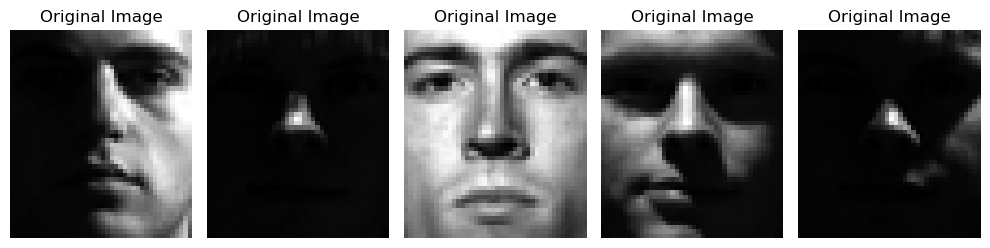

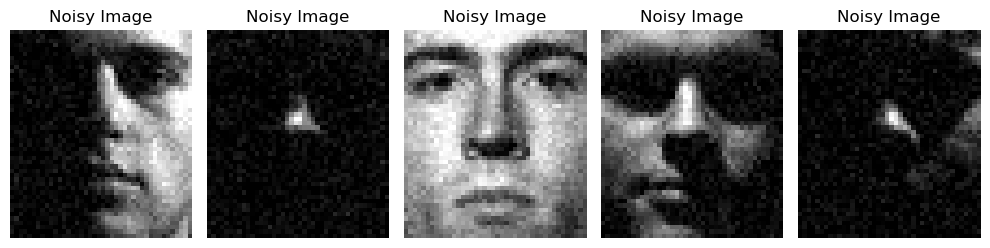

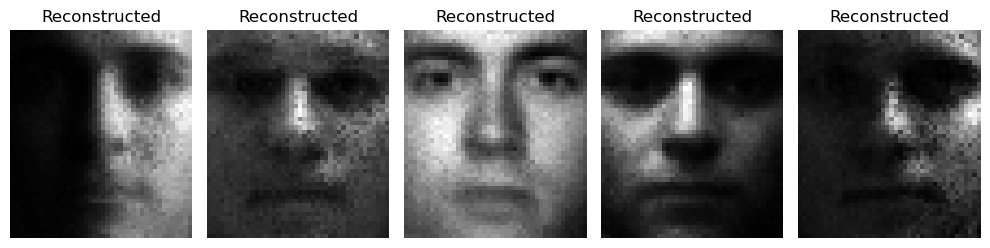

======================================== Noise: gaussian_10 ========================================


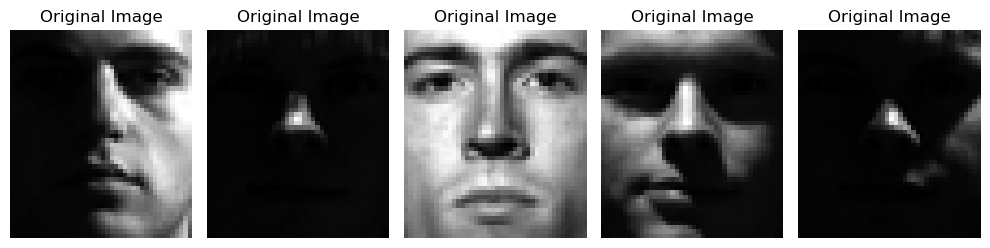

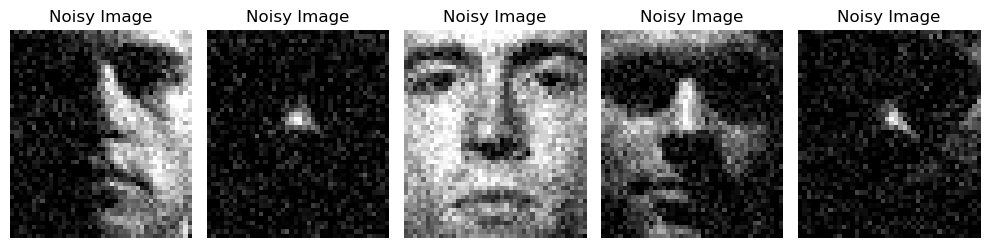

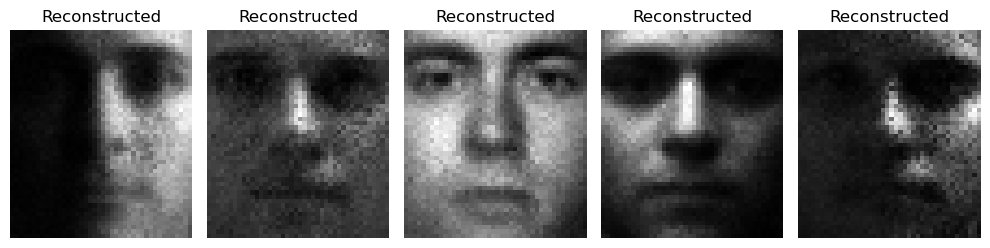

In [10]:
# Create an empty dictionary to store result
EY_huber_result_dict = dict()

for i in range(3):
    # Only display the reconstruction images for the 3rd training smaple to reduce cltter
    display = True if i == 2 else False
    EY_huber_result_dict['Result_huber_no_noise_{}'.format(i)] = NMF_and_result(nmf="huber", img_shape = img_shape, noise=None, 
                                                                                noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                                max_iter=max_iteration, tol=tolerance, display = display)

    # block noise
    EY_huber_result_dict['Result_huber_block_04_{}'.format(i)] = NMF_and_result(nmf="huber", img_shape = img_shape, noise="block_04", 
                                                                                noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                                max_iter=max_iteration, tol=tolerance, display = display)
    EY_huber_result_dict['Result_huber_block_08_{}'.format(i)] = NMF_and_result(nmf="huber", img_shape = img_shape, noise="block_08", 
                                                                                noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                                max_iter=max_iteration, tol=tolerance, display = display)
    EY_huber_result_dict['Result_huber_block_12_{}'.format(i)] = NMF_and_result(nmf="huber", img_shape = img_shape, noise="block_12", 
                                                                                noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                                max_iter=max_iteration, tol=tolerance, display = display)

    # saltpepper noise
    EY_huber_result_dict['Result_huber_saltpepper_5_{}'.format(i)] = NMF_and_result(nmf="huber", img_shape = img_shape, noise="saltpepper_5",
                                                                                     noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                                     max_iter=max_iteration, tol=tolerance, display = display)
    EY_huber_result_dict['Result_huber_saltpepper_10_{}'.format(i)] = NMF_and_result(nmf="huber", img_shape = img_shape, noise="saltpepper_10", 
                                                                                     noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                                     max_iter=max_iteration, tol=tolerance, display = display)
    EY_huber_result_dict['Result_huber_saltpepper_20_{}'.format(i)] = NMF_and_result(nmf="huber", img_shape = img_shape, noise="saltpepper_20", 
                                                                                     noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                                     max_iter=max_iteration, tol=tolerance, display = display)

    # gaussian noise
    EY_huber_result_dict['Result_huber_gaussian_01_{}'.format(i)] = NMF_and_result(nmf="huber", img_shape = img_shape, noise="gaussian_01", 
                                                                                   noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                                   max_iter=max_iteration, tol=tolerance, display = display)
    EY_huber_result_dict['Result_huber_gaussian_05_{}'.format(i)] = NMF_and_result(nmf="huber", img_shape = img_shape, noise="gaussian_05", 
                                                                                   noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                                   max_iter=max_iteration, tol=tolerance, display = display)
    EY_huber_result_dict['Result_huber_gaussian_10_{}'.format(i)] = NMF_and_result(nmf="huber", img_shape = img_shape, noise="gaussian_10", 
                                                                                   noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                                   max_iter=max_iteration, tol=tolerance, display = display)

### Experiment Result for Extended YaleB dataset

### Evaluation Metrics
#### Root Means Square Errors (RMSE) and visualizations
To compare the robustness of different NMF algorithms, you can use the Root Means Square Errors. Let $X$ denote the contaminated dataset (by adding noise), and  $\hat X$  denote the clean dataset. Let  $R$ and  $D$ denote the factorization results on $𝑉$, Root Means Square Errors then can be defined as follows:
$RMSE= ||\hat X - RD||_F$

#### Evaluate Clustering Performance
1. Accuracy

    $Acc(Y, Y_{pred}) = \frac{1}{n}\sum_{i=1}^n 1\{Y_{pred(i)} == Y(i)\}$
2. Normalized Mutual Information (NMI).

    $NMI(Y, Y_{pred}) = \frac{2*I(Y, Y_{pred})}{H(Y) + H(Y_{pred})}$
   
  Where $I(.,.)$ is mutual information and  $𝐻(⋅)$ is entropy.

In [11]:
# Group all result for YaleB dataset
allresultmap = [EY_L1_result_dict, EY_L2_result_dict, EY_CIM_result_dict, EY_huber_result_dict]

# Compute the result
compute_result(allresultmap, Y_hat_list)

Evaluate metrics of Extended YaleB:
| Algorithm   | Noise         |   RMSE-mean |    RMSE-std |   Accuracy-mean |   Accuracy-std |   NMI-mean |     NMI-std |
|-------------|---------------|-------------|-------------|-----------------|----------------|------------|-------------|
| L1-NMF      | No noise      |   0.0661375 | 0.000225412 |       0.217465  |    0.00709615  |  0.283633  | 0.00905528  |
|             | Block_04      |   0.362926  | 0.000908897 |       0.045887  |    0.000574226 |  0.0342991 | 0.000997492 |
|             | Block_08      |   0.363289  | 0.000906297 |       0.0452732 |    0.000217037 |  0.0331193 | 0.000196645 |
|             | Block_12      |   0.363928  | 0.000928055 |       0.0455801 |    0.000375919 |  0.0341804 | 0.000615685 |
|             | Saltpepper_5  |   0.074102  | 0.000309016 |       0.197821  |    0.00532073  |  0.266916  | 0.00866663  |
|             | Saltpepper_10 |   0.0860104 | 0.000166225 |       0.186004  |    0.0114455   |  0.253171  | 0.

### Testing the NMF algorithm on the ORL dataset

In [4]:
# Load dataset.
print('==> Load ORL dataset ...')
X_hat, Y_hat, img_shape = load_data('data/ORL', reduce=3)
print('X_hat.shape={}, Y_hat.shape={}, Image shape ={}'.format(X_hat.shape, Y_hat.shape, img_shape))

==> Load ORL dataset ...
X_hat.shape=(1110, 400), Y_hat.shape=(400,), Image shape =(37, 30)


In [5]:
# Randomly sample 90% of data 3 times for rigourous performance evaluation
X_hat_list, Y_hat_list = get_training_list(X_hat, Y_hat, cv = 3)

# Add noise to images
X_hat_noisy_maplist = generate_test_image(X_hat_list, img_shape)

In [6]:
# Configuration of the experiment set
n_component = 100
max_iteration = 100
tolerance = 1e-5

#### Testing L1-NMF on the ORL dataset

======================================== No noise ========================================


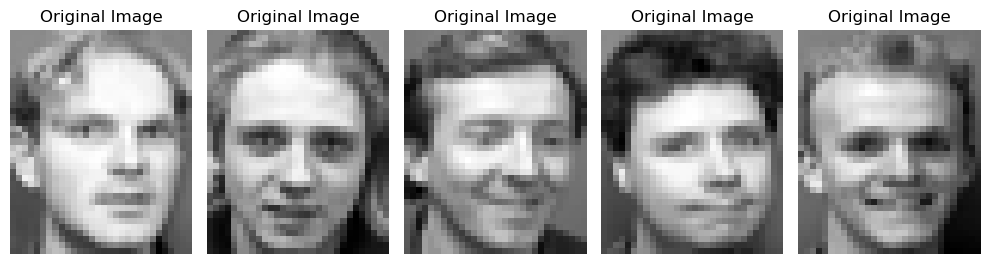

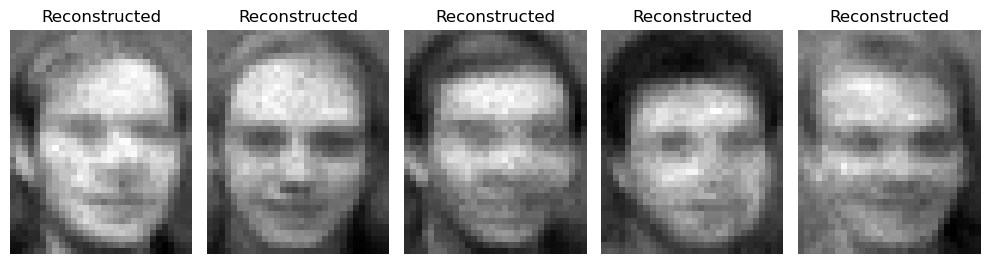

======================================== Noise: block_04 ========================================


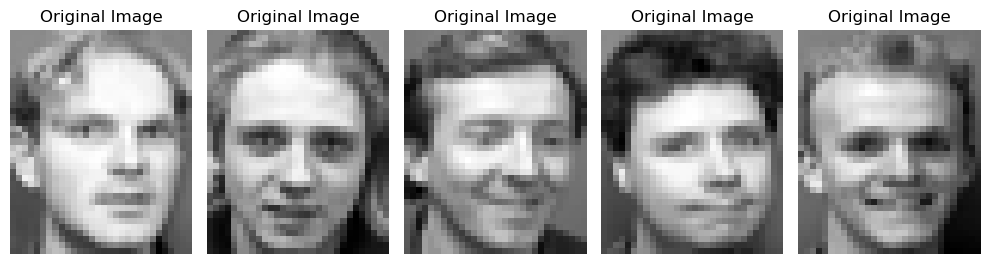

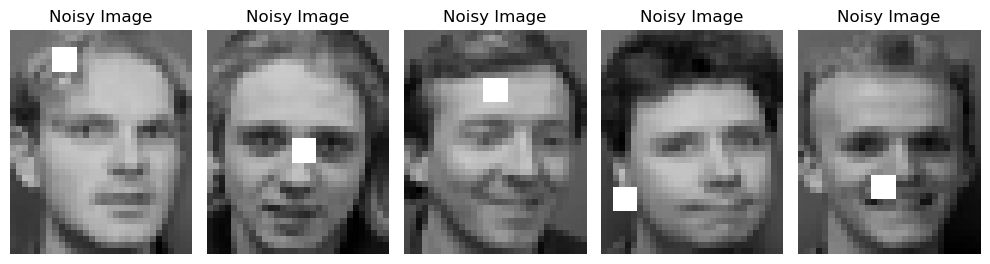

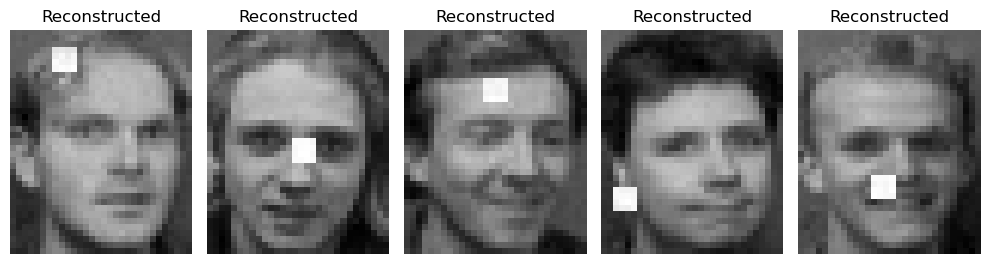

======================================== Noise: block_08 ========================================


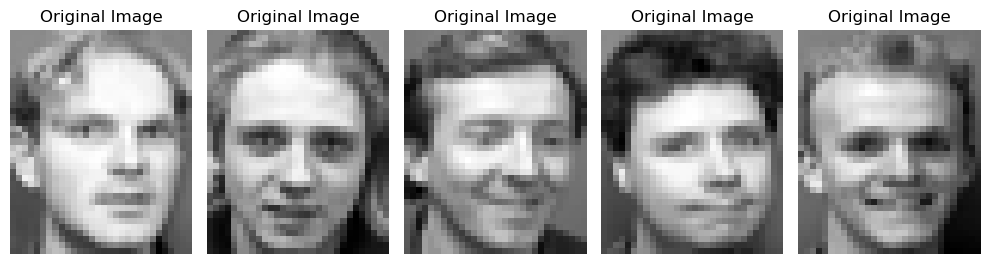

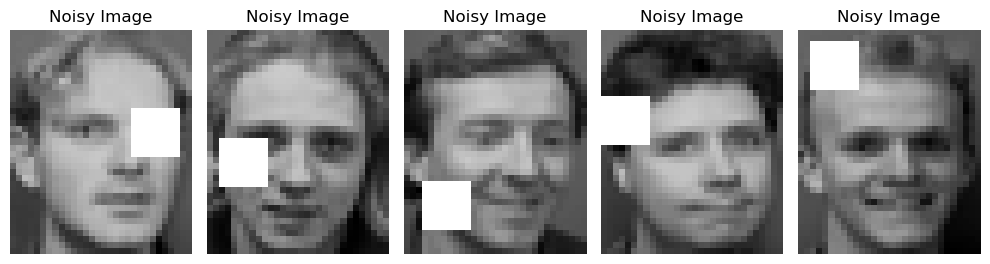

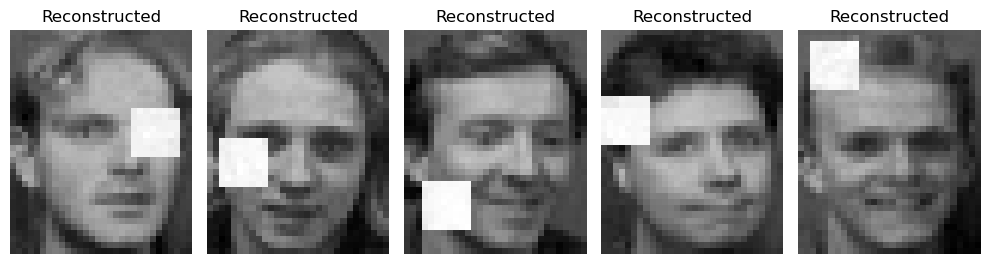

======================================== Noise: block_12 ========================================


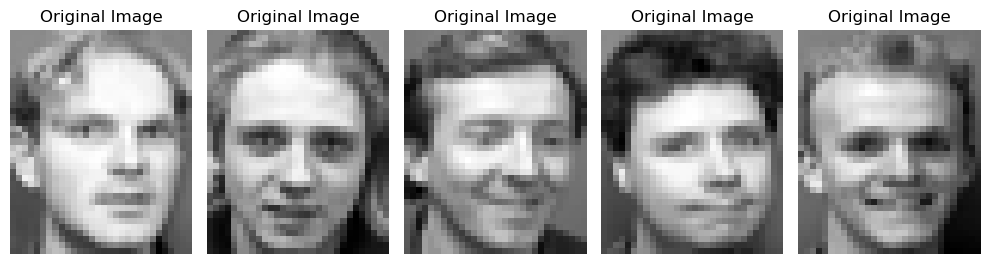

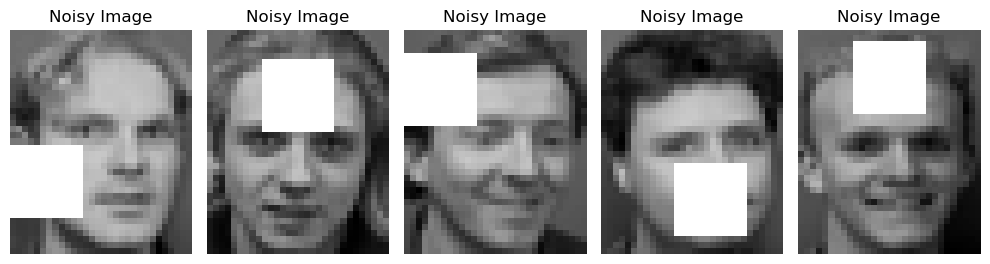

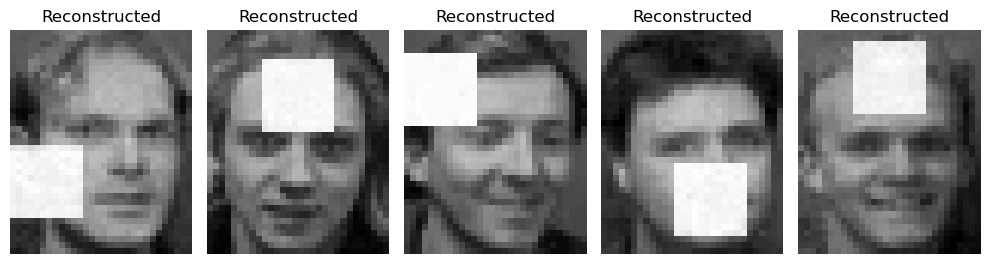

======================================== Noise: saltpepper_5 ========================================


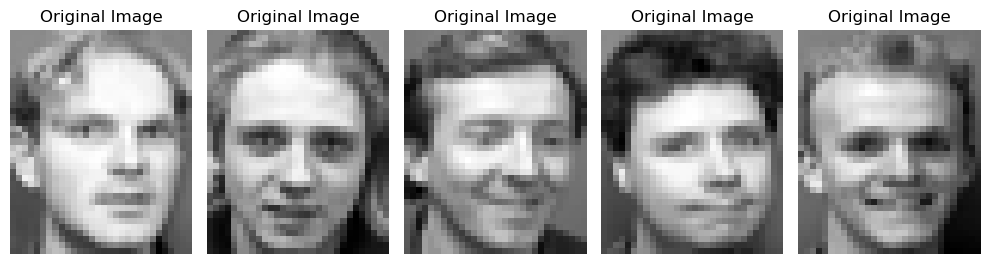

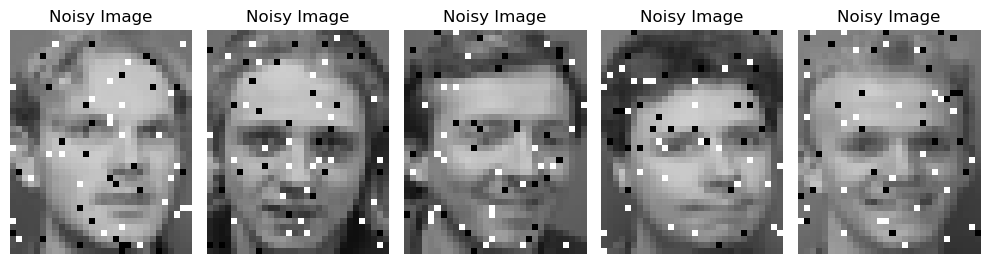

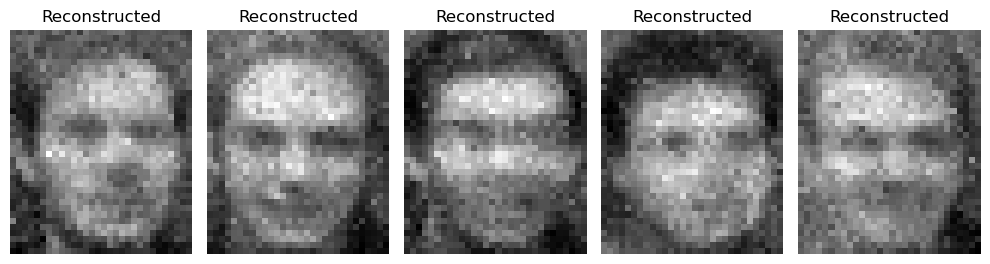

======================================== Noise: saltpepper_10 ========================================


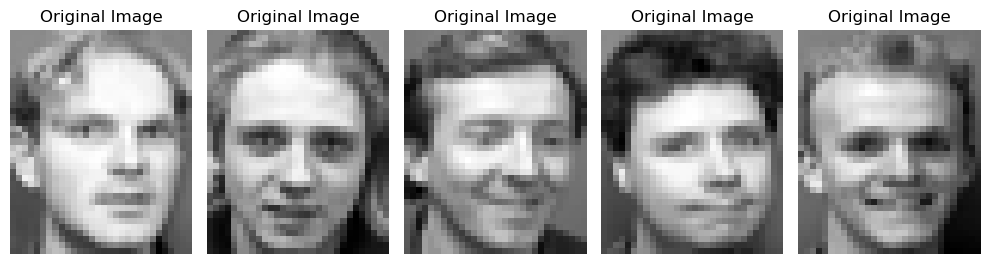

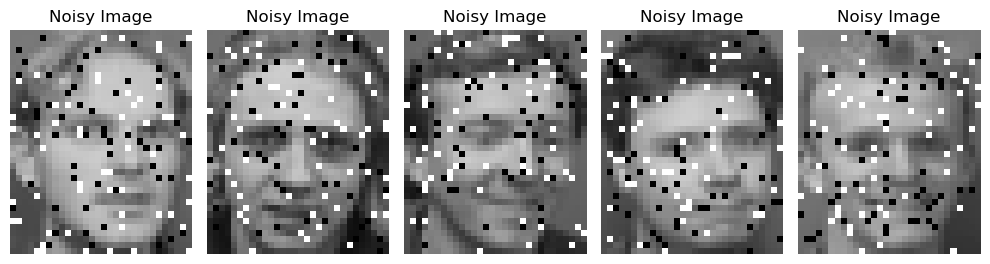

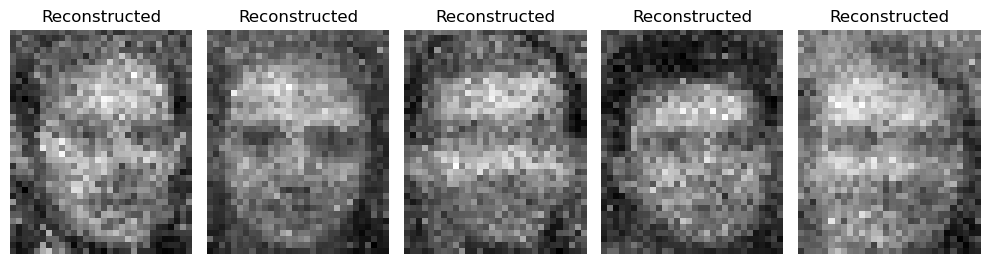

======================================== Noise: saltpepper_20 ========================================


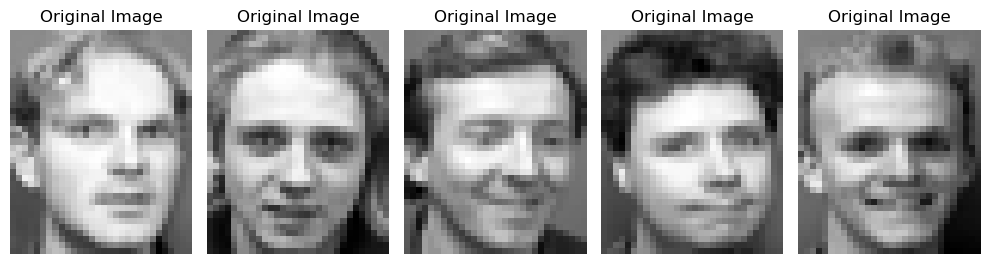

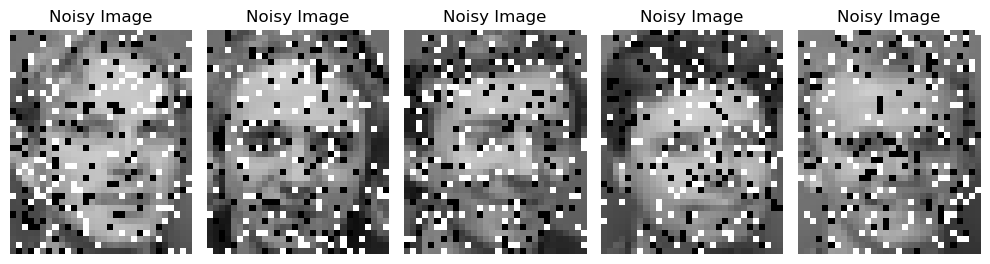

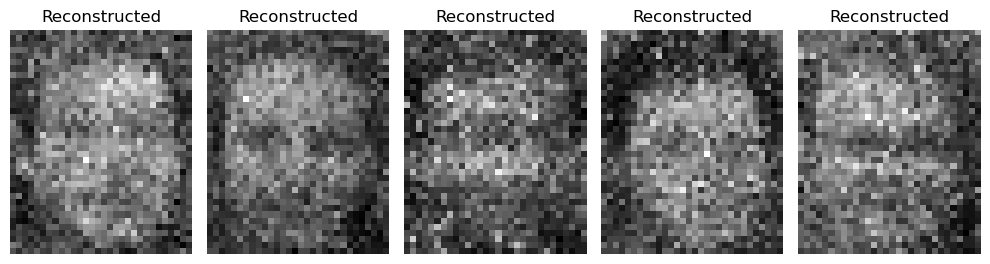

======================================== Noise: gaussian_01 ========================================


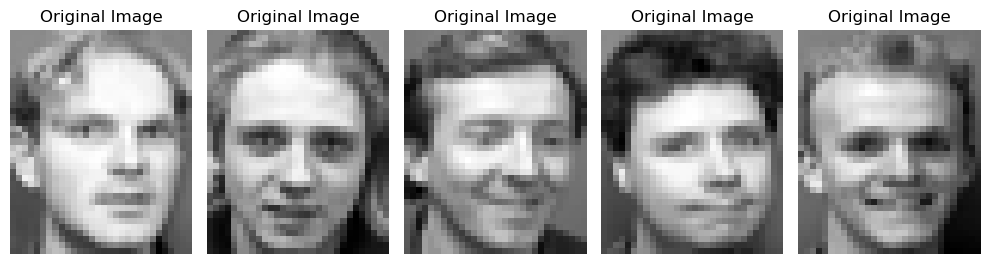

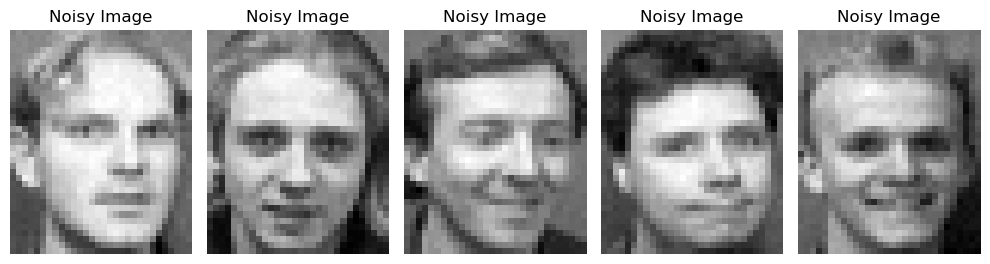

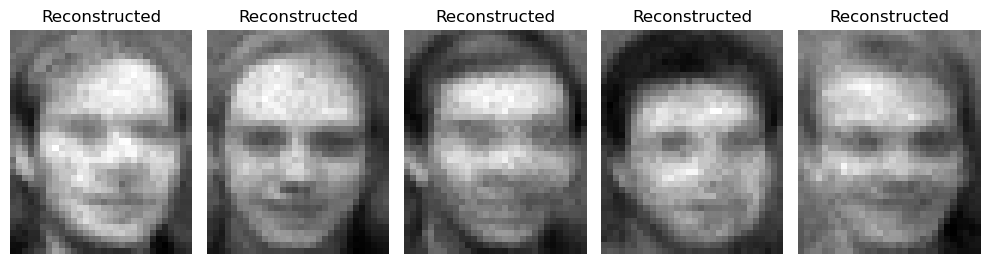

======================================== Noise: gaussian_05 ========================================


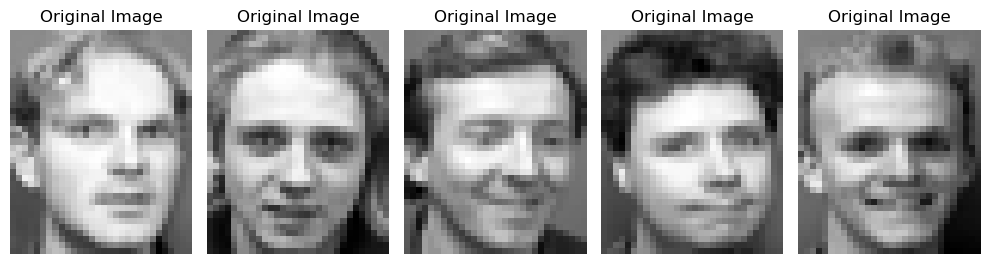

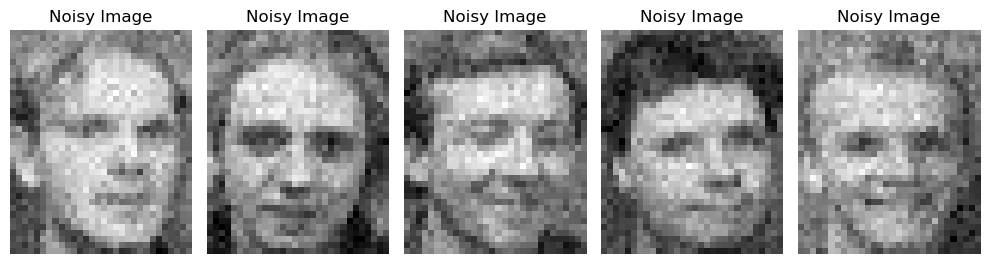

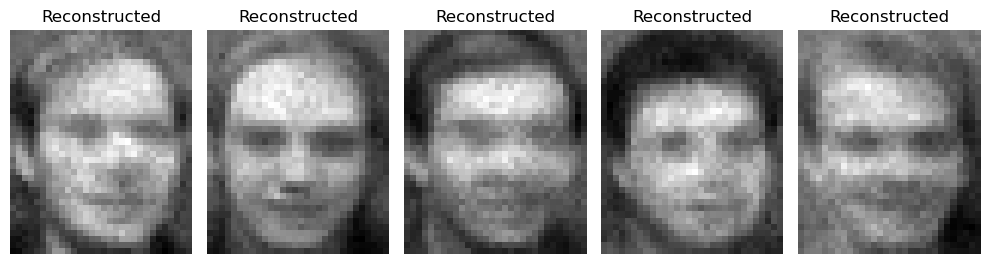

======================================== Noise: gaussian_10 ========================================


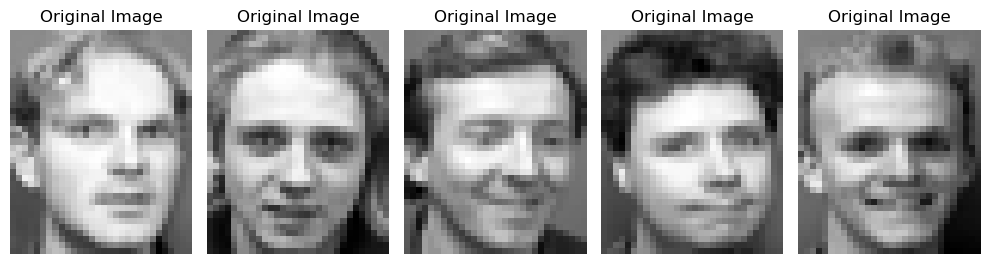

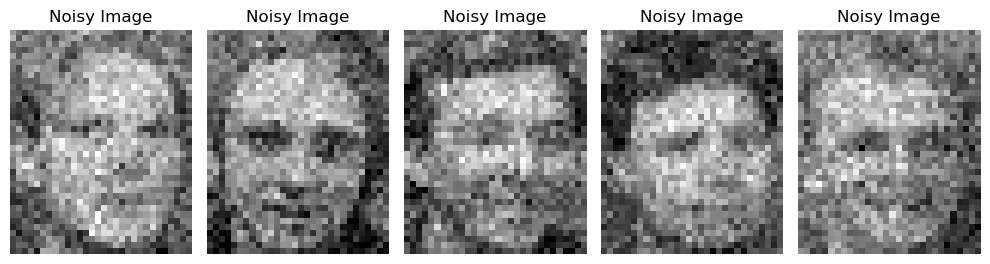

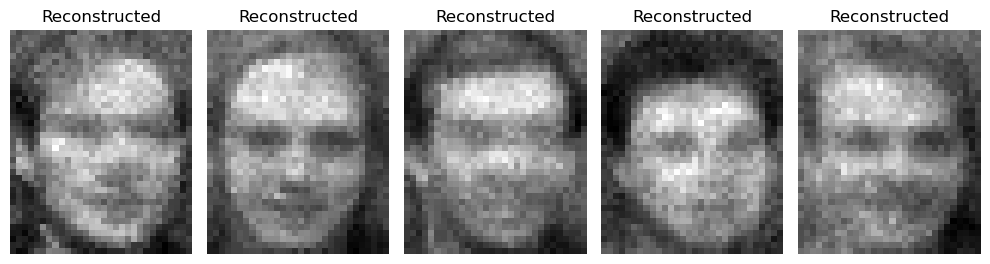

In [7]:
ORL_L1_result_dict = dict()
for i in range(3):
    # Only display the reconstruction images for the 3rd training smaple to reduce cltter
    display = True if i == 2 else False

    ORL_L1_result_dict['Result_l1_no_noise_{}'.format(i)] = NMF_and_result(nmf="l1", img_shape = img_shape, noise=None, 
                                                                           noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                           max_iter=max_iteration, tol=tolerance, display = display)

    # block noise
    ORL_L1_result_dict['Result_l1_block_04_{}'.format(i)] = NMF_and_result(nmf="l1", img_shape = img_shape, noise="block_04", 
                                                                           noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                           max_iter=max_iteration, tol=tolerance, display = display)
    ORL_L1_result_dict['Result_l1_block_08_{}'.format(i)] = NMF_and_result(nmf="l1", img_shape = img_shape, noise="block_08", 
                                                                           noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                           max_iter=max_iteration, tol=tolerance, display = display)
    ORL_L1_result_dict['Result_l1_block_12_{}'.format(i)] = NMF_and_result(nmf="l1", img_shape = img_shape, noise="block_12", 
                                                                           noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                           max_iter=max_iteration, tol=tolerance, display = display)

    # saltpepper noise
    ORL_L1_result_dict['Result_l1_saltpepper_5_{}'.format(i)] = NMF_and_result(nmf="l1", img_shape = img_shape, noise="saltpepper_5", 
                                                                               noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                               max_iter=max_iteration, tol=tolerance, display = display)
    ORL_L1_result_dict['Result_l1_saltpepper_10_{}'.format(i)] = NMF_and_result(nmf="l1", img_shape = img_shape, noise="saltpepper_10", 
                                                                                noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                                max_iter=max_iteration, tol=tolerance, display = display)
    ORL_L1_result_dict['Result_l1_saltpepper_20_{}'.format(i)] = NMF_and_result(nmf="l1", img_shape = img_shape, noise="saltpepper_20", 
                                                                                noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                                max_iter=max_iteration, tol=tolerance, display = display)

    # gaussian noise
    ORL_L1_result_dict['Result_l1_gaussian_01_{}'.format(i)] = NMF_and_result(nmf="l1", img_shape = img_shape, noise="gaussian_01", 
                                                                              noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                              max_iter=max_iteration, tol=tolerance, display = display)
    ORL_L1_result_dict['Result_l1_gaussian_05_{}'.format(i)] = NMF_and_result(nmf="l1", img_shape = img_shape, noise="gaussian_05", 
                                                                              noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                              max_iter=max_iteration, tol=tolerance, display = display)
    ORL_L1_result_dict['Result_l1_gaussian_10_{}'.format(i)] = NMF_and_result(nmf="l1", img_shape = img_shape, noise="gaussian_10", 
                                                                              noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                              max_iter=max_iteration, tol=tolerance, display = display)
    

#### Testing the L2-NMF on the ORL dataset

======================================== No noise ========================================


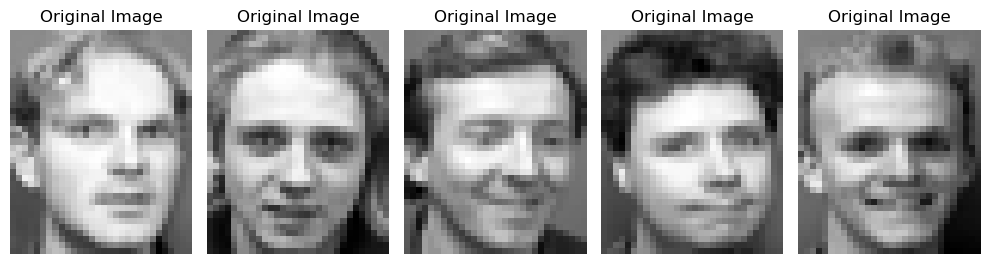

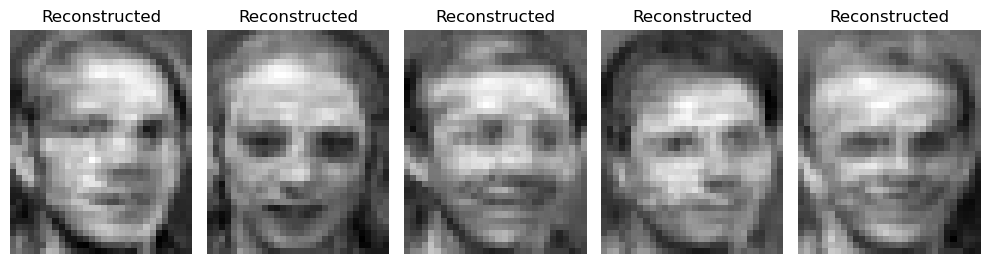

======================================== Noise: block_04 ========================================


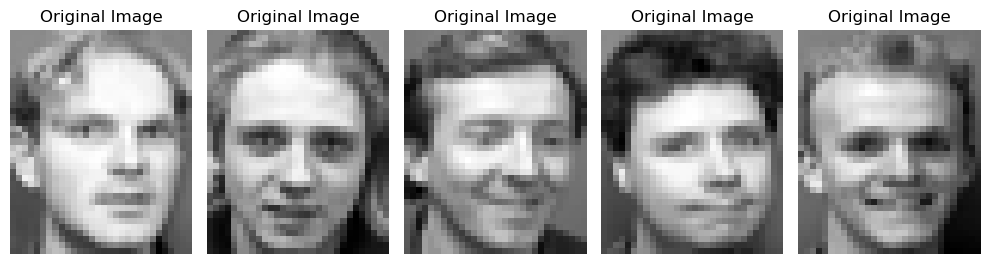

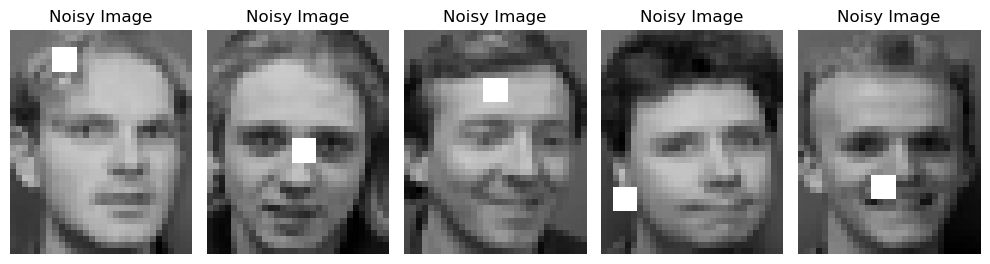

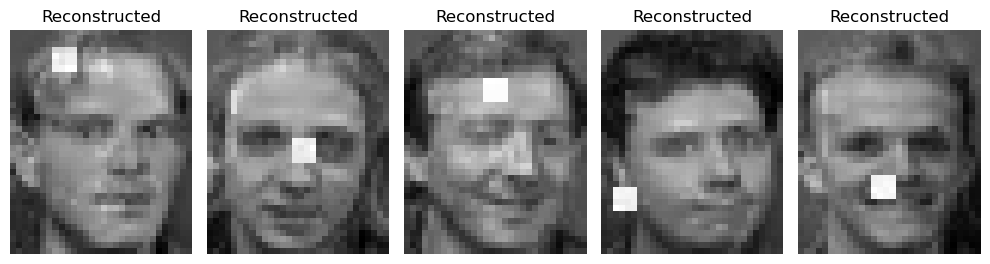

======================================== Noise: block_08 ========================================


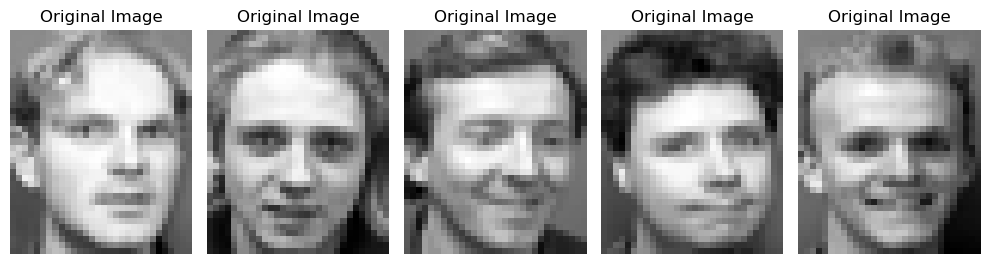

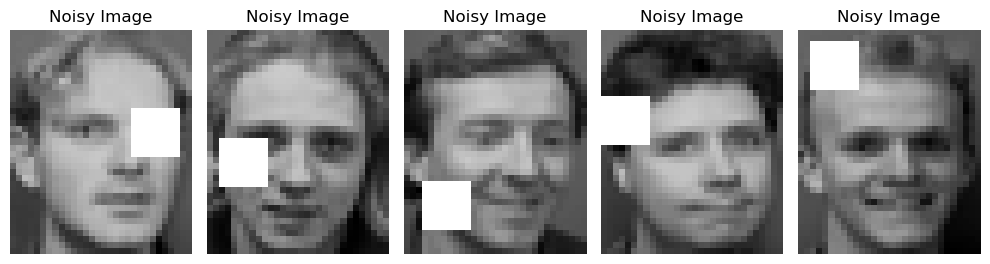

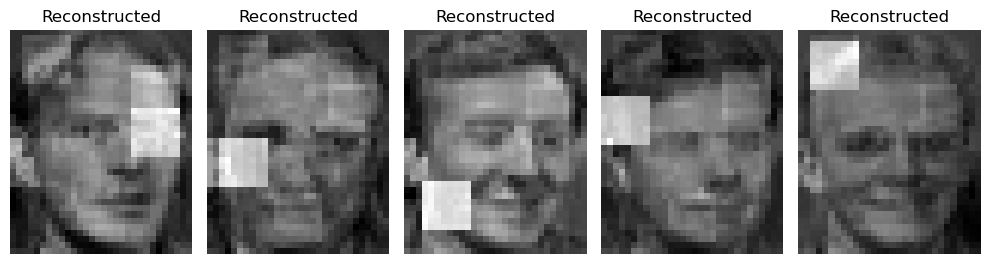

======================================== Noise: block_12 ========================================


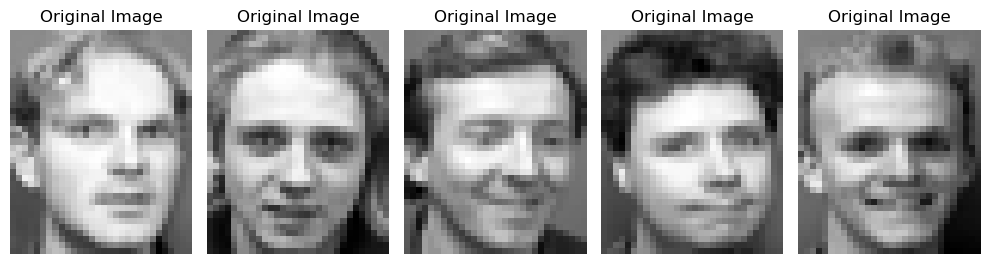

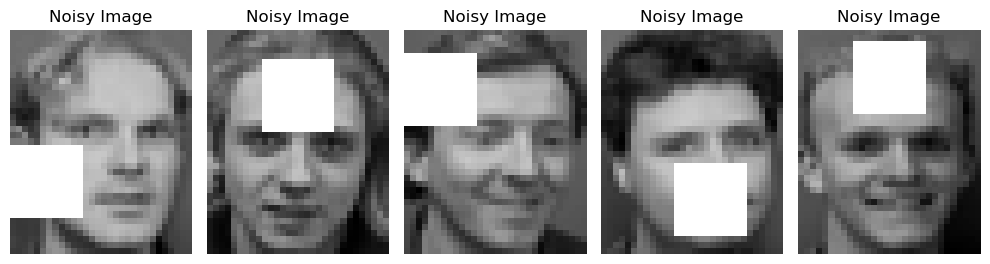

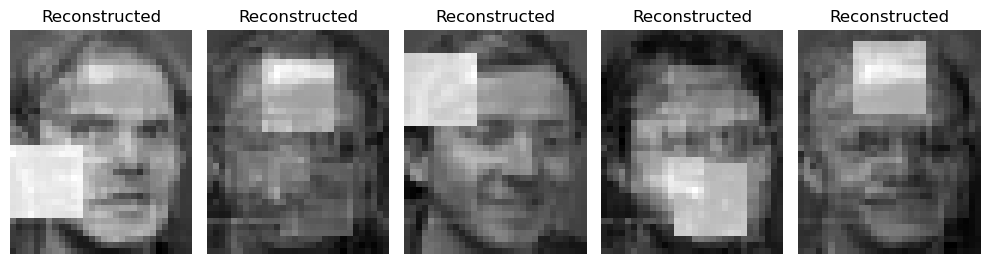

======================================== Noise: saltpepper_5 ========================================


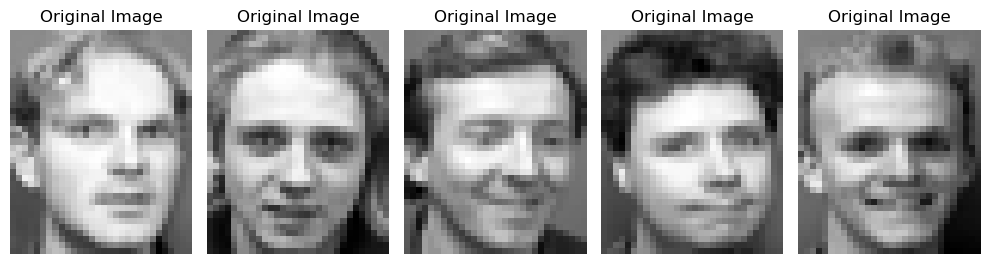

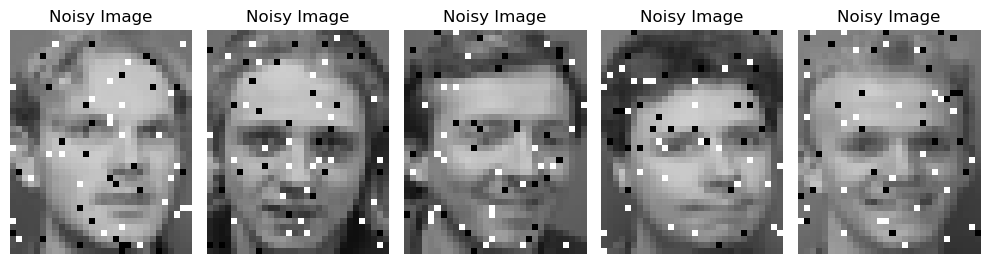

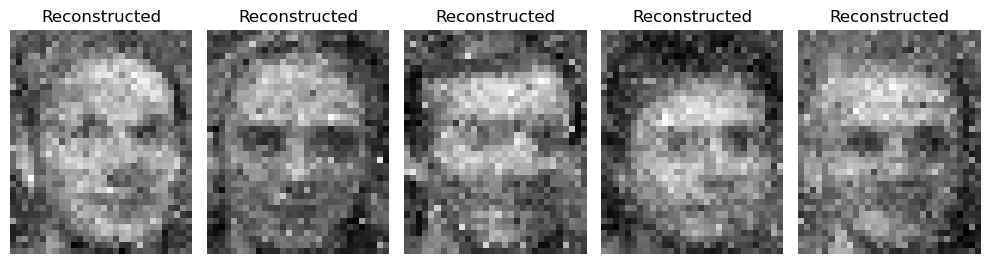

======================================== Noise: saltpepper_10 ========================================


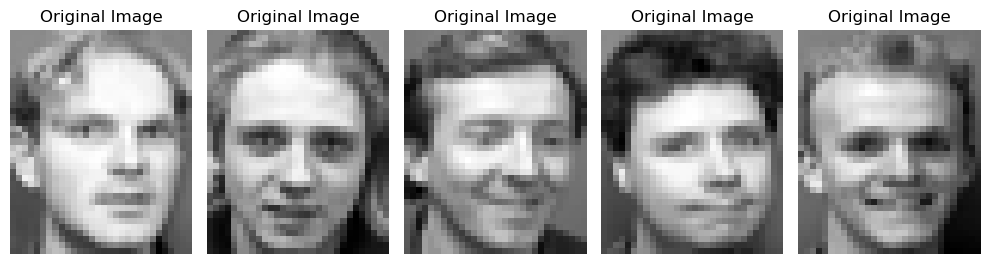

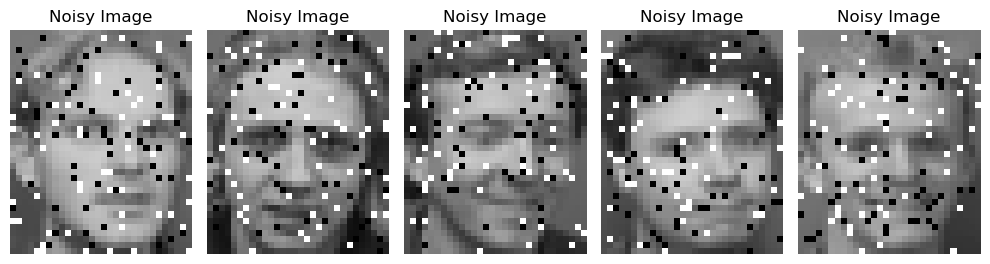

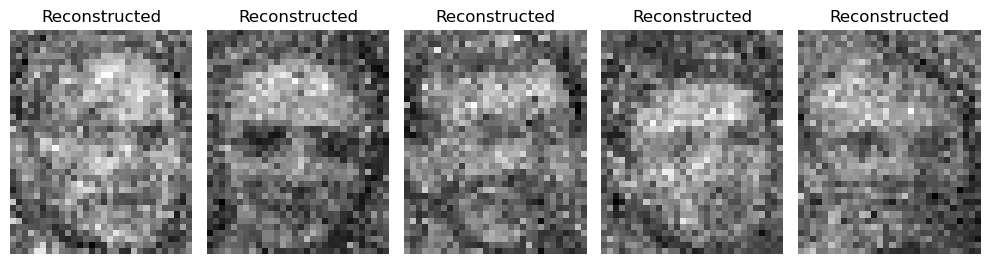

======================================== Noise: saltpepper_20 ========================================


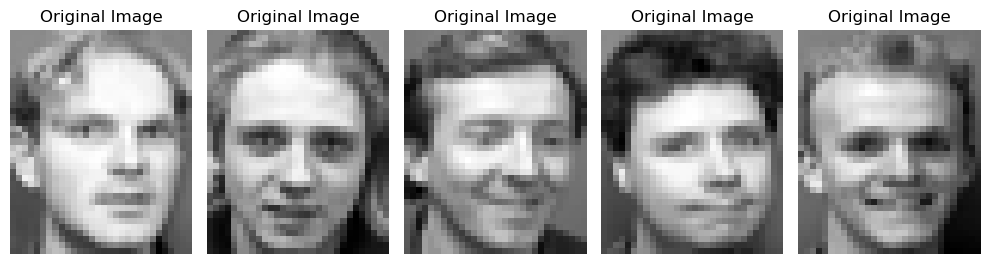

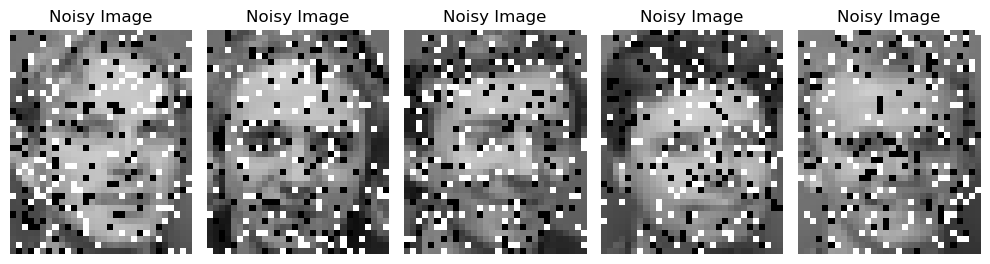

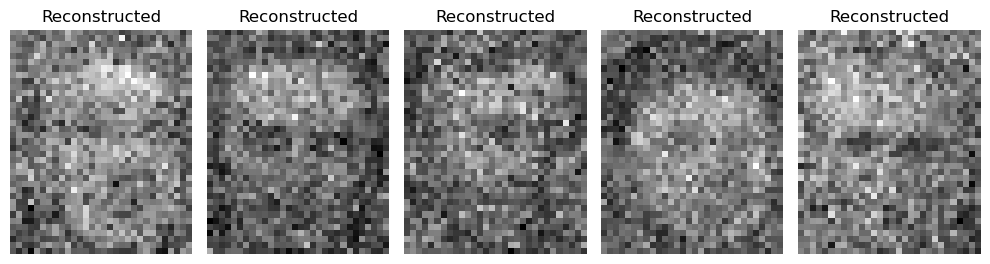

======================================== Noise: gaussian_01 ========================================


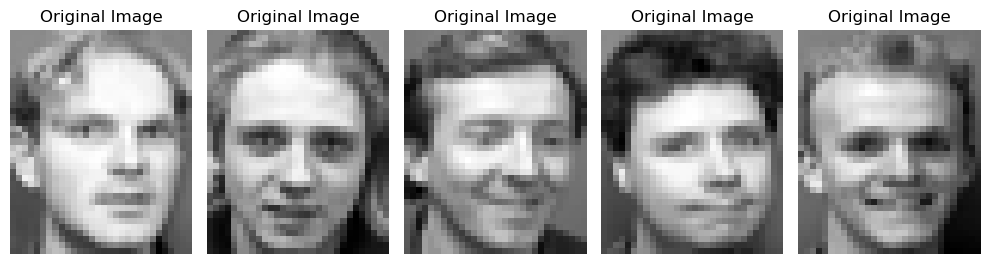

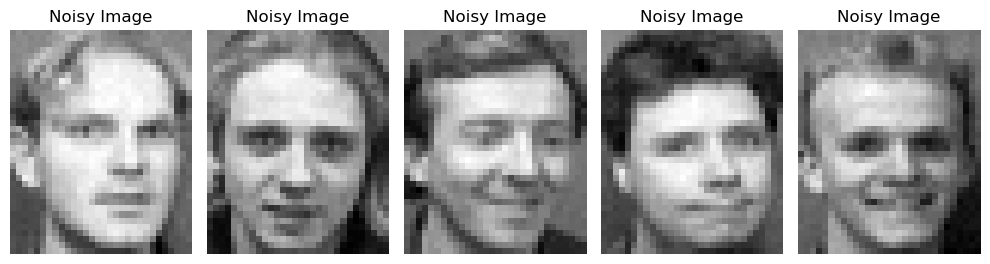

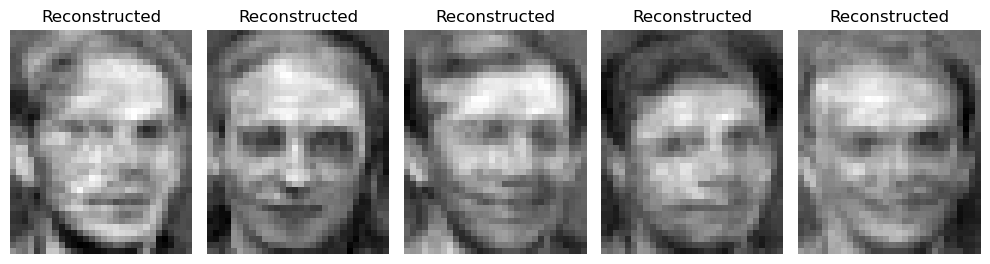

======================================== Noise: gaussian_05 ========================================


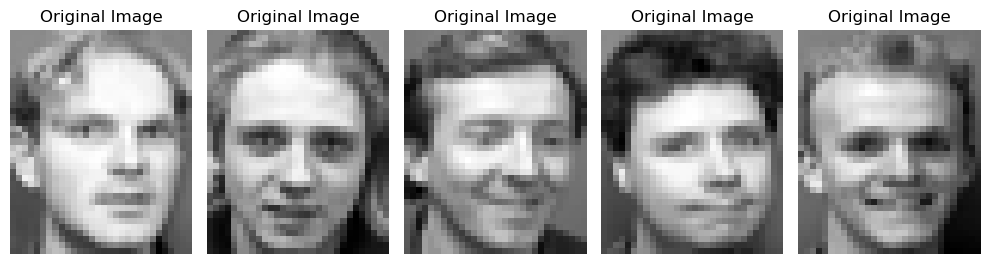

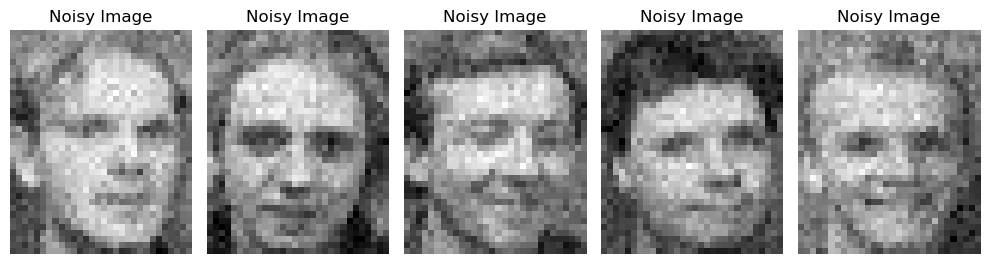

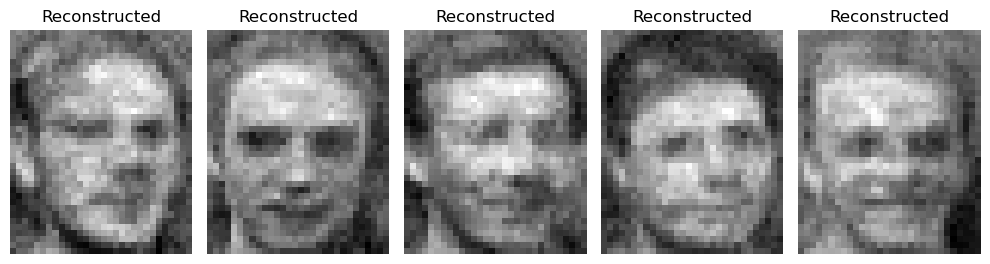

======================================== Noise: gaussian_10 ========================================


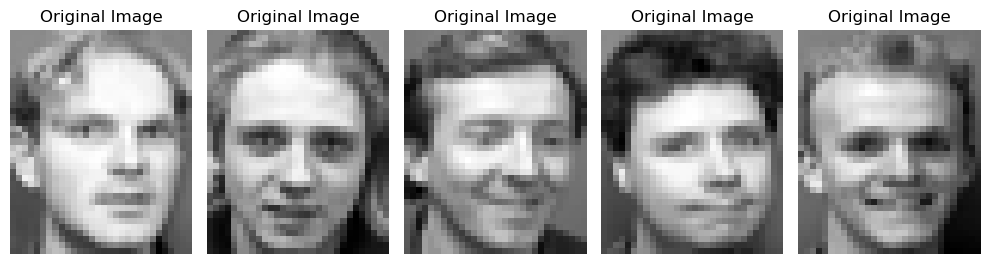

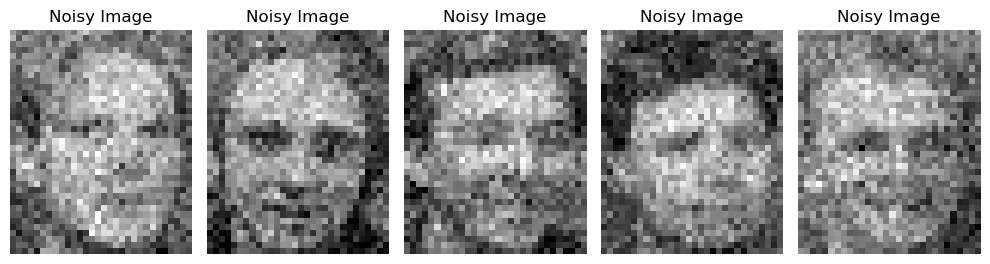

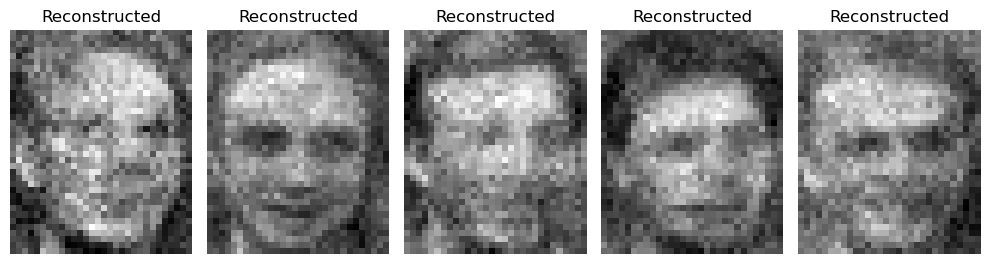

In [8]:
ORL_L2_result_dict = dict()
for i in range(3):
    # Only display the reconstruction images for the 3rd training smaple to reduce cltter
    display = True if i == 2 else False
    
    ORL_L2_result_dict['Result_l2_no_noise_{}'.format(i)] = NMF_and_result(nmf="l2", img_shape = img_shape, noise=None, 
                                                                           noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                           max_iter=max_iteration, tol=tolerance, display = display)

    # block noise
    ORL_L2_result_dict['Result_l2_block_04_{}'.format(i)] = NMF_and_result(nmf="l2", img_shape = img_shape, noise="block_04", 
                                                                           noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                           max_iter=max_iteration, tol=tolerance, display = display)
    ORL_L2_result_dict['Result_l2_block_08_{}'.format(i)] = NMF_and_result(nmf="l2", img_shape = img_shape, noise="block_08", 
                                                                           noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                           max_iter=max_iteration, tol=tolerance, display = display)
    ORL_L2_result_dict['Result_l2_block_12_{}'.format(i)] = NMF_and_result(nmf="l2", img_shape = img_shape, noise="block_12", 
                                                                           noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                           max_iter=max_iteration, tol=tolerance, display = display)

    # saltpepper noise
    ORL_L2_result_dict['Result_l2_saltpepper_5_{}'.format(i)] = NMF_and_result(nmf="l2", img_shape = img_shape, noise="saltpepper_5", 
                                                                               noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                               max_iter=max_iteration, tol=tolerance, display = display)
    ORL_L2_result_dict['Result_l2_saltpepper_10_{}'.format(i)] = NMF_and_result(nmf="l2", img_shape = img_shape, noise="saltpepper_10", 
                                                                                noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                                max_iter=max_iteration, tol=tolerance, display = display)
    ORL_L2_result_dict['Result_l2_saltpepper_20_{}'.format(i)] = NMF_and_result(nmf="l2", img_shape = img_shape, noise="saltpepper_20", 
                                                                                noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                                max_iter=max_iteration, tol=tolerance, display = display)

    # gaussian noise
    ORL_L2_result_dict['Result_l2_gaussian_01_{}'.format(i)] = NMF_and_result(nmf="l2", img_shape = img_shape, noise="gaussian_01", 
                                                                              noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                              max_iter=max_iteration, tol=tolerance, display = display)
    ORL_L2_result_dict['Result_l2_gaussian_05_{}'.format(i)] = NMF_and_result(nmf="l2", img_shape = img_shape, noise="gaussian_05", 
                                                                              noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                              max_iter=max_iteration, tol=tolerance, display = display)
    ORL_L2_result_dict['Result_l2_gaussian_10_{}'.format(i)] = NMF_and_result(nmf="l2", img_shape = img_shape, noise="gaussian_10", 
                                                                              noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                              max_iter=max_iteration, tol=tolerance, display = display)

#### Testing CIM-NMF on the ORL dataset

======================================== No noise ========================================


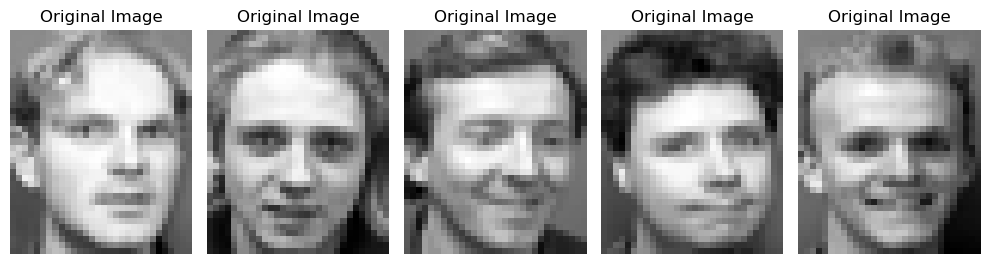

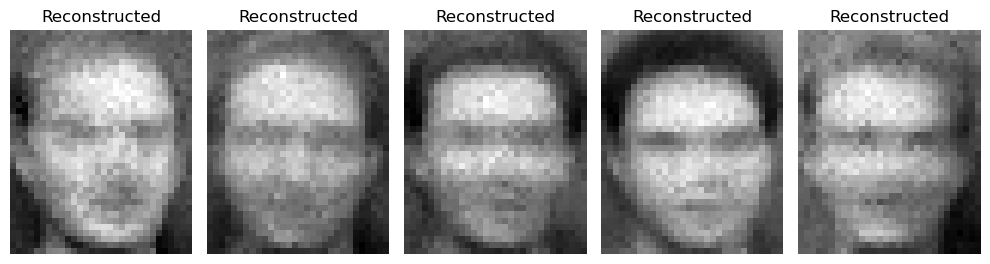

======================================== Noise: block_04 ========================================


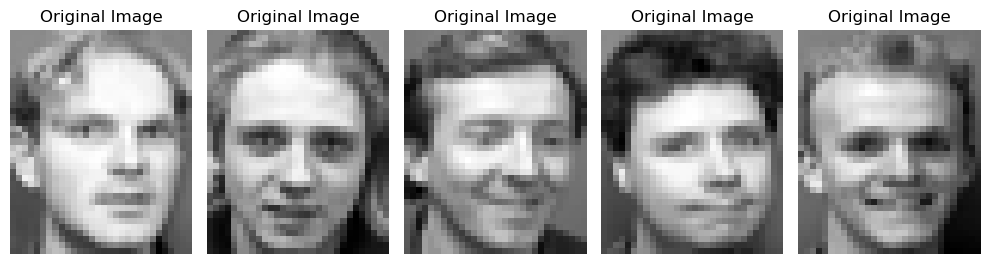

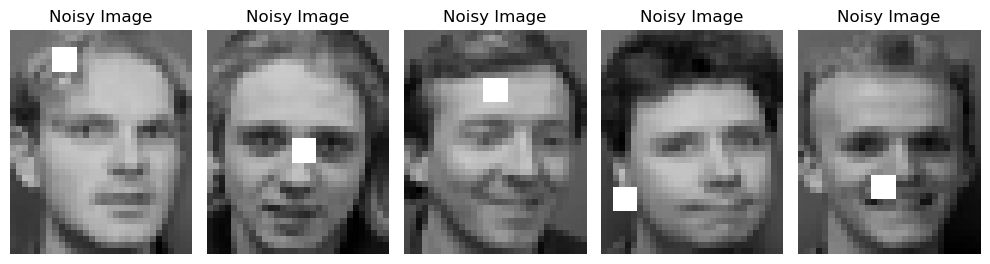

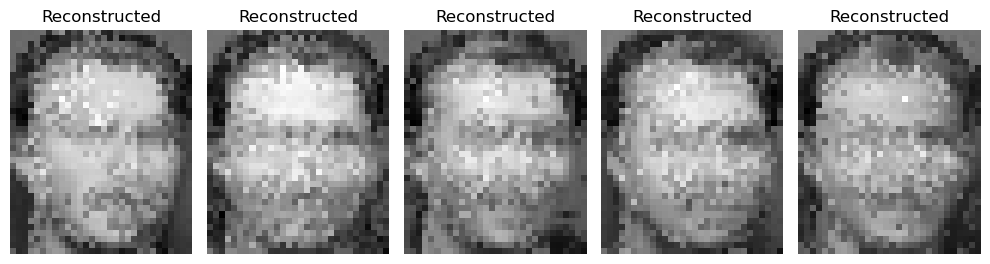

======================================== Noise: block_08 ========================================


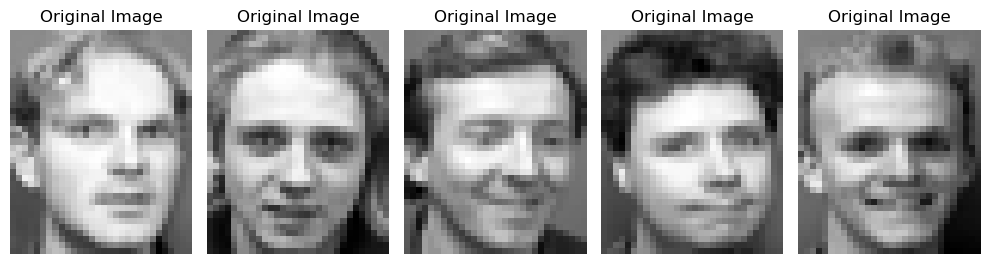

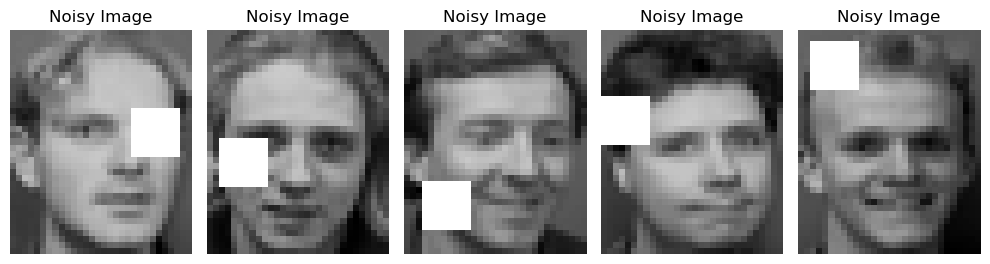

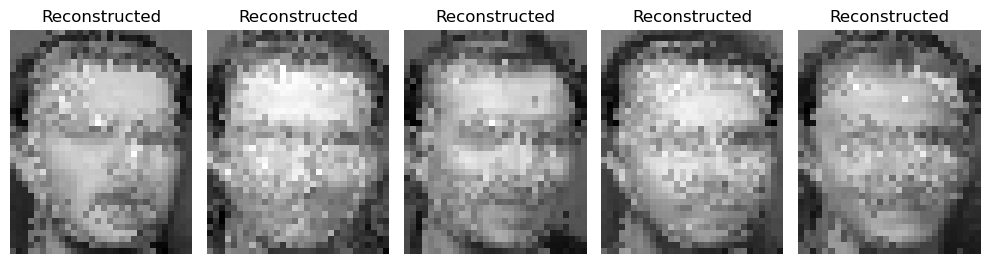

======================================== Noise: block_12 ========================================


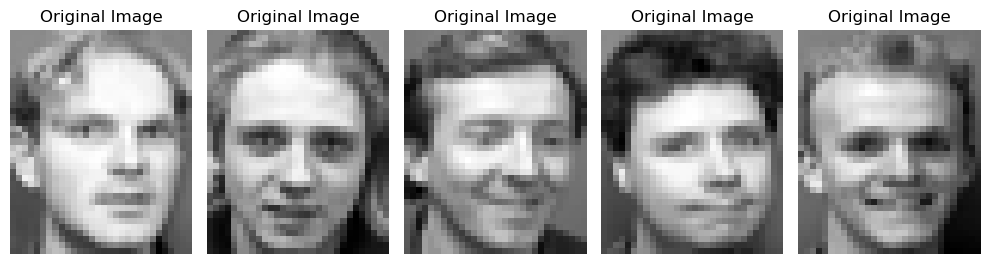

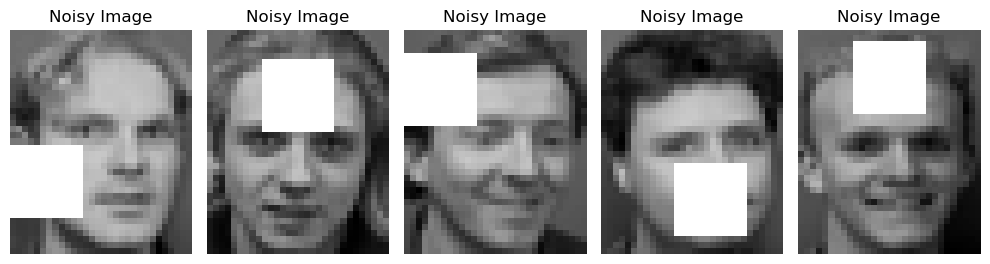

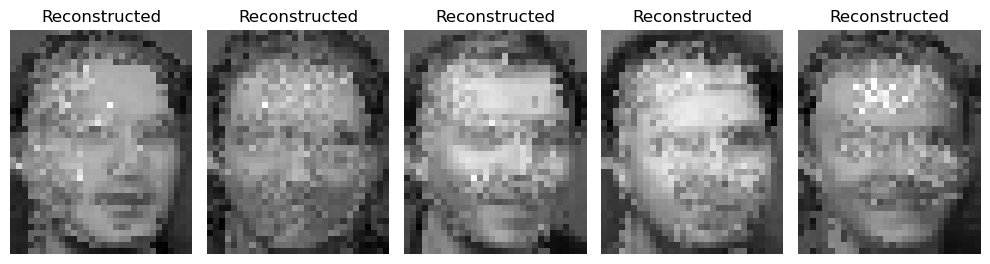

======================================== Noise: saltpepper_5 ========================================


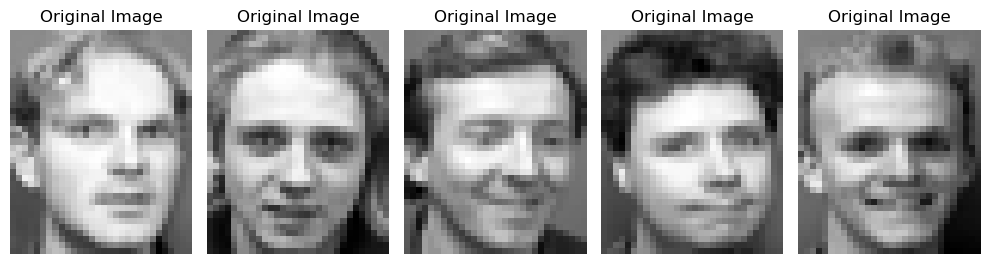

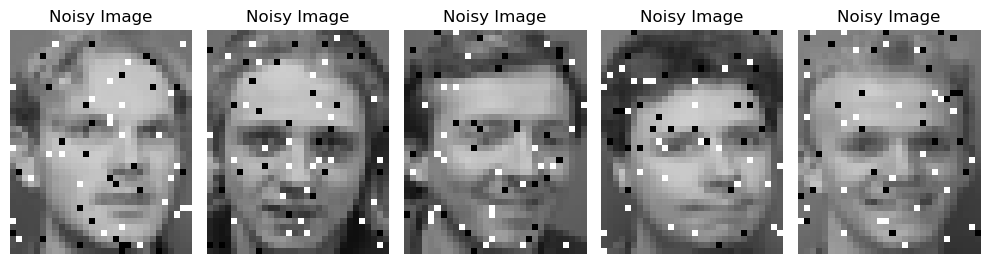

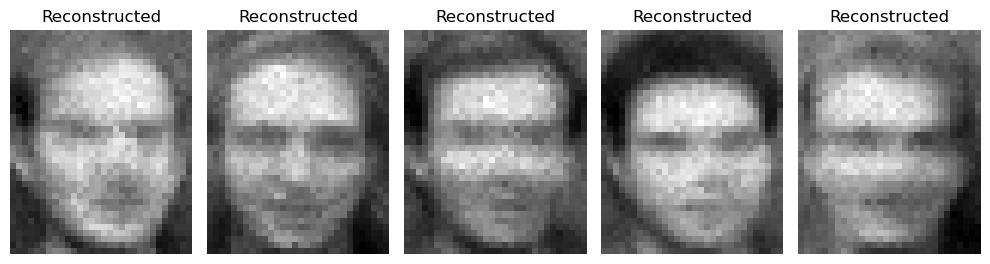

======================================== Noise: saltpepper_10 ========================================


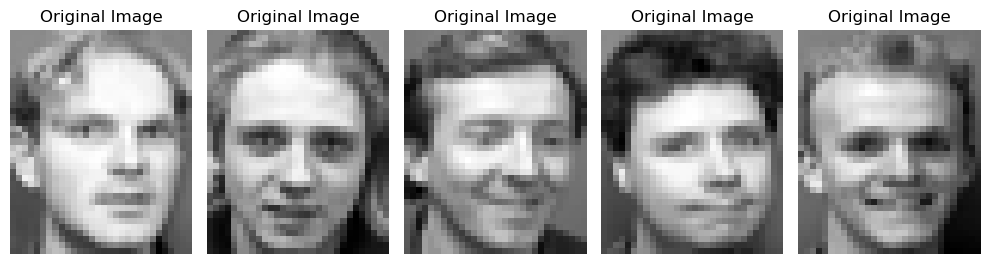

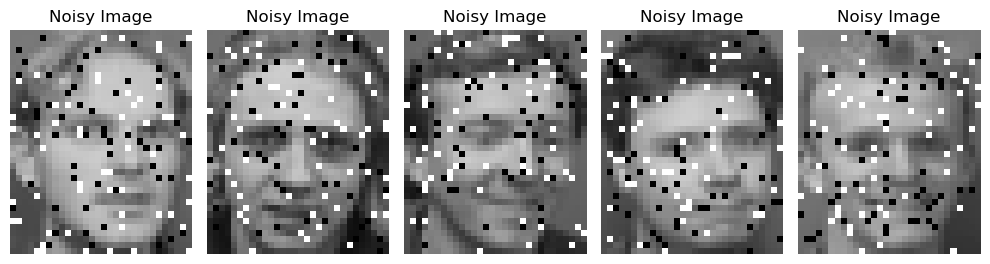

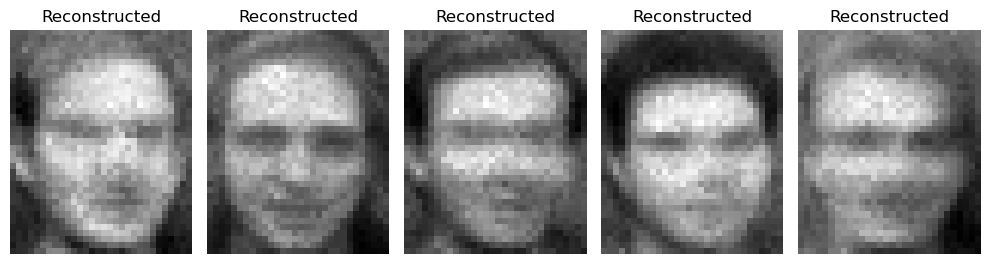

======================================== Noise: saltpepper_20 ========================================


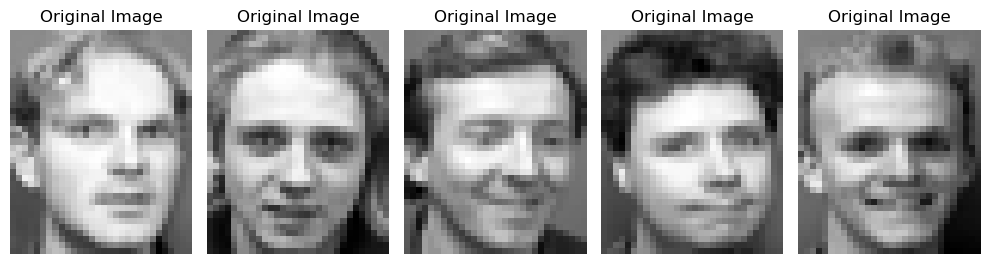

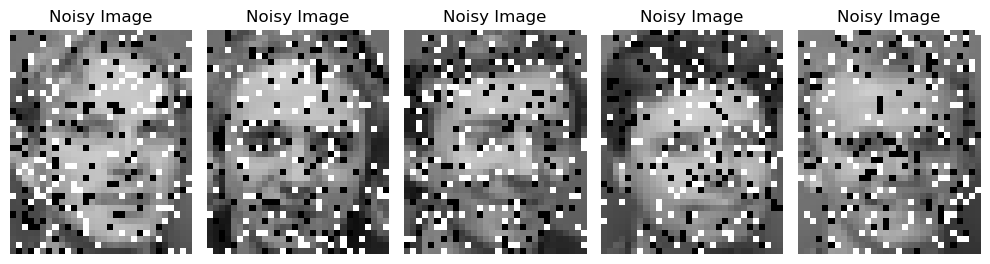

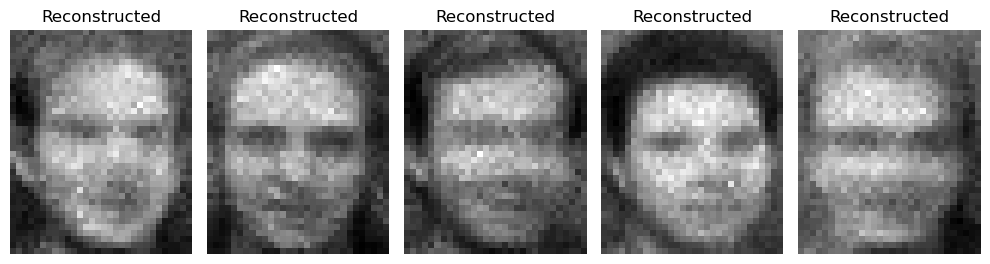

======================================== Noise: gaussian_01 ========================================


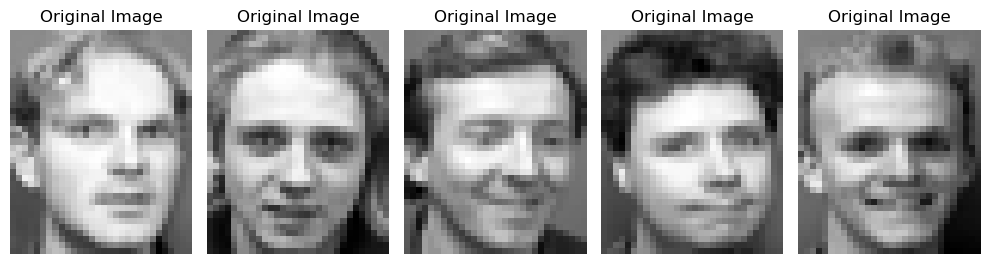

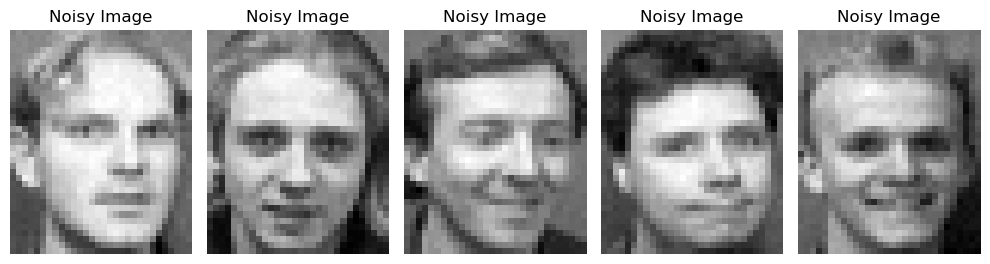

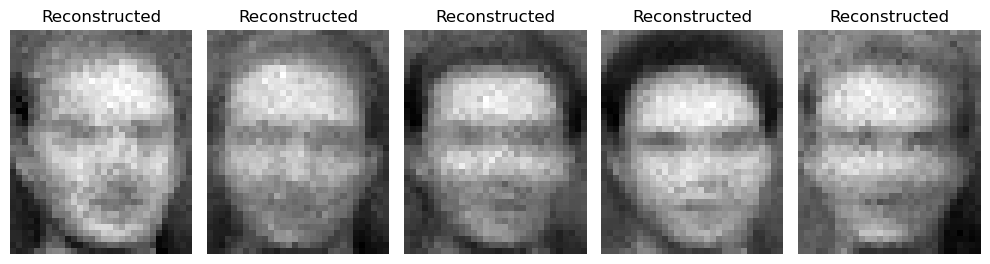

======================================== Noise: gaussian_05 ========================================


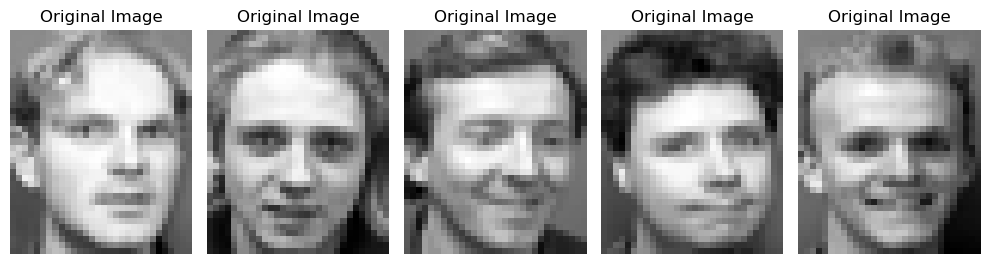

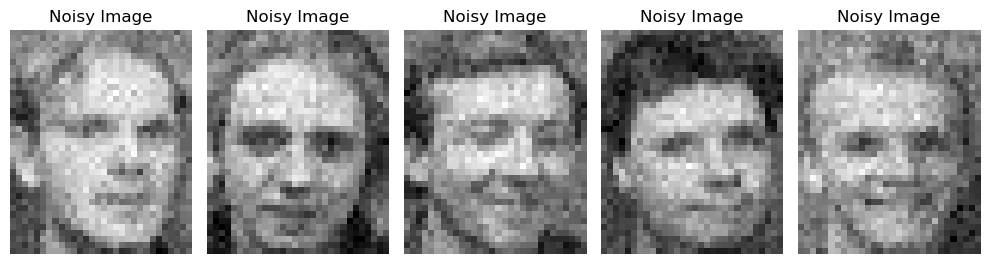

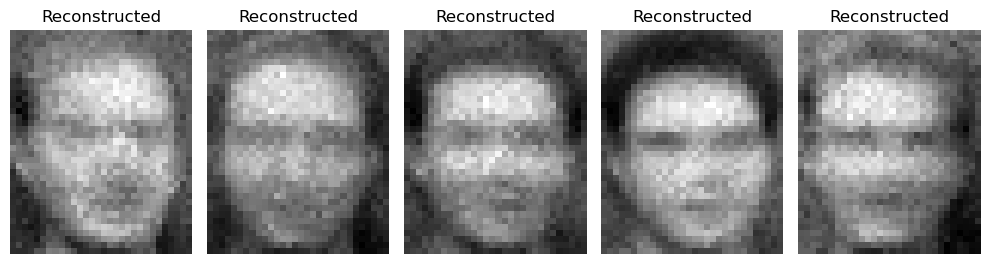

======================================== Noise: gaussian_10 ========================================


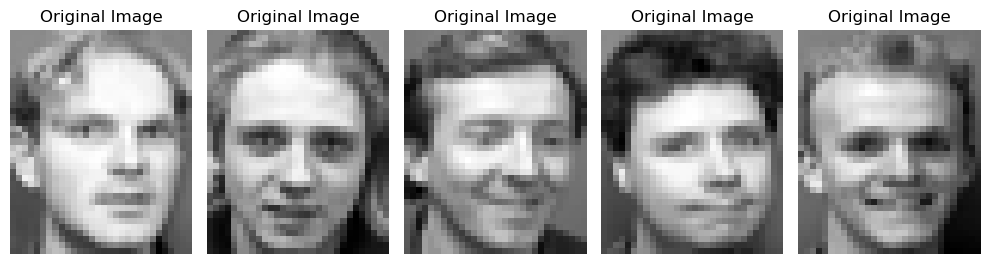

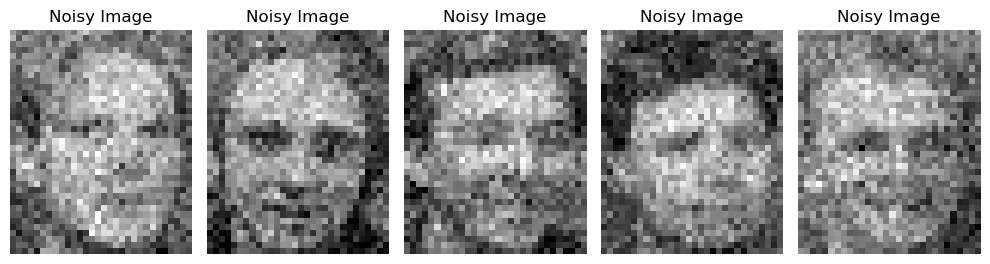

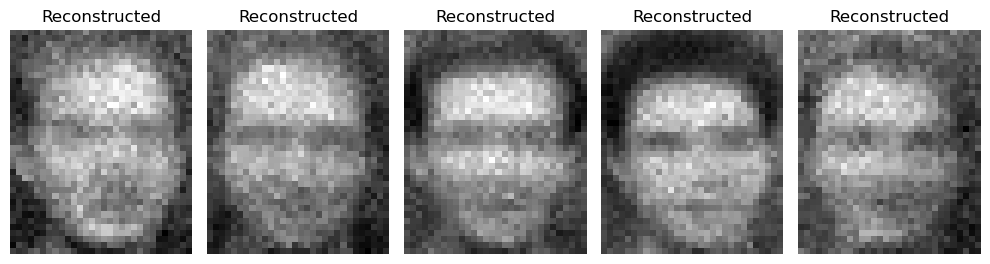

In [9]:
# Create an empty dictionary to store result
ORL_CIM_result_dict = dict()
for i in range(3):
    # Only display the reconstruction images for the 3rd training smaple to reduce cltter
    display = True if i == 2 else False

    ORL_CIM_result_dict['Result_CIM_no_noise_{}'.format(i)] = NMF_and_result(nmf="CIM", img_shape = img_shape, noise=None, noise_mapping = X_hat_noisy_maplist[i], K=n_component, max_iter=max_iteration, tol=tolerance, display=display)

    # block noise
    ORL_CIM_result_dict['Result_CIM_block_04_{}'.format(i)] = NMF_and_result(nmf="CIM", img_shape = img_shape, noise="block_04", noise_mapping = X_hat_noisy_maplist[i], K=n_component, max_iter=max_iteration, tol=tolerance, display=display)
    ORL_CIM_result_dict['Result_CIM_block_08_{}'.format(i)] = NMF_and_result(nmf="CIM", img_shape = img_shape, noise="block_08", noise_mapping = X_hat_noisy_maplist[i], K=n_component, max_iter=max_iteration, tol=tolerance, display=display)
    ORL_CIM_result_dict['Result_CIM_block_12_{}'.format(i)] = NMF_and_result(nmf="CIM", img_shape = img_shape, noise="block_12", noise_mapping = X_hat_noisy_maplist[i], K=n_component, max_iter=max_iteration, tol=tolerance, display=display)

    # saltpepper noise
    ORL_CIM_result_dict['Result_CIM_saltpepper_5_{}'.format(i)] = NMF_and_result(nmf="CIM", img_shape = img_shape, noise="saltpepper_5", noise_mapping = X_hat_noisy_maplist[i], K=n_component, max_iter=max_iteration, tol=tolerance, display=display)
    ORL_CIM_result_dict['Result_CIM_saltpepper_10_{}'.format(i)] = NMF_and_result(nmf="CIM", img_shape = img_shape, noise="saltpepper_10", noise_mapping = X_hat_noisy_maplist[i], K=n_component, max_iter=max_iteration, tol=tolerance, display=display)
    ORL_CIM_result_dict['Result_CIM_saltpepper_20_{}'.format(i)] = NMF_and_result(nmf="CIM", img_shape = img_shape, noise="saltpepper_20", noise_mapping = X_hat_noisy_maplist[i], K=n_component, max_iter=max_iteration, tol=tolerance, display=display)

    # gaussian noise
    ORL_CIM_result_dict['Result_CIM_gaussian_01_{}'.format(i)] = NMF_and_result(nmf="CIM", img_shape = img_shape, noise="gaussian_01", noise_mapping = X_hat_noisy_maplist[i], K=n_component, max_iter=max_iteration, tol=tolerance, display=display)
    ORL_CIM_result_dict['Result_CIM_gaussian_05_{}'.format(i)] = NMF_and_result(nmf="CIM", img_shape = img_shape, noise="gaussian_05", noise_mapping = X_hat_noisy_maplist[i], K=n_component, max_iter=max_iteration, tol=tolerance, display=display)
    ORL_CIM_result_dict['Result_CIM_gaussian_10_{}'.format(i)] = NMF_and_result(nmf="CIM", img_shape = img_shape, noise="gaussian_10", noise_mapping = X_hat_noisy_maplist[i], K=n_component, max_iter=max_iteration, tol=tolerance, display=display)


#### Testing Huber-NMF on the ORL dataset

======================================== No noise ========================================


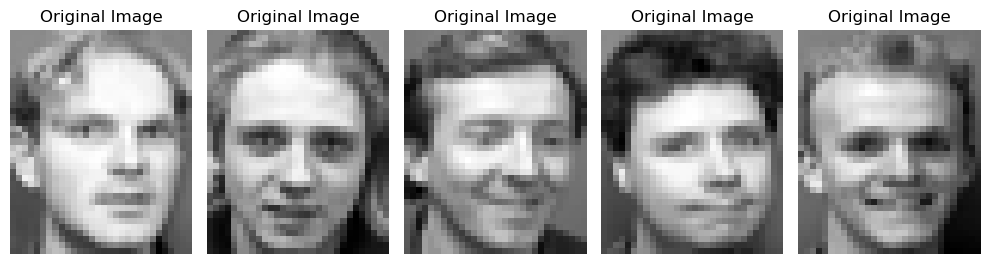

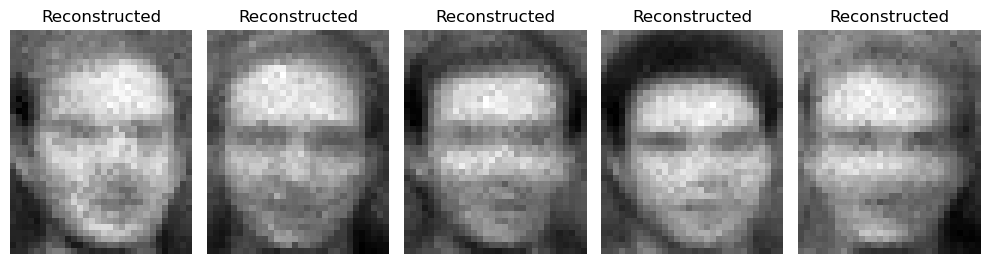

======================================== Noise: block_04 ========================================


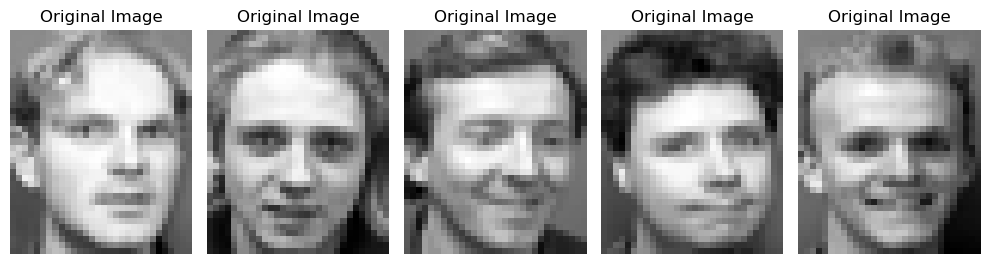

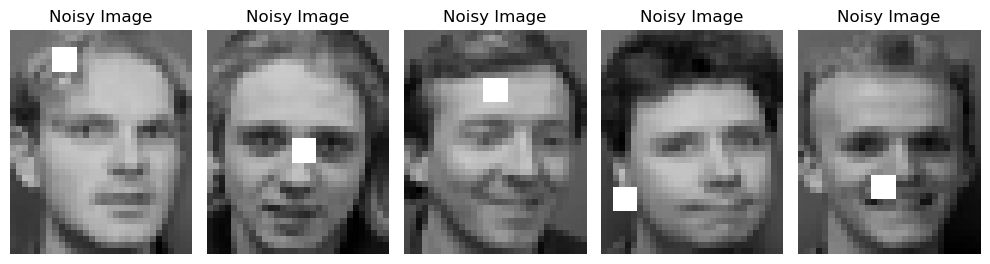

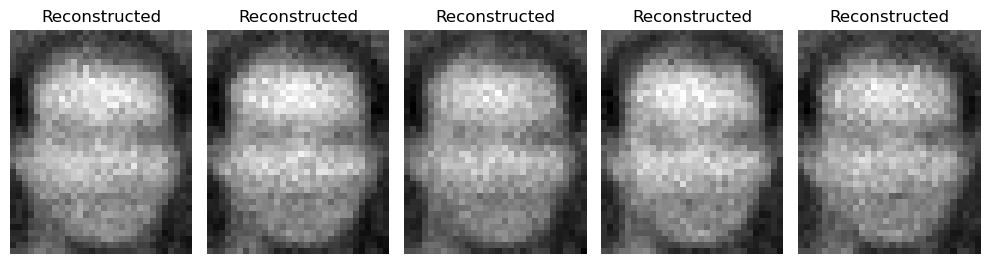

======================================== Noise: block_08 ========================================


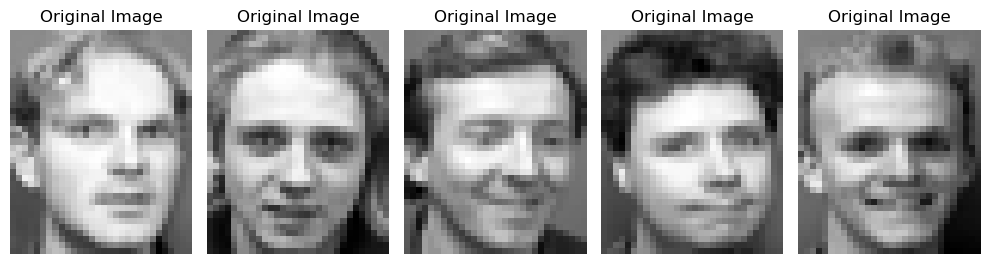

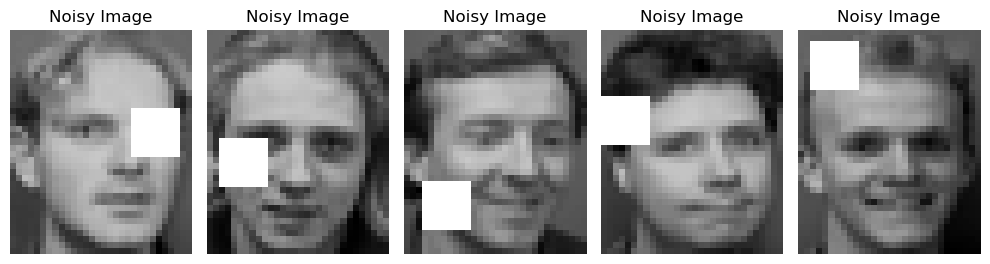

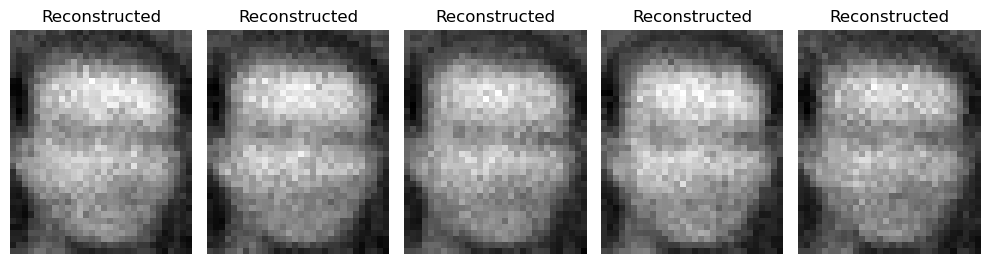

======================================== Noise: block_12 ========================================


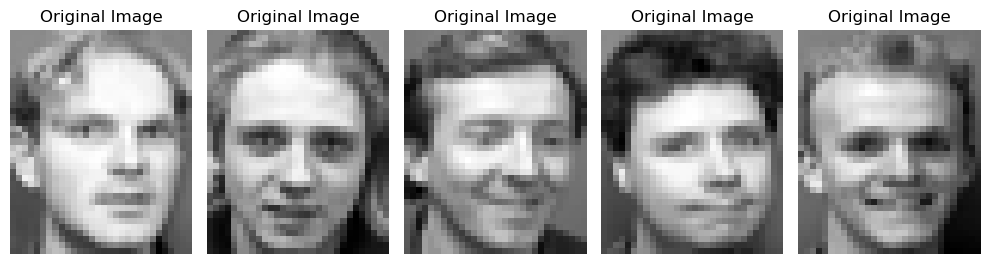

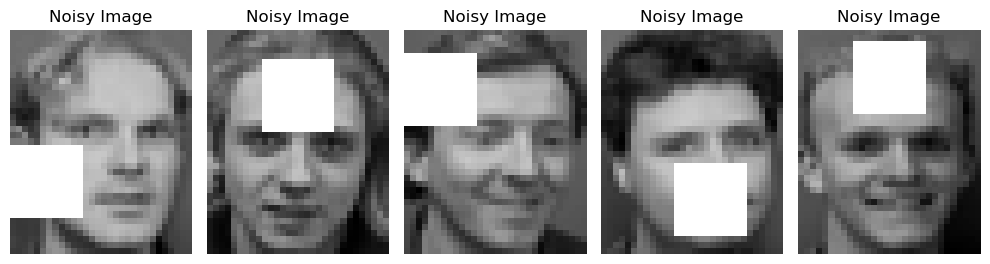

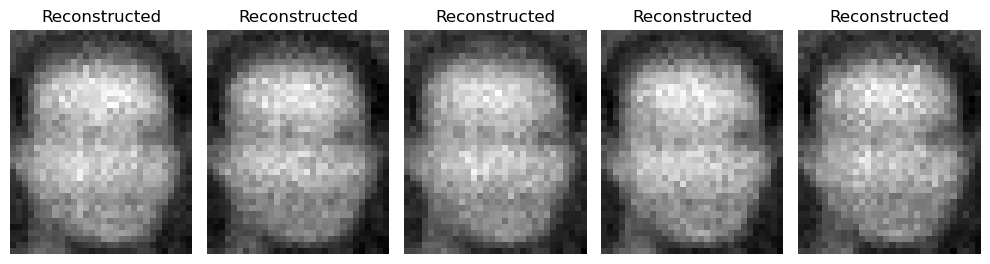

======================================== Noise: saltpepper_5 ========================================


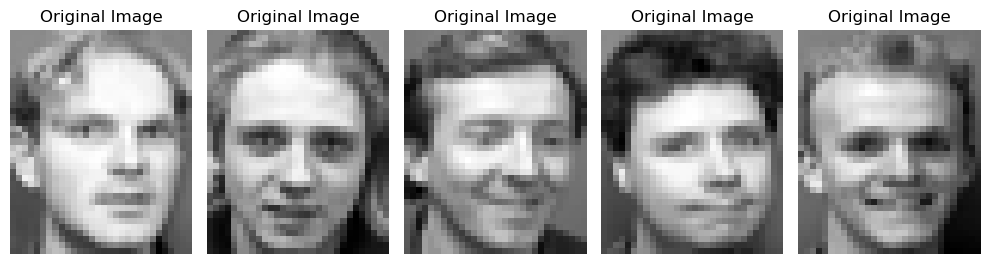

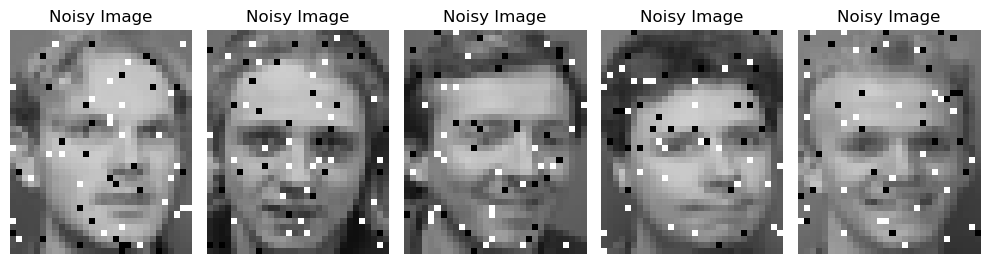

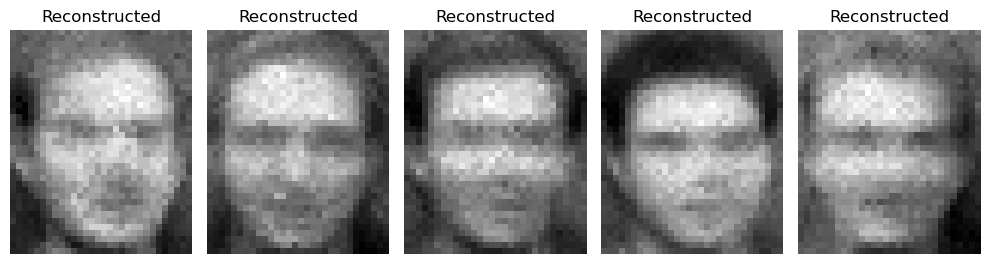

======================================== Noise: saltpepper_10 ========================================


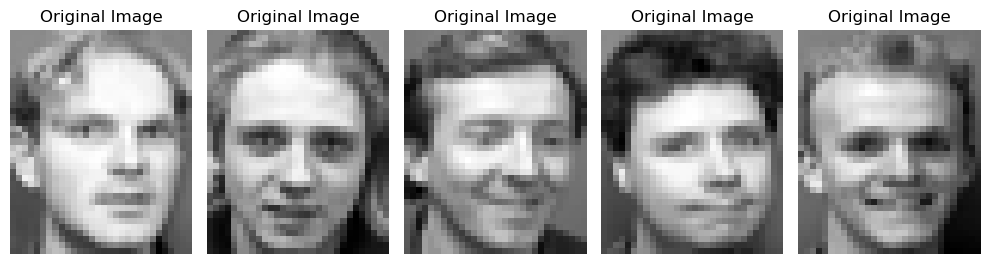

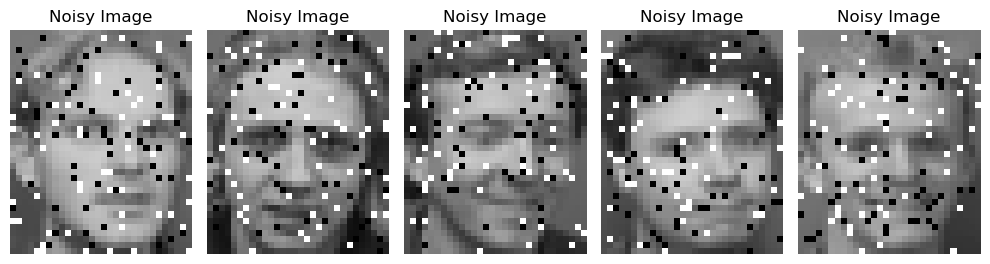

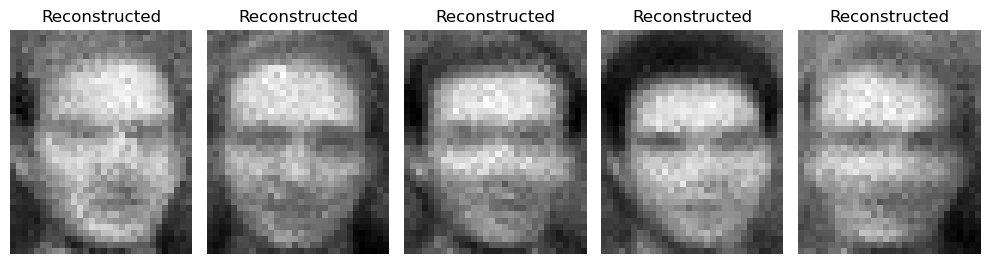

======================================== Noise: saltpepper_20 ========================================


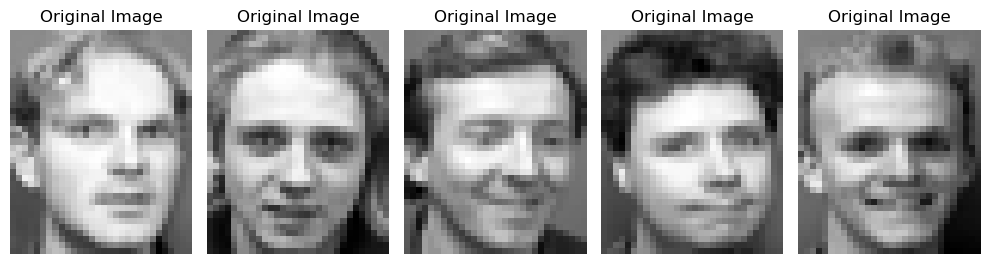

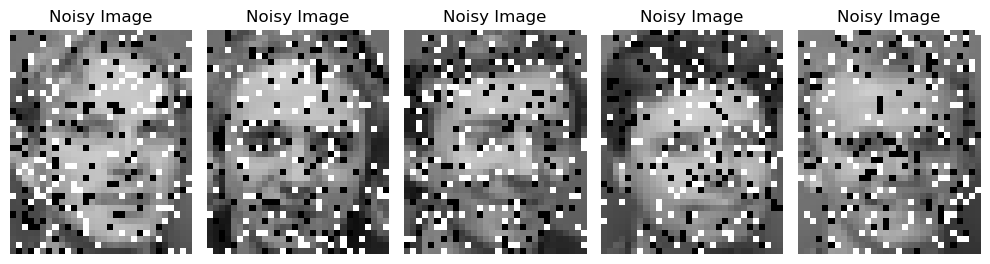

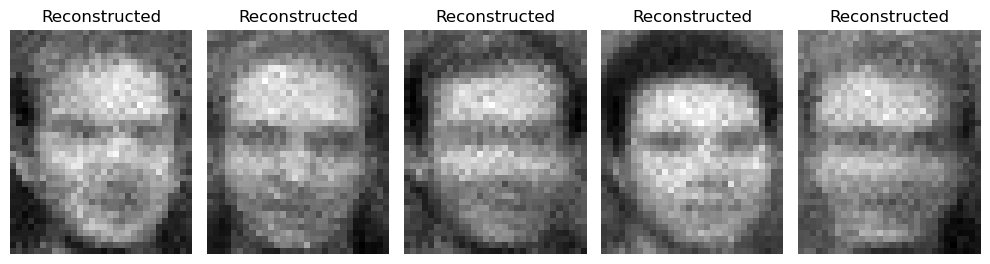

======================================== Noise: gaussian_01 ========================================


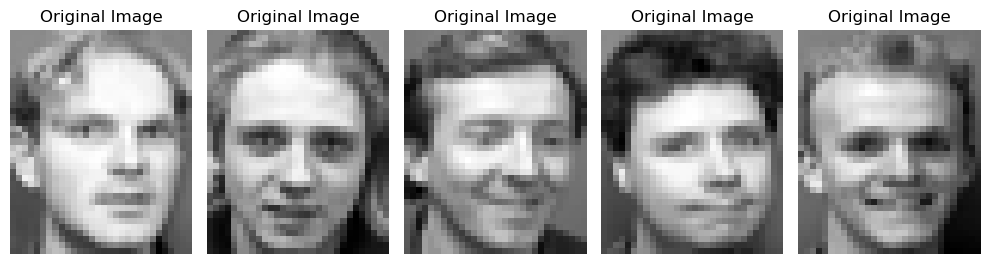

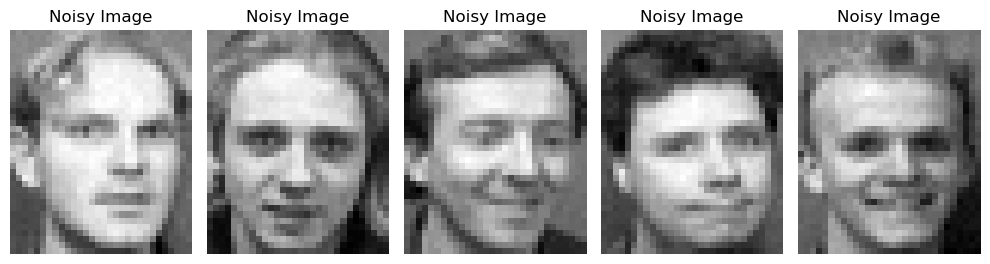

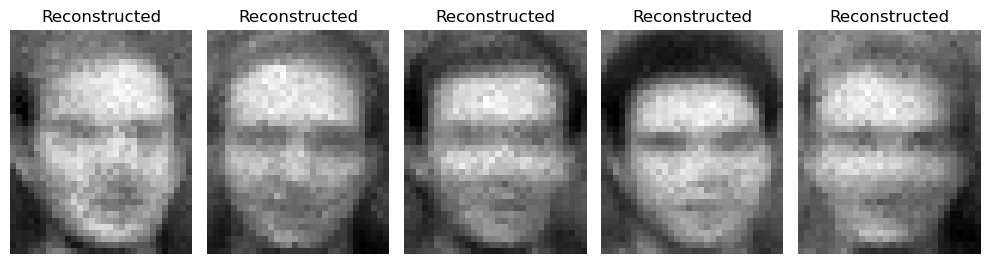

======================================== Noise: gaussian_05 ========================================


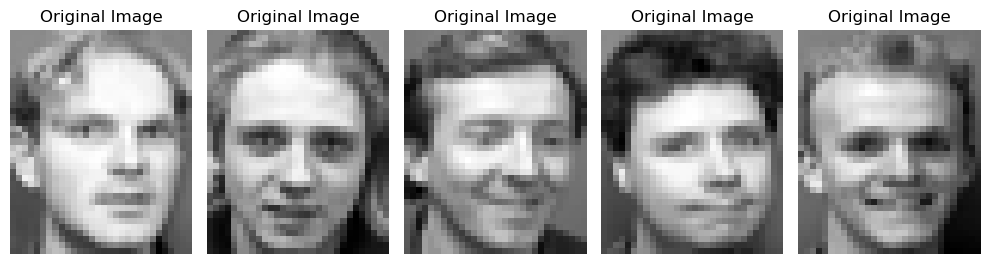

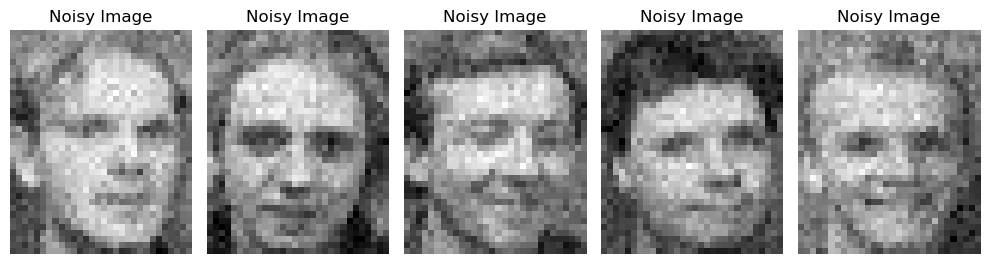

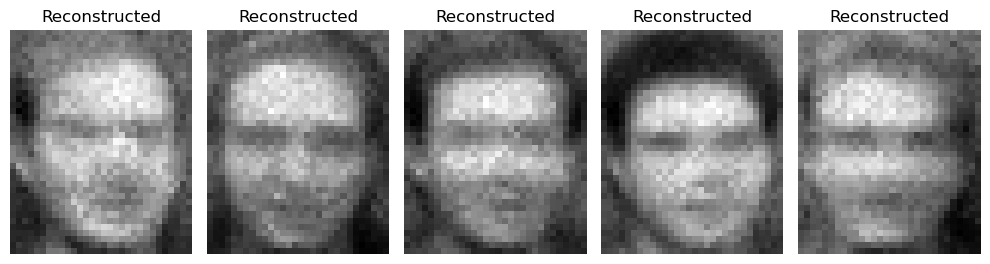

======================================== Noise: gaussian_10 ========================================


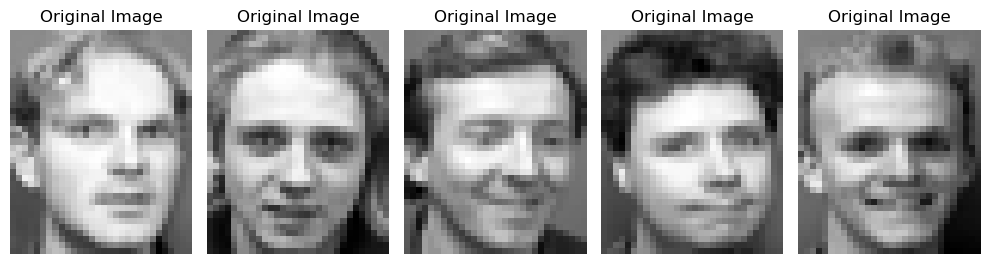

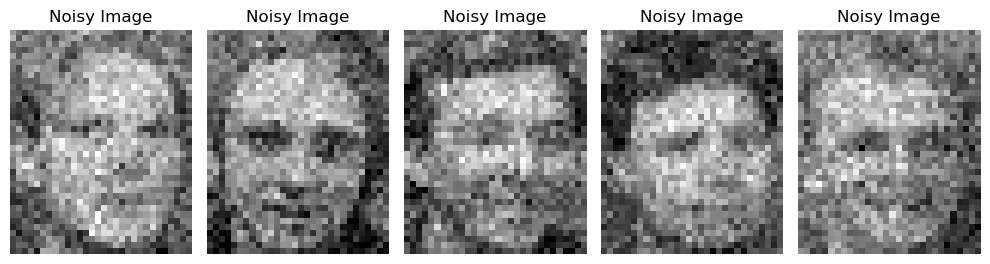

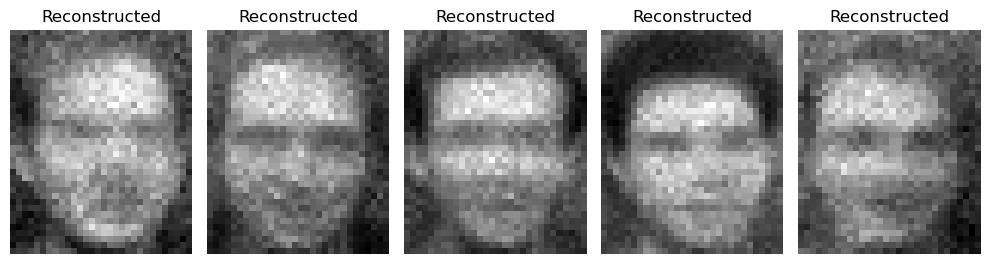

In [10]:
# Create an empty dictionary to store result
ORL_huber_result_dict = dict()
for i in range(3):
    # Only display the reconstruction images for the 3rd training smaple to reduce cltter
    display = True if i == 2 else False
    
    ORL_huber_result_dict['Result_huber_no_noise_{}'.format(i)] = NMF_and_result(nmf="huber", img_shape = img_shape, noise=None, 
                                                                                 noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                                 max_iter=max_iteration, tol=tolerance, display=display)

    # block noise
    ORL_huber_result_dict['Result_huber_block_04_{}'.format(i)] = NMF_and_result(nmf="huber", img_shape = img_shape, noise="block_04", 
                                                                                 noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                                 max_iter=max_iteration, tol=tolerance, display=display)
    ORL_huber_result_dict['Result_huber_block_08_{}'.format(i)] = NMF_and_result(nmf="huber", img_shape = img_shape, noise="block_08", 
                                                                                 noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                                 max_iter=max_iteration, tol=tolerance, display=display)
    ORL_huber_result_dict['Result_huber_block_12_{}'.format(i)] = NMF_and_result(nmf="huber", img_shape = img_shape, noise="block_12", 
                                                                                 noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                                 max_iter=max_iteration, tol=tolerance, display=display)

    # saltpepper noise
    ORL_huber_result_dict['Result_huber_saltpepper_5_{}'.format(i)] = NMF_and_result(nmf="huber", img_shape = img_shape, noise="saltpepper_5", 
                                                                                     noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                                     max_iter=max_iteration, tol=tolerance, display=display)
    ORL_huber_result_dict['Result_huber_saltpepper_10_{}'.format(i)] = NMF_and_result(nmf="huber", img_shape = img_shape, noise="saltpepper_10", 
                                                                                      noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                                      max_iter=max_iteration, tol=tolerance, display=display)
    ORL_huber_result_dict['Result_huber_saltpepper_20_{}'.format(i)] = NMF_and_result(nmf="huber", img_shape = img_shape, noise="saltpepper_20", 
                                                                                      noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                                      max_iter=max_iteration, tol=tolerance, display=display)

    # gaussian noise
    ORL_huber_result_dict['Result_huber_gaussian_01_{}'.format(i)] = NMF_and_result(nmf="huber", img_shape = img_shape, noise="gaussian_01", 
                                                                                    noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                                    max_iter=max_iteration, tol=tolerance, display=display)
    ORL_huber_result_dict['Result_huber_gaussian_05_{}'.format(i)] = NMF_and_result(nmf="huber", img_shape = img_shape, noise="gaussian_05", 
                                                                                    noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                                    max_iter=max_iteration, tol=tolerance, display=display)
    ORL_huber_result_dict['Result_huber_gaussian_10_{}'.format(i)] = NMF_and_result(nmf="huber", img_shape = img_shape, noise="gaussian_10", 
                                                                                    noise_mapping = X_hat_noisy_maplist[i], K=n_component, 
                                                                                    max_iter=max_iteration, tol=tolerance, display=display)


### Evaluation Metrics for ORL dataset
#### Root Means Square Errors (RMSE) and visualizations
To compare the robustness of different NMF algorithms, you can use the Root Means Square Errors. Let $X$ denote the contaminated dataset (by adding noise), and  $\hat X$  denote the clean dataset. Let  $R$ and  $D$ denote the factorization results on $𝑉$, Root Means Square Errors then can be defined as follows:
$RMSE= ||\hat X - RD||_F$

#### Evaluate Clustering Performance
1. Accuracy

    $Acc(Y, Y_{pred}) = \frac{1}{n}\sum_{i=1}^n 1\{Y_{pred(i)} == Y(i)\}$
2. Normalized Mutual Information (NMI).

    $NMI(Y, Y_{pred}) = \frac{2*I(Y, Y_{pred})}{H(Y) + H(Y_{pred})}$
   
  Where $I(.,.)$ is mutual information and  $𝐻(⋅)$ is entropy.

In [11]:
# Group all ORL result
allresultmap = [ORL_L1_result_dict, ORL_L2_result_dict, ORL_CIM_result_dict, ORL_huber_result_dict]

# Compute and dispplay the reuslt of the ORL dataset
compute_result(allresultmap, Y_hat_list)

| Algorithm   | Noise         |   RMSE-mean |    RMSE-std |   Accuracy-mean |   Accuracy-std |   NMI-mean |    NMI-std |
|-------------|---------------|-------------|-------------|-----------------|----------------|------------|------------|
| L1-NMF      | No noise      |   0.0659227 | 0.000124551 |        0.713889 |     0.0216358  |   0.845616 | 0.0161419  |
|             | Block_04      |   0.460252  | 0.000955961 |        0.111111 |     0          |   0.147568 | 0.00055628 |
|             | Block_08      |   0.461249  | 0.000915761 |        0.111111 |     0          |   0.147568 | 0.00055628 |
|             | Block_12      |   0.46279   | 0.00109471  |        0.111111 |     0          |   0.147568 | 0.00055628 |
|             | Saltpepper_5  |   0.0817025 | 0.000211476 |        0.642593 |     0.0145815  |   0.796567 | 0.0121852  |
|             | Saltpepper_10 |   0.0999755 | 0.000224548 |        0.552778 |     0.00680414 |   0.711616 | 0.00937739 |
|             | Saltpepper_20 | 